# 설명
* 모델
    * 캣부스트 회귀(기본)
* 특성
    * 기온 예측 : ['month', '구분', '시간']
    * 가스공급량 예측 : ['month', '시간', '구분', '기온']
    * log 적용
* 데이콘 점수 : 

# 가스공급량과 기온 데이터 불러오기(2013-2018년)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../2013-2018년_가스공급량과_기온2.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,연월일,시간,구분,공급량,year,month,day,weekday,기온
0,0,0,2013-01-01,1,0,2497.129,2013,1,1,1,-6.4
1,1,1,2013-01-01,1,1,2169.093,2013,1,1,1,-6.4
2,2,2,2013-01-01,1,2,226.178,2013,1,1,1,-6.4
3,3,3,2013-01-01,1,3,1434.516,2013,1,1,1,-6.4
4,4,4,2013-01-01,1,4,3272.837,2013,1,1,1,-6.4


### 상관계수 확인

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import platform
from matplotlib import font_manager, rc

In [5]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

<AxesSubplot:>

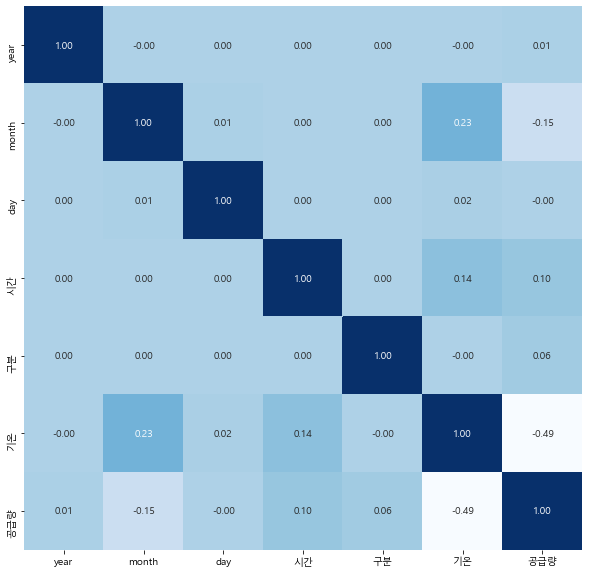

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['year','month', 'day', '시간', '구분', '기온', '공급량']].corr(), cmap='Blues', annot=True, fmt='.2f', cbar=False)

## catboost회귀 모델 기온 예측 테스트(2013-2018년)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
col = ['month', '구분', '시간']
X = df[col]
y = df['기온']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276066, 3), (92022, 3), (276066,), (92022,))

In [10]:
# !pip install catboost

In [10]:
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, cross_val_score

In [11]:
%%time
cb = CatBoostRegressor(random_seed=0, learning_rate=0.01, eval_metric='MAE')
cb.fit(X_train, y_train, early_stopping_rounds=10, eval_set=(X_test, y_test), verbose=True)
kfold = KFold(shuffle=True, random_state=0, n_splits=10)
score1 = cross_val_score(cb, X_train, y_train, cv=kfold, scoring='r2').mean()
score2 = cross_val_score(cb, X_test, y_test, cv=kfold, scoring='r2').mean()

0:	learn: 8.8854766	test: 8.9034881	best: 8.9034881 (0)	total: 206ms	remaining: 3m 26s
1:	learn: 8.8113158	test: 8.8294251	best: 8.8294251 (1)	total: 233ms	remaining: 1m 56s
2:	learn: 8.7385159	test: 8.7566827	best: 8.7566827 (2)	total: 259ms	remaining: 1m 26s
3:	learn: 8.6661602	test: 8.6844024	best: 8.6844024 (3)	total: 286ms	remaining: 1m 11s
4:	learn: 8.5956152	test: 8.6139348	best: 8.6139348 (4)	total: 313ms	remaining: 1m 2s
5:	learn: 8.5251398	test: 8.5435209	best: 8.5435209 (5)	total: 341ms	remaining: 56.6s
6:	learn: 8.4553717	test: 8.4737310	best: 8.4737310 (6)	total: 370ms	remaining: 52.4s
7:	learn: 8.3862198	test: 8.4045409	best: 8.4045409 (7)	total: 399ms	remaining: 49.5s
8:	learn: 8.3179233	test: 8.3362020	best: 8.3362020 (8)	total: 435ms	remaining: 47.9s
9:	learn: 8.2514691	test: 8.2697077	best: 8.2697077 (9)	total: 462ms	remaining: 45.8s
10:	learn: 8.1852933	test: 8.2035009	best: 8.2035009 (10)	total: 491ms	remaining: 44.1s
11:	learn: 8.1201064	test: 8.1382383	best: 8.138

99:	learn: 4.6031596	test: 4.6153660	best: 4.6153660 (99)	total: 3.16s	remaining: 28.4s
100:	learn: 4.5815430	test: 4.5937131	best: 4.5937131 (100)	total: 3.19s	remaining: 28.4s
101:	learn: 4.5593788	test: 4.5714910	best: 4.5714910 (101)	total: 3.21s	remaining: 28.3s
102:	learn: 4.5375441	test: 4.5495808	best: 4.5495808 (102)	total: 3.24s	remaining: 28.2s
103:	learn: 4.5159644	test: 4.5279567	best: 4.5279567 (103)	total: 3.26s	remaining: 28.1s
104:	learn: 4.4947698	test: 4.5067012	best: 4.5067012 (104)	total: 3.29s	remaining: 28s
105:	learn: 4.4741162	test: 4.4860182	best: 4.4860182 (105)	total: 3.32s	remaining: 28s
106:	learn: 4.4534650	test: 4.4653288	best: 4.4653288 (106)	total: 3.34s	remaining: 27.9s
107:	learn: 4.4322757	test: 4.4440821	best: 4.4440821 (107)	total: 3.38s	remaining: 27.9s
108:	learn: 4.4122476	test: 4.4240141	best: 4.4240141 (108)	total: 3.42s	remaining: 27.9s
109:	learn: 4.3927349	test: 4.4044174	best: 4.4044174 (109)	total: 3.44s	remaining: 27.9s
110:	learn: 4.37

195:	learn: 3.3865387	test: 3.3944200	best: 3.3944200 (195)	total: 5.79s	remaining: 23.8s
196:	learn: 3.3809007	test: 3.3887179	best: 3.3887179 (196)	total: 5.82s	remaining: 23.7s
197:	learn: 3.3751112	test: 3.3828557	best: 3.3828557 (197)	total: 5.85s	remaining: 23.7s
198:	learn: 3.3698015	test: 3.3774677	best: 3.3774677 (198)	total: 5.87s	remaining: 23.6s
199:	learn: 3.3641323	test: 3.3717599	best: 3.3717599 (199)	total: 5.91s	remaining: 23.7s
200:	learn: 3.3587246	test: 3.3662690	best: 3.3662690 (200)	total: 5.94s	remaining: 23.6s
201:	learn: 3.3531656	test: 3.3606409	best: 3.3606409 (201)	total: 5.97s	remaining: 23.6s
202:	learn: 3.3479775	test: 3.3553948	best: 3.3553948 (202)	total: 5.99s	remaining: 23.5s
203:	learn: 3.3425633	test: 3.3499252	best: 3.3499252 (203)	total: 6.02s	remaining: 23.5s
204:	learn: 3.3372684	test: 3.3445517	best: 3.3445517 (204)	total: 6.05s	remaining: 23.5s
205:	learn: 3.3323653	test: 3.3395733	best: 3.3395733 (205)	total: 6.08s	remaining: 23.4s
206:	learn

291:	learn: 3.0571722	test: 3.0592411	best: 3.0592411 (291)	total: 8.43s	remaining: 20.4s
292:	learn: 3.0555567	test: 3.0575666	best: 3.0575666 (292)	total: 8.45s	remaining: 20.4s
293:	learn: 3.0539197	test: 3.0558639	best: 3.0558639 (293)	total: 8.48s	remaining: 20.4s
294:	learn: 3.0521585	test: 3.0540426	best: 3.0540426 (294)	total: 8.51s	remaining: 20.3s
295:	learn: 3.0505998	test: 3.0524348	best: 3.0524348 (295)	total: 8.53s	remaining: 20.3s
296:	learn: 3.0488625	test: 3.0506410	best: 3.0506410 (296)	total: 8.56s	remaining: 20.3s
297:	learn: 3.0470953	test: 3.0488137	best: 3.0488137 (297)	total: 8.58s	remaining: 20.2s
298:	learn: 3.0453888	test: 3.0470444	best: 3.0470444 (298)	total: 8.61s	remaining: 20.2s
299:	learn: 3.0438523	test: 3.0454662	best: 3.0454662 (299)	total: 8.64s	remaining: 20.2s
300:	learn: 3.0422754	test: 3.0438387	best: 3.0438387 (300)	total: 8.66s	remaining: 20.1s
301:	learn: 3.0407746	test: 3.0422886	best: 3.0422886 (301)	total: 8.69s	remaining: 20.1s
302:	learn

387:	learn: 2.9560822	test: 2.9546000	best: 2.9546000 (387)	total: 11.3s	remaining: 17.8s
388:	learn: 2.9555957	test: 2.9541014	best: 2.9541014 (388)	total: 11.3s	remaining: 17.7s
389:	learn: 2.9550722	test: 2.9535536	best: 2.9535536 (389)	total: 11.3s	remaining: 17.7s
390:	learn: 2.9546272	test: 2.9530981	best: 2.9530981 (390)	total: 11.3s	remaining: 17.7s
391:	learn: 2.9541349	test: 2.9525938	best: 2.9525938 (391)	total: 11.4s	remaining: 17.6s
392:	learn: 2.9535156	test: 2.9519382	best: 2.9519382 (392)	total: 11.4s	remaining: 17.6s
393:	learn: 2.9529738	test: 2.9513846	best: 2.9513846 (393)	total: 11.5s	remaining: 17.6s
394:	learn: 2.9523237	test: 2.9507224	best: 2.9507224 (394)	total: 11.5s	remaining: 17.6s
395:	learn: 2.9517177	test: 2.9500895	best: 2.9500895 (395)	total: 11.5s	remaining: 17.6s
396:	learn: 2.9512948	test: 2.9496554	best: 2.9496554 (396)	total: 11.5s	remaining: 17.5s
397:	learn: 2.9507881	test: 2.9491299	best: 2.9491299 (397)	total: 11.6s	remaining: 17.5s
398:	learn

479:	learn: 2.9227571	test: 2.9198645	best: 2.9198645 (479)	total: 14s	remaining: 15.1s
480:	learn: 2.9225090	test: 2.9195998	best: 2.9195998 (480)	total: 14s	remaining: 15.1s
481:	learn: 2.9222237	test: 2.9193034	best: 2.9193034 (481)	total: 14s	remaining: 15.1s
482:	learn: 2.9220700	test: 2.9191431	best: 2.9191431 (482)	total: 14.1s	remaining: 15.1s
483:	learn: 2.9217987	test: 2.9188668	best: 2.9188668 (483)	total: 14.1s	remaining: 15s
484:	learn: 2.9216141	test: 2.9186729	best: 2.9186729 (484)	total: 14.1s	remaining: 15s
485:	learn: 2.9213693	test: 2.9184112	best: 2.9184112 (485)	total: 14.1s	remaining: 15s
486:	learn: 2.9211175	test: 2.9181521	best: 2.9181521 (486)	total: 14.2s	remaining: 14.9s
487:	learn: 2.9208793	test: 2.9178974	best: 2.9178974 (487)	total: 14.2s	remaining: 14.9s
488:	learn: 2.9206520	test: 2.9176578	best: 2.9176578 (488)	total: 14.2s	remaining: 14.9s
489:	learn: 2.9204170	test: 2.9174225	best: 2.9174225 (489)	total: 14.3s	remaining: 14.8s
490:	learn: 2.9202179	

574:	learn: 2.9077213	test: 2.9042217	best: 2.9042217 (574)	total: 16.7s	remaining: 12.3s
575:	learn: 2.9076159	test: 2.9041124	best: 2.9041124 (575)	total: 16.7s	remaining: 12.3s
576:	learn: 2.9075056	test: 2.9040016	best: 2.9040016 (576)	total: 16.7s	remaining: 12.2s
577:	learn: 2.9073763	test: 2.9038731	best: 2.9038731 (577)	total: 16.7s	remaining: 12.2s
578:	learn: 2.9072491	test: 2.9037394	best: 2.9037394 (578)	total: 16.8s	remaining: 12.2s
579:	learn: 2.9071694	test: 2.9036541	best: 2.9036541 (579)	total: 16.8s	remaining: 12.2s
580:	learn: 2.9070302	test: 2.9035093	best: 2.9035093 (580)	total: 16.8s	remaining: 12.1s
581:	learn: 2.9069192	test: 2.9034001	best: 2.9034001 (581)	total: 16.8s	remaining: 12.1s
582:	learn: 2.9067912	test: 2.9032636	best: 2.9032636 (582)	total: 16.9s	remaining: 12.1s
583:	learn: 2.9067199	test: 2.9031874	best: 2.9031874 (583)	total: 16.9s	remaining: 12s
584:	learn: 2.9066031	test: 2.9030694	best: 2.9030694 (584)	total: 16.9s	remaining: 12s
585:	learn: 2.

673:	learn: 2.9002730	test: 2.8965968	best: 2.8965968 (673)	total: 19.4s	remaining: 9.37s
674:	learn: 2.9002387	test: 2.8965661	best: 2.8965661 (674)	total: 19.4s	remaining: 9.34s
675:	learn: 2.9001751	test: 2.8965010	best: 2.8965010 (675)	total: 19.4s	remaining: 9.31s
676:	learn: 2.9001104	test: 2.8964325	best: 2.8964325 (676)	total: 19.4s	remaining: 9.28s
677:	learn: 2.9000655	test: 2.8963803	best: 2.8963803 (677)	total: 19.5s	remaining: 9.25s
678:	learn: 2.8999858	test: 2.8962970	best: 2.8962970 (678)	total: 19.5s	remaining: 9.22s
679:	learn: 2.8999177	test: 2.8962245	best: 2.8962245 (679)	total: 19.5s	remaining: 9.19s
680:	learn: 2.8998249	test: 2.8961244	best: 2.8961244 (680)	total: 19.6s	remaining: 9.16s
681:	learn: 2.8997541	test: 2.8960499	best: 2.8960499 (681)	total: 19.6s	remaining: 9.13s
682:	learn: 2.8996974	test: 2.8959853	best: 2.8959853 (682)	total: 19.6s	remaining: 9.1s
683:	learn: 2.8996509	test: 2.8959354	best: 2.8959354 (683)	total: 19.6s	remaining: 9.07s
684:	learn:

770:	learn: 2.8959658	test: 2.8921476	best: 2.8921476 (770)	total: 22s	remaining: 6.52s
771:	learn: 2.8959351	test: 2.8921189	best: 2.8921189 (771)	total: 22s	remaining: 6.49s
772:	learn: 2.8958818	test: 2.8920643	best: 2.8920643 (772)	total: 22s	remaining: 6.46s
773:	learn: 2.8958608	test: 2.8920491	best: 2.8920491 (773)	total: 22s	remaining: 6.43s
774:	learn: 2.8958105	test: 2.8920001	best: 2.8920001 (774)	total: 22.1s	remaining: 6.41s
775:	learn: 2.8957855	test: 2.8919778	best: 2.8919778 (775)	total: 22.1s	remaining: 6.38s
776:	learn: 2.8957618	test: 2.8919552	best: 2.8919552 (776)	total: 22.1s	remaining: 6.35s
777:	learn: 2.8957273	test: 2.8919178	best: 2.8919178 (777)	total: 22.1s	remaining: 6.32s
778:	learn: 2.8957046	test: 2.8918936	best: 2.8918936 (778)	total: 22.2s	remaining: 6.29s
779:	learn: 2.8956683	test: 2.8918564	best: 2.8918564 (779)	total: 22.2s	remaining: 6.26s
780:	learn: 2.8956153	test: 2.8917972	best: 2.8917972 (780)	total: 22.2s	remaining: 6.23s
781:	learn: 2.8955

866:	learn: 2.8933283	test: 2.8894715	best: 2.8894715 (866)	total: 24.6s	remaining: 3.78s
867:	learn: 2.8933100	test: 2.8894543	best: 2.8894543 (867)	total: 24.6s	remaining: 3.75s
868:	learn: 2.8932705	test: 2.8894146	best: 2.8894146 (868)	total: 24.7s	remaining: 3.72s
869:	learn: 2.8932374	test: 2.8893828	best: 2.8893828 (869)	total: 24.7s	remaining: 3.69s
870:	learn: 2.8932262	test: 2.8893741	best: 2.8893741 (870)	total: 24.7s	remaining: 3.66s
871:	learn: 2.8932046	test: 2.8893513	best: 2.8893513 (871)	total: 24.7s	remaining: 3.63s
872:	learn: 2.8931673	test: 2.8893152	best: 2.8893152 (872)	total: 24.8s	remaining: 3.6s
873:	learn: 2.8931573	test: 2.8893067	best: 2.8893067 (873)	total: 24.8s	remaining: 3.58s
874:	learn: 2.8931377	test: 2.8892927	best: 2.8892927 (874)	total: 24.8s	remaining: 3.55s
875:	learn: 2.8931004	test: 2.8892535	best: 2.8892535 (875)	total: 24.9s	remaining: 3.52s
876:	learn: 2.8930803	test: 2.8892356	best: 2.8892356 (876)	total: 24.9s	remaining: 3.49s
877:	learn:

964:	learn: 2.8915830	test: 2.8877888	best: 2.8877888 (964)	total: 27.3s	remaining: 989ms
965:	learn: 2.8915719	test: 2.8877792	best: 2.8877792 (965)	total: 27.3s	remaining: 961ms
966:	learn: 2.8915673	test: 2.8877746	best: 2.8877746 (966)	total: 27.3s	remaining: 933ms
967:	learn: 2.8915349	test: 2.8877387	best: 2.8877387 (967)	total: 27.4s	remaining: 904ms
968:	learn: 2.8915084	test: 2.8877106	best: 2.8877106 (968)	total: 27.4s	remaining: 876ms
969:	learn: 2.8914921	test: 2.8876973	best: 2.8876973 (969)	total: 27.4s	remaining: 848ms
970:	learn: 2.8914726	test: 2.8876789	best: 2.8876789 (970)	total: 27.4s	remaining: 819ms
971:	learn: 2.8914623	test: 2.8876677	best: 2.8876677 (971)	total: 27.5s	remaining: 791ms
972:	learn: 2.8914420	test: 2.8876467	best: 2.8876467 (972)	total: 27.5s	remaining: 763ms
973:	learn: 2.8914347	test: 2.8876414	best: 2.8876414 (973)	total: 27.5s	remaining: 735ms
974:	learn: 2.8914209	test: 2.8876259	best: 2.8876259 (974)	total: 27.5s	remaining: 706ms
975:	learn

105:	learn: 4.4728914	total: 2.63s	remaining: 22.2s
106:	learn: 4.4522721	total: 2.66s	remaining: 22.2s
107:	learn: 4.4310710	total: 2.68s	remaining: 22.2s
108:	learn: 4.4110480	total: 2.71s	remaining: 22.1s
109:	learn: 4.3915310	total: 2.73s	remaining: 22.1s
110:	learn: 4.3711697	total: 2.75s	remaining: 22.1s
111:	learn: 4.3519849	total: 2.78s	remaining: 22s
112:	learn: 4.3328500	total: 2.8s	remaining: 22s
113:	learn: 4.3142427	total: 2.83s	remaining: 22s
114:	learn: 4.2958006	total: 2.86s	remaining: 22s
115:	learn: 4.2772128	total: 2.89s	remaining: 22s
116:	learn: 4.2594281	total: 2.92s	remaining: 22s
117:	learn: 4.2412781	total: 2.94s	remaining: 22s
118:	learn: 4.2233263	total: 2.97s	remaining: 22s
119:	learn: 4.2056575	total: 3s	remaining: 22s
120:	learn: 4.1883193	total: 3.03s	remaining: 22s
121:	learn: 4.1706248	total: 3.05s	remaining: 21.9s
122:	learn: 4.1541978	total: 3.07s	remaining: 21.9s
123:	learn: 4.1372974	total: 3.1s	remaining: 21.9s
124:	learn: 4.1210734	total: 3.12s	re

270:	learn: 3.0975097	total: 7.17s	remaining: 19.3s
271:	learn: 3.0950223	total: 7.2s	remaining: 19.3s
272:	learn: 3.0924686	total: 7.22s	remaining: 19.2s
273:	learn: 3.0902996	total: 7.26s	remaining: 19.2s
274:	learn: 3.0883198	total: 7.29s	remaining: 19.2s
275:	learn: 3.0861312	total: 7.32s	remaining: 19.2s
276:	learn: 3.0838080	total: 7.35s	remaining: 19.2s
277:	learn: 3.0814699	total: 7.38s	remaining: 19.2s
278:	learn: 3.0796572	total: 7.41s	remaining: 19.1s
279:	learn: 3.0775859	total: 7.44s	remaining: 19.1s
280:	learn: 3.0757392	total: 7.47s	remaining: 19.1s
281:	learn: 3.0739268	total: 7.49s	remaining: 19.1s
282:	learn: 3.0720358	total: 7.55s	remaining: 19.1s
283:	learn: 3.0700094	total: 7.67s	remaining: 19.3s
284:	learn: 3.0677728	total: 7.75s	remaining: 19.4s
285:	learn: 3.0661720	total: 7.78s	remaining: 19.4s
286:	learn: 3.0644166	total: 7.82s	remaining: 19.4s
287:	learn: 3.0625616	total: 7.86s	remaining: 19.4s
288:	learn: 3.0605614	total: 7.9s	remaining: 19.4s
289:	learn: 3.

433:	learn: 2.9334110	total: 12.4s	remaining: 16.2s
434:	learn: 2.9331382	total: 12.5s	remaining: 16.2s
435:	learn: 2.9327286	total: 12.5s	remaining: 16.2s
436:	learn: 2.9323399	total: 12.5s	remaining: 16.1s
437:	learn: 2.9320467	total: 12.6s	remaining: 16.1s
438:	learn: 2.9316535	total: 12.6s	remaining: 16.1s
439:	learn: 2.9312888	total: 12.6s	remaining: 16.1s
440:	learn: 2.9308715	total: 12.6s	remaining: 16s
441:	learn: 2.9306099	total: 12.7s	remaining: 16s
442:	learn: 2.9302663	total: 12.7s	remaining: 16s
443:	learn: 2.9300030	total: 12.7s	remaining: 15.9s
444:	learn: 2.9296485	total: 12.8s	remaining: 15.9s
445:	learn: 2.9292881	total: 12.8s	remaining: 15.9s
446:	learn: 2.9290228	total: 12.8s	remaining: 15.9s
447:	learn: 2.9287146	total: 12.8s	remaining: 15.8s
448:	learn: 2.9283379	total: 12.9s	remaining: 15.8s
449:	learn: 2.9280808	total: 12.9s	remaining: 15.8s
450:	learn: 2.9278772	total: 12.9s	remaining: 15.7s
451:	learn: 2.9276287	total: 13s	remaining: 15.7s
452:	learn: 2.927308

593:	learn: 2.9034704	total: 17.8s	remaining: 12.2s
594:	learn: 2.9034000	total: 17.8s	remaining: 12.1s
595:	learn: 2.9033292	total: 17.9s	remaining: 12.1s
596:	learn: 2.9032259	total: 17.9s	remaining: 12.1s
597:	learn: 2.9031668	total: 17.9s	remaining: 12s
598:	learn: 2.9031189	total: 18s	remaining: 12s
599:	learn: 2.9030561	total: 18s	remaining: 12s
600:	learn: 2.9029984	total: 18s	remaining: 12s
601:	learn: 2.9029495	total: 18s	remaining: 11.9s
602:	learn: 2.9028467	total: 18.1s	remaining: 11.9s
603:	learn: 2.9027579	total: 18.1s	remaining: 11.9s
604:	learn: 2.9026915	total: 18.1s	remaining: 11.8s
605:	learn: 2.9026014	total: 18.1s	remaining: 11.8s
606:	learn: 2.9025414	total: 18.2s	remaining: 11.8s
607:	learn: 2.9024586	total: 18.2s	remaining: 11.7s
608:	learn: 2.9023644	total: 18.2s	remaining: 11.7s
609:	learn: 2.9022929	total: 18.2s	remaining: 11.7s
610:	learn: 2.9021986	total: 18.3s	remaining: 11.6s
611:	learn: 2.9021297	total: 18.3s	remaining: 11.6s
612:	learn: 2.9020612	total:

757:	learn: 2.8939674	total: 22.2s	remaining: 7.08s
758:	learn: 2.8939319	total: 22.2s	remaining: 7.05s
759:	learn: 2.8939105	total: 22.2s	remaining: 7.02s
760:	learn: 2.8938663	total: 22.3s	remaining: 6.99s
761:	learn: 2.8938243	total: 22.3s	remaining: 6.96s
762:	learn: 2.8937999	total: 22.3s	remaining: 6.93s
763:	learn: 2.8937541	total: 22.3s	remaining: 6.9s
764:	learn: 2.8937310	total: 22.4s	remaining: 6.87s
765:	learn: 2.8936982	total: 22.4s	remaining: 6.84s
766:	learn: 2.8936646	total: 22.4s	remaining: 6.81s
767:	learn: 2.8936482	total: 22.4s	remaining: 6.78s
768:	learn: 2.8936321	total: 22.5s	remaining: 6.75s
769:	learn: 2.8936056	total: 22.5s	remaining: 6.72s
770:	learn: 2.8935760	total: 22.5s	remaining: 6.69s
771:	learn: 2.8935416	total: 22.5s	remaining: 6.65s
772:	learn: 2.8934837	total: 22.6s	remaining: 6.62s
773:	learn: 2.8934214	total: 22.6s	remaining: 6.59s
774:	learn: 2.8933879	total: 22.6s	remaining: 6.56s
775:	learn: 2.8933575	total: 22.6s	remaining: 6.53s
776:	learn: 2

925:	learn: 2.8896592	total: 26.3s	remaining: 2.1s
926:	learn: 2.8896336	total: 26.3s	remaining: 2.07s
927:	learn: 2.8896175	total: 26.3s	remaining: 2.04s
928:	learn: 2.8895878	total: 26.3s	remaining: 2.01s
929:	learn: 2.8895793	total: 26.4s	remaining: 1.98s
930:	learn: 2.8895607	total: 26.4s	remaining: 1.96s
931:	learn: 2.8895445	total: 26.4s	remaining: 1.93s
932:	learn: 2.8895319	total: 26.4s	remaining: 1.9s
933:	learn: 2.8895161	total: 26.5s	remaining: 1.87s
934:	learn: 2.8894970	total: 26.5s	remaining: 1.84s
935:	learn: 2.8894595	total: 26.5s	remaining: 1.81s
936:	learn: 2.8894368	total: 26.6s	remaining: 1.78s
937:	learn: 2.8894319	total: 26.6s	remaining: 1.76s
938:	learn: 2.8894136	total: 26.6s	remaining: 1.73s
939:	learn: 2.8894041	total: 26.6s	remaining: 1.7s
940:	learn: 2.8893861	total: 26.7s	remaining: 1.67s
941:	learn: 2.8893580	total: 26.7s	remaining: 1.64s
942:	learn: 2.8893340	total: 26.7s	remaining: 1.61s
943:	learn: 2.8893169	total: 26.7s	remaining: 1.59s
944:	learn: 2.8

88:	learn: 4.8724562	total: 2.16s	remaining: 22.1s
89:	learn: 4.8466895	total: 2.19s	remaining: 22.1s
90:	learn: 4.8208549	total: 2.21s	remaining: 22.1s
91:	learn: 4.7956356	total: 2.24s	remaining: 22.1s
92:	learn: 4.7708063	total: 2.26s	remaining: 22s
93:	learn: 4.7467033	total: 2.28s	remaining: 22s
94:	learn: 4.7222745	total: 2.31s	remaining: 22s
95:	learn: 4.6983498	total: 2.33s	remaining: 22s
96:	learn: 4.6748074	total: 2.36s	remaining: 21.9s
97:	learn: 4.6512566	total: 2.38s	remaining: 21.9s
98:	learn: 4.6281556	total: 2.4s	remaining: 21.9s
99:	learn: 4.6054040	total: 2.43s	remaining: 21.9s
100:	learn: 4.5837290	total: 2.45s	remaining: 21.8s
101:	learn: 4.5617263	total: 2.48s	remaining: 21.8s
102:	learn: 4.5398383	total: 2.5s	remaining: 21.8s
103:	learn: 4.5181856	total: 2.53s	remaining: 21.8s
104:	learn: 4.4969687	total: 2.56s	remaining: 21.8s
105:	learn: 4.4762865	total: 2.58s	remaining: 21.8s
106:	learn: 4.4556663	total: 2.61s	remaining: 21.8s
107:	learn: 4.4343867	total: 2.64s

255:	learn: 3.1371959	total: 6.25s	remaining: 18.2s
256:	learn: 3.1342033	total: 6.28s	remaining: 18.1s
257:	learn: 3.1312546	total: 6.3s	remaining: 18.1s
258:	learn: 3.1289585	total: 6.32s	remaining: 18.1s
259:	learn: 3.1264628	total: 6.34s	remaining: 18s
260:	learn: 3.1237202	total: 6.36s	remaining: 18s
261:	learn: 3.1209554	total: 6.39s	remaining: 18s
262:	learn: 3.1185192	total: 6.41s	remaining: 18s
263:	learn: 3.1160680	total: 6.43s	remaining: 17.9s
264:	learn: 3.1137534	total: 6.46s	remaining: 17.9s
265:	learn: 3.1114031	total: 6.49s	remaining: 17.9s
266:	learn: 3.1087488	total: 6.51s	remaining: 17.9s
267:	learn: 3.1063664	total: 6.54s	remaining: 17.9s
268:	learn: 3.1041266	total: 6.56s	remaining: 17.8s
269:	learn: 3.1018557	total: 6.58s	remaining: 17.8s
270:	learn: 3.0997307	total: 6.61s	remaining: 17.8s
271:	learn: 3.0972208	total: 6.63s	remaining: 17.7s
272:	learn: 3.0950980	total: 6.65s	remaining: 17.7s
273:	learn: 3.0929040	total: 6.67s	remaining: 17.7s
274:	learn: 3.0907733

417:	learn: 2.9415826	total: 10.1s	remaining: 14.1s
418:	learn: 2.9411442	total: 10.2s	remaining: 14.1s
419:	learn: 2.9408207	total: 10.2s	remaining: 14.1s
420:	learn: 2.9404970	total: 10.2s	remaining: 14s
421:	learn: 2.9400408	total: 10.2s	remaining: 14s
422:	learn: 2.9396410	total: 10.3s	remaining: 14s
423:	learn: 2.9391352	total: 10.3s	remaining: 14s
424:	learn: 2.9388543	total: 10.3s	remaining: 13.9s
425:	learn: 2.9383944	total: 10.3s	remaining: 13.9s
426:	learn: 2.9379813	total: 10.4s	remaining: 13.9s
427:	learn: 2.9376535	total: 10.4s	remaining: 13.9s
428:	learn: 2.9372535	total: 10.4s	remaining: 13.8s
429:	learn: 2.9368702	total: 10.4s	remaining: 13.8s
430:	learn: 2.9364392	total: 10.4s	remaining: 13.8s
431:	learn: 2.9360892	total: 10.5s	remaining: 13.8s
432:	learn: 2.9357959	total: 10.5s	remaining: 13.7s
433:	learn: 2.9353857	total: 10.5s	remaining: 13.7s
434:	learn: 2.9351139	total: 10.5s	remaining: 13.7s
435:	learn: 2.9347949	total: 10.6s	remaining: 13.7s
436:	learn: 2.934409

580:	learn: 2.9067325	total: 14s	remaining: 10.1s
581:	learn: 2.9066697	total: 14.1s	remaining: 10.1s
582:	learn: 2.9065569	total: 14.1s	remaining: 10.1s
583:	learn: 2.9064406	total: 14.1s	remaining: 10s
584:	learn: 2.9063324	total: 14.1s	remaining: 10s
585:	learn: 2.9062403	total: 14.1s	remaining: 9.99s
586:	learn: 2.9061049	total: 14.2s	remaining: 9.96s
587:	learn: 2.9059921	total: 14.2s	remaining: 9.94s
588:	learn: 2.9059211	total: 14.2s	remaining: 9.91s
589:	learn: 2.9058578	total: 14.2s	remaining: 9.89s
590:	learn: 2.9057519	total: 14.3s	remaining: 9.86s
591:	learn: 2.9056215	total: 14.3s	remaining: 9.84s
592:	learn: 2.9055541	total: 14.3s	remaining: 9.81s
593:	learn: 2.9054756	total: 14.3s	remaining: 9.79s
594:	learn: 2.9053563	total: 14.3s	remaining: 9.76s
595:	learn: 2.9052757	total: 14.4s	remaining: 9.74s
596:	learn: 2.9051748	total: 14.4s	remaining: 9.71s
597:	learn: 2.9050876	total: 14.4s	remaining: 9.69s
598:	learn: 2.9049554	total: 14.4s	remaining: 9.66s
599:	learn: 2.9048

747:	learn: 2.8961632	total: 17.9s	remaining: 6.04s
748:	learn: 2.8961377	total: 17.9s	remaining: 6.01s
749:	learn: 2.8960735	total: 18s	remaining: 5.99s
750:	learn: 2.8960471	total: 18s	remaining: 5.96s
751:	learn: 2.8960235	total: 18s	remaining: 5.94s
752:	learn: 2.8960111	total: 18s	remaining: 5.92s
753:	learn: 2.8959748	total: 18.1s	remaining: 5.89s
754:	learn: 2.8959338	total: 18.1s	remaining: 5.87s
755:	learn: 2.8958771	total: 18.1s	remaining: 5.84s
756:	learn: 2.8958607	total: 18.1s	remaining: 5.82s
757:	learn: 2.8957984	total: 18.2s	remaining: 5.8s
758:	learn: 2.8957529	total: 18.2s	remaining: 5.77s
759:	learn: 2.8957224	total: 18.2s	remaining: 5.75s
760:	learn: 2.8956570	total: 18.2s	remaining: 5.72s
761:	learn: 2.8956352	total: 18.2s	remaining: 5.7s
762:	learn: 2.8956090	total: 18.3s	remaining: 5.67s
763:	learn: 2.8955782	total: 18.3s	remaining: 5.65s
764:	learn: 2.8955280	total: 18.3s	remaining: 5.63s
765:	learn: 2.8954963	total: 18.3s	remaining: 5.6s
766:	learn: 2.8954626	t

908:	learn: 2.8918029	total: 21.6s	remaining: 2.17s
909:	learn: 2.8917819	total: 21.7s	remaining: 2.14s
910:	learn: 2.8917504	total: 21.7s	remaining: 2.12s
911:	learn: 2.8917342	total: 21.7s	remaining: 2.1s
912:	learn: 2.8917259	total: 21.7s	remaining: 2.07s
913:	learn: 2.8917148	total: 21.8s	remaining: 2.05s
914:	learn: 2.8916908	total: 21.8s	remaining: 2.02s
915:	learn: 2.8916667	total: 21.8s	remaining: 2s
916:	learn: 2.8916444	total: 21.8s	remaining: 1.98s
917:	learn: 2.8916444	total: 21.8s	remaining: 1.95s
918:	learn: 2.8916185	total: 21.9s	remaining: 1.93s
919:	learn: 2.8916070	total: 21.9s	remaining: 1.9s
920:	learn: 2.8915886	total: 21.9s	remaining: 1.88s
921:	learn: 2.8915746	total: 21.9s	remaining: 1.86s
922:	learn: 2.8915636	total: 22s	remaining: 1.83s
923:	learn: 2.8915537	total: 22s	remaining: 1.81s
924:	learn: 2.8915352	total: 22s	remaining: 1.78s
925:	learn: 2.8915094	total: 22s	remaining: 1.76s
926:	learn: 2.8914954	total: 22.1s	remaining: 1.74s
927:	learn: 2.8914778	tot

73:	learn: 5.2975489	total: 1.73s	remaining: 21.7s
74:	learn: 5.2672453	total: 1.76s	remaining: 21.7s
75:	learn: 5.2378426	total: 1.78s	remaining: 21.7s
76:	learn: 5.2085846	total: 1.81s	remaining: 21.7s
77:	learn: 5.1780751	total: 1.83s	remaining: 21.6s
78:	learn: 5.1478776	total: 1.85s	remaining: 21.6s
79:	learn: 5.1182909	total: 1.88s	remaining: 21.6s
80:	learn: 5.0889565	total: 1.9s	remaining: 21.5s
81:	learn: 5.0598391	total: 1.92s	remaining: 21.5s
82:	learn: 5.0313225	total: 1.95s	remaining: 21.5s
83:	learn: 5.0030180	total: 1.97s	remaining: 21.5s
84:	learn: 4.9754741	total: 1.99s	remaining: 21.5s
85:	learn: 4.9484953	total: 2.02s	remaining: 21.4s
86:	learn: 4.9223681	total: 2.04s	remaining: 21.4s
87:	learn: 4.8954512	total: 2.06s	remaining: 21.4s
88:	learn: 4.8692514	total: 2.08s	remaining: 21.3s
89:	learn: 4.8435429	total: 2.1s	remaining: 21.3s
90:	learn: 4.8177726	total: 2.13s	remaining: 21.2s
91:	learn: 4.7925729	total: 2.15s	remaining: 21.2s
92:	learn: 4.7677952	total: 2.17s

239:	learn: 3.1878074	total: 5.66s	remaining: 17.9s
240:	learn: 3.1845553	total: 5.69s	remaining: 17.9s
241:	learn: 3.1815224	total: 5.71s	remaining: 17.9s
242:	learn: 3.1781999	total: 5.73s	remaining: 17.9s
243:	learn: 3.1750063	total: 5.75s	remaining: 17.8s
244:	learn: 3.1716359	total: 5.77s	remaining: 17.8s
245:	learn: 3.1682625	total: 5.81s	remaining: 17.8s
246:	learn: 3.1654307	total: 5.83s	remaining: 17.8s
247:	learn: 3.1625390	total: 5.86s	remaining: 17.8s
248:	learn: 3.1592762	total: 5.88s	remaining: 17.7s
249:	learn: 3.1559268	total: 5.9s	remaining: 17.7s
250:	learn: 3.1527400	total: 5.93s	remaining: 17.7s
251:	learn: 3.1496760	total: 5.95s	remaining: 17.7s
252:	learn: 3.1469268	total: 5.97s	remaining: 17.6s
253:	learn: 3.1437199	total: 6s	remaining: 17.6s
254:	learn: 3.1411297	total: 6.02s	remaining: 17.6s
255:	learn: 3.1382053	total: 6.04s	remaining: 17.6s
256:	learn: 3.1351951	total: 6.06s	remaining: 17.5s
257:	learn: 3.1324698	total: 6.1s	remaining: 17.5s
258:	learn: 3.130

404:	learn: 2.9494762	total: 9.61s	remaining: 14.1s
405:	learn: 2.9489839	total: 9.63s	remaining: 14.1s
406:	learn: 2.9484713	total: 9.66s	remaining: 14.1s
407:	learn: 2.9480217	total: 9.68s	remaining: 14s
408:	learn: 2.9476017	total: 9.7s	remaining: 14s
409:	learn: 2.9472092	total: 9.72s	remaining: 14s
410:	learn: 2.9467382	total: 9.74s	remaining: 14s
411:	learn: 2.9463200	total: 9.77s	remaining: 13.9s
412:	learn: 2.9458628	total: 9.79s	remaining: 13.9s
413:	learn: 2.9453967	total: 9.81s	remaining: 13.9s
414:	learn: 2.9448976	total: 9.84s	remaining: 13.9s
415:	learn: 2.9444808	total: 9.87s	remaining: 13.9s
416:	learn: 2.9441482	total: 9.89s	remaining: 13.8s
417:	learn: 2.9437735	total: 9.91s	remaining: 13.8s
418:	learn: 2.9433513	total: 9.93s	remaining: 13.8s
419:	learn: 2.9430188	total: 9.96s	remaining: 13.7s
420:	learn: 2.9426844	total: 9.98s	remaining: 13.7s
421:	learn: 2.9422258	total: 10s	remaining: 13.7s
422:	learn: 2.9418221	total: 10s	remaining: 13.7s
423:	learn: 2.9413168	tot

569:	learn: 2.9098835	total: 13.5s	remaining: 10.2s
570:	learn: 2.9097644	total: 13.5s	remaining: 10.2s
571:	learn: 2.9096295	total: 13.5s	remaining: 10.1s
572:	learn: 2.9094906	total: 13.6s	remaining: 10.1s
573:	learn: 2.9094099	total: 13.6s	remaining: 10.1s
574:	learn: 2.9093258	total: 13.6s	remaining: 10.1s
575:	learn: 2.9092208	total: 13.6s	remaining: 10s
576:	learn: 2.9091079	total: 13.6s	remaining: 10s
577:	learn: 2.9090077	total: 13.7s	remaining: 9.98s
578:	learn: 2.9088796	total: 13.7s	remaining: 9.96s
579:	learn: 2.9087988	total: 13.7s	remaining: 9.93s
580:	learn: 2.9086514	total: 13.7s	remaining: 9.91s
581:	learn: 2.9085350	total: 13.8s	remaining: 9.88s
582:	learn: 2.9084084	total: 13.8s	remaining: 9.86s
583:	learn: 2.9083315	total: 13.8s	remaining: 9.83s
584:	learn: 2.9082141	total: 13.8s	remaining: 9.81s
585:	learn: 2.9080676	total: 13.9s	remaining: 9.79s
586:	learn: 2.9079980	total: 13.9s	remaining: 9.77s
587:	learn: 2.9078679	total: 13.9s	remaining: 9.75s
588:	learn: 2.90

735:	learn: 2.8986721	total: 17.4s	remaining: 6.23s
736:	learn: 2.8986046	total: 17.4s	remaining: 6.21s
737:	learn: 2.8985724	total: 17.4s	remaining: 6.18s
738:	learn: 2.8985296	total: 17.4s	remaining: 6.16s
739:	learn: 2.8984936	total: 17.5s	remaining: 6.14s
740:	learn: 2.8984447	total: 17.5s	remaining: 6.11s
741:	learn: 2.8984035	total: 17.5s	remaining: 6.09s
742:	learn: 2.8983734	total: 17.5s	remaining: 6.06s
743:	learn: 2.8983460	total: 17.6s	remaining: 6.04s
744:	learn: 2.8983163	total: 17.6s	remaining: 6.02s
745:	learn: 2.8982553	total: 17.6s	remaining: 5.99s
746:	learn: 2.8982258	total: 17.6s	remaining: 5.97s
747:	learn: 2.8981903	total: 17.6s	remaining: 5.95s
748:	learn: 2.8981421	total: 17.7s	remaining: 5.92s
749:	learn: 2.8981159	total: 17.7s	remaining: 5.9s
750:	learn: 2.8980877	total: 17.7s	remaining: 5.87s
751:	learn: 2.8980457	total: 17.7s	remaining: 5.85s
752:	learn: 2.8979879	total: 17.8s	remaining: 5.83s
753:	learn: 2.8979437	total: 17.8s	remaining: 5.8s
754:	learn: 2.

900:	learn: 2.8940028	total: 21.2s	remaining: 2.33s
901:	learn: 2.8939897	total: 21.2s	remaining: 2.31s
902:	learn: 2.8939655	total: 21.3s	remaining: 2.28s
903:	learn: 2.8939472	total: 21.3s	remaining: 2.26s
904:	learn: 2.8939307	total: 21.3s	remaining: 2.24s
905:	learn: 2.8939002	total: 21.3s	remaining: 2.21s
906:	learn: 2.8938688	total: 21.4s	remaining: 2.19s
907:	learn: 2.8938519	total: 21.4s	remaining: 2.17s
908:	learn: 2.8938293	total: 21.4s	remaining: 2.14s
909:	learn: 2.8938176	total: 21.4s	remaining: 2.12s
910:	learn: 2.8937943	total: 21.5s	remaining: 2.1s
911:	learn: 2.8937699	total: 21.5s	remaining: 2.07s
912:	learn: 2.8937545	total: 21.5s	remaining: 2.05s
913:	learn: 2.8937545	total: 21.5s	remaining: 2.02s
914:	learn: 2.8937342	total: 21.5s	remaining: 2s
915:	learn: 2.8937212	total: 21.6s	remaining: 1.98s
916:	learn: 2.8937040	total: 21.6s	remaining: 1.95s
917:	learn: 2.8936708	total: 21.6s	remaining: 1.93s
918:	learn: 2.8936590	total: 21.6s	remaining: 1.91s
919:	learn: 2.89

64:	learn: 5.5945057	total: 1.54s	remaining: 22.2s
65:	learn: 5.5586811	total: 1.57s	remaining: 22.2s
66:	learn: 5.5245683	total: 1.59s	remaining: 22.2s
67:	learn: 5.4919724	total: 1.62s	remaining: 22.3s
68:	learn: 5.4573324	total: 1.65s	remaining: 22.2s
69:	learn: 5.4233834	total: 1.67s	remaining: 22.2s
70:	learn: 5.3899396	total: 1.69s	remaining: 22.1s
71:	learn: 5.3574613	total: 1.71s	remaining: 22.1s
72:	learn: 5.3261947	total: 1.74s	remaining: 22.1s
73:	learn: 5.2961360	total: 1.77s	remaining: 22.1s
74:	learn: 5.2656747	total: 1.79s	remaining: 22.1s
75:	learn: 5.2344731	total: 1.81s	remaining: 22s
76:	learn: 5.2052716	total: 1.83s	remaining: 22s
77:	learn: 5.1742920	total: 1.85s	remaining: 21.9s
78:	learn: 5.1440571	total: 1.88s	remaining: 21.9s
79:	learn: 5.1143822	total: 1.9s	remaining: 21.8s
80:	learn: 5.0849448	total: 1.92s	remaining: 21.8s
81:	learn: 5.0557507	total: 1.95s	remaining: 21.9s
82:	learn: 5.0277048	total: 1.98s	remaining: 21.8s
83:	learn: 4.9992689	total: 2s	remai

226:	learn: 3.2317794	total: 5.36s	remaining: 18.2s
227:	learn: 3.2276327	total: 5.38s	remaining: 18.2s
228:	learn: 3.2238519	total: 5.4s	remaining: 18.2s
229:	learn: 3.2203100	total: 5.43s	remaining: 18.2s
230:	learn: 3.2166824	total: 5.45s	remaining: 18.2s
231:	learn: 3.2132328	total: 5.48s	remaining: 18.1s
232:	learn: 3.2093733	total: 5.5s	remaining: 18.1s
233:	learn: 3.2053389	total: 5.52s	remaining: 18.1s
234:	learn: 3.2015720	total: 5.54s	remaining: 18s
235:	learn: 3.1980346	total: 5.57s	remaining: 18s
236:	learn: 3.1946676	total: 5.59s	remaining: 18s
237:	learn: 3.1909506	total: 5.62s	remaining: 18s
238:	learn: 3.1876151	total: 5.64s	remaining: 17.9s
239:	learn: 3.1838016	total: 5.66s	remaining: 17.9s
240:	learn: 3.1806891	total: 5.68s	remaining: 17.9s
241:	learn: 3.1776680	total: 5.7s	remaining: 17.9s
242:	learn: 3.1741310	total: 5.72s	remaining: 17.8s
243:	learn: 3.1709419	total: 5.75s	remaining: 17.8s
244:	learn: 3.1676307	total: 5.77s	remaining: 17.8s
245:	learn: 3.1642102	t

389:	learn: 2.9522540	total: 9.18s	remaining: 14.4s
390:	learn: 2.9517832	total: 9.21s	remaining: 14.3s
391:	learn: 2.9512500	total: 9.23s	remaining: 14.3s
392:	learn: 2.9506375	total: 9.25s	remaining: 14.3s
393:	learn: 2.9501039	total: 9.28s	remaining: 14.3s
394:	learn: 2.9494589	total: 9.3s	remaining: 14.2s
395:	learn: 2.9488613	total: 9.32s	remaining: 14.2s
396:	learn: 2.9484344	total: 9.34s	remaining: 14.2s
397:	learn: 2.9479072	total: 9.37s	remaining: 14.2s
398:	learn: 2.9474334	total: 9.39s	remaining: 14.1s
399:	learn: 2.9469677	total: 9.42s	remaining: 14.1s
400:	learn: 2.9463910	total: 9.44s	remaining: 14.1s
401:	learn: 2.9458786	total: 9.46s	remaining: 14.1s
402:	learn: 2.9453797	total: 9.49s	remaining: 14.1s
403:	learn: 2.9450053	total: 9.51s	remaining: 14s
404:	learn: 2.9445070	total: 9.54s	remaining: 14s
405:	learn: 2.9441651	total: 9.56s	remaining: 14s
406:	learn: 2.9436596	total: 9.58s	remaining: 14s
407:	learn: 2.9431779	total: 9.61s	remaining: 13.9s
408:	learn: 2.9427522

555:	learn: 2.9072488	total: 13s	remaining: 10.4s
556:	learn: 2.9071105	total: 13.1s	remaining: 10.4s
557:	learn: 2.9069985	total: 13.1s	remaining: 10.4s
558:	learn: 2.9068853	total: 13.1s	remaining: 10.3s
559:	learn: 2.9067495	total: 13.1s	remaining: 10.3s
560:	learn: 2.9066268	total: 13.1s	remaining: 10.3s
561:	learn: 2.9065008	total: 13.2s	remaining: 10.3s
562:	learn: 2.9064103	total: 13.2s	remaining: 10.2s
563:	learn: 2.9063251	total: 13.2s	remaining: 10.2s
564:	learn: 2.9062300	total: 13.2s	remaining: 10.2s
565:	learn: 2.9060597	total: 13.3s	remaining: 10.2s
566:	learn: 2.9059588	total: 13.3s	remaining: 10.1s
567:	learn: 2.9058633	total: 13.3s	remaining: 10.1s
568:	learn: 2.9057569	total: 13.3s	remaining: 10.1s
569:	learn: 2.9056602	total: 13.3s	remaining: 10.1s
570:	learn: 2.9055575	total: 13.4s	remaining: 10s
571:	learn: 2.9054187	total: 13.4s	remaining: 10s
572:	learn: 2.9052699	total: 13.4s	remaining: 10s
573:	learn: 2.9051834	total: 13.4s	remaining: 9.97s
574:	learn: 2.905100

715:	learn: 2.8954742	total: 16.8s	remaining: 6.66s
716:	learn: 2.8954081	total: 16.8s	remaining: 6.63s
717:	learn: 2.8953797	total: 16.8s	remaining: 6.61s
718:	learn: 2.8953463	total: 16.9s	remaining: 6.59s
719:	learn: 2.8952993	total: 16.9s	remaining: 6.57s
720:	learn: 2.8952752	total: 16.9s	remaining: 6.54s
721:	learn: 2.8952414	total: 16.9s	remaining: 6.52s
722:	learn: 2.8952077	total: 17s	remaining: 6.5s
723:	learn: 2.8951553	total: 17s	remaining: 6.47s
724:	learn: 2.8951200	total: 17s	remaining: 6.45s
725:	learn: 2.8950852	total: 17s	remaining: 6.42s
726:	learn: 2.8950496	total: 17s	remaining: 6.4s
727:	learn: 2.8950130	total: 17.1s	remaining: 6.38s
728:	learn: 2.8949700	total: 17.1s	remaining: 6.35s
729:	learn: 2.8949187	total: 17.1s	remaining: 6.33s
730:	learn: 2.8948564	total: 17.1s	remaining: 6.31s
731:	learn: 2.8948280	total: 17.2s	remaining: 6.28s
732:	learn: 2.8947942	total: 17.2s	remaining: 6.26s
733:	learn: 2.8947324	total: 17.2s	remaining: 6.24s
734:	learn: 2.8947109	to

880:	learn: 2.8903513	total: 20.6s	remaining: 2.79s
881:	learn: 2.8903165	total: 20.6s	remaining: 2.76s
882:	learn: 2.8902988	total: 20.7s	remaining: 2.74s
883:	learn: 2.8902780	total: 20.7s	remaining: 2.71s
884:	learn: 2.8902475	total: 20.7s	remaining: 2.69s
885:	learn: 2.8902421	total: 20.7s	remaining: 2.67s
886:	learn: 2.8902247	total: 20.8s	remaining: 2.64s
887:	learn: 2.8901855	total: 20.8s	remaining: 2.62s
888:	learn: 2.8901769	total: 20.8s	remaining: 2.6s
889:	learn: 2.8901588	total: 20.8s	remaining: 2.57s
890:	learn: 2.8901394	total: 20.8s	remaining: 2.55s
891:	learn: 2.8900968	total: 20.9s	remaining: 2.53s
892:	learn: 2.8900950	total: 20.9s	remaining: 2.5s
893:	learn: 2.8900597	total: 20.9s	remaining: 2.48s
894:	learn: 2.8900272	total: 21s	remaining: 2.46s
895:	learn: 2.8900149	total: 21s	remaining: 2.43s
896:	learn: 2.8899930	total: 21s	remaining: 2.41s
897:	learn: 2.8899679	total: 21s	remaining: 2.39s
898:	learn: 2.8899591	total: 21s	remaining: 2.36s
899:	learn: 2.8899493	to

44:	learn: 6.3739993	total: 1.13s	remaining: 24s
45:	learn: 6.3315365	total: 1.15s	remaining: 23.9s
46:	learn: 6.2881834	total: 1.18s	remaining: 23.9s
47:	learn: 6.2460579	total: 1.2s	remaining: 23.8s
48:	learn: 6.2050287	total: 1.22s	remaining: 23.7s
49:	learn: 6.1640037	total: 1.24s	remaining: 23.6s
50:	learn: 6.1224171	total: 1.27s	remaining: 23.6s
51:	learn: 6.0826433	total: 1.29s	remaining: 23.6s
52:	learn: 6.0420714	total: 1.31s	remaining: 23.5s
53:	learn: 6.0005799	total: 1.34s	remaining: 23.5s
54:	learn: 5.9610665	total: 1.36s	remaining: 23.4s
55:	learn: 5.9227099	total: 1.38s	remaining: 23.3s
56:	learn: 5.8840315	total: 1.41s	remaining: 23.3s
57:	learn: 5.8469279	total: 1.43s	remaining: 23.2s
58:	learn: 5.8079761	total: 1.45s	remaining: 23.2s
59:	learn: 5.7720730	total: 1.48s	remaining: 23.1s
60:	learn: 5.7366515	total: 1.5s	remaining: 23.1s
61:	learn: 5.7017756	total: 1.52s	remaining: 23s
62:	learn: 5.6646295	total: 1.55s	remaining: 23s
63:	learn: 5.6302633	total: 1.57s	remai

204:	learn: 3.3359145	total: 5.01s	remaining: 19.4s
205:	learn: 3.3310030	total: 5.03s	remaining: 19.4s
206:	learn: 3.3258133	total: 5.06s	remaining: 19.4s
207:	learn: 3.3206799	total: 5.08s	remaining: 19.3s
208:	learn: 3.3159980	total: 5.1s	remaining: 19.3s
209:	learn: 3.3110840	total: 5.12s	remaining: 19.3s
210:	learn: 3.3060951	total: 5.15s	remaining: 19.3s
211:	learn: 3.3006687	total: 5.18s	remaining: 19.2s
212:	learn: 3.2960975	total: 5.2s	remaining: 19.2s
213:	learn: 3.2910450	total: 5.23s	remaining: 19.2s
214:	learn: 3.2863589	total: 5.25s	remaining: 19.2s
215:	learn: 3.2818539	total: 5.28s	remaining: 19.2s
216:	learn: 3.2775403	total: 5.31s	remaining: 19.1s
217:	learn: 3.2732520	total: 5.33s	remaining: 19.1s
218:	learn: 3.2688014	total: 5.35s	remaining: 19.1s
219:	learn: 3.2644756	total: 5.38s	remaining: 19.1s
220:	learn: 3.2603455	total: 5.4s	remaining: 19s
221:	learn: 3.2563451	total: 5.42s	remaining: 19s
222:	learn: 3.2521369	total: 5.45s	remaining: 19s
223:	learn: 3.2480654

368:	learn: 2.9676848	total: 8.9s	remaining: 15.2s
369:	learn: 2.9669397	total: 8.92s	remaining: 15.2s
370:	learn: 2.9662168	total: 8.95s	remaining: 15.2s
371:	learn: 2.9656229	total: 8.97s	remaining: 15.1s
372:	learn: 2.9649834	total: 8.99s	remaining: 15.1s
373:	learn: 2.9644099	total: 9.01s	remaining: 15.1s
374:	learn: 2.9638119	total: 9.04s	remaining: 15.1s
375:	learn: 2.9630624	total: 9.06s	remaining: 15s
376:	learn: 2.9624880	total: 9.08s	remaining: 15s
377:	learn: 2.9618877	total: 9.1s	remaining: 15s
378:	learn: 2.9611305	total: 9.13s	remaining: 15s
379:	learn: 2.9604318	total: 9.15s	remaining: 14.9s
380:	learn: 2.9598614	total: 9.17s	remaining: 14.9s
381:	learn: 2.9592815	total: 9.2s	remaining: 14.9s
382:	learn: 2.9586391	total: 9.22s	remaining: 14.8s
383:	learn: 2.9579952	total: 9.24s	remaining: 14.8s
384:	learn: 2.9574137	total: 9.26s	remaining: 14.8s
385:	learn: 2.9569588	total: 9.29s	remaining: 14.8s
386:	learn: 2.9562984	total: 9.31s	remaining: 14.8s
387:	learn: 2.9558311	t

530:	learn: 2.9125278	total: 12.8s	remaining: 11.3s
531:	learn: 2.9123699	total: 12.8s	remaining: 11.3s
532:	learn: 2.9122550	total: 12.8s	remaining: 11.2s
533:	learn: 2.9120918	total: 12.9s	remaining: 11.2s
534:	learn: 2.9119994	total: 12.9s	remaining: 11.2s
535:	learn: 2.9118984	total: 12.9s	remaining: 11.2s
536:	learn: 2.9117374	total: 12.9s	remaining: 11.1s
537:	learn: 2.9116470	total: 12.9s	remaining: 11.1s
538:	learn: 2.9115104	total: 13s	remaining: 11.1s
539:	learn: 2.9113809	total: 13s	remaining: 11.1s
540:	learn: 2.9112875	total: 13s	remaining: 11s
541:	learn: 2.9111824	total: 13s	remaining: 11s
542:	learn: 2.9110611	total: 13.1s	remaining: 11s
543:	learn: 2.9108911	total: 13.1s	remaining: 11s
544:	learn: 2.9107725	total: 13.1s	remaining: 10.9s
545:	learn: 2.9106233	total: 13.1s	remaining: 10.9s
546:	learn: 2.9104899	total: 13.2s	remaining: 10.9s
547:	learn: 2.9103790	total: 13.2s	remaining: 10.9s
548:	learn: 2.9102182	total: 13.2s	remaining: 10.9s
549:	learn: 2.9100929	total:

695:	learn: 2.8983747	total: 16.8s	remaining: 7.33s
696:	learn: 2.8983036	total: 16.8s	remaining: 7.31s
697:	learn: 2.8982523	total: 16.9s	remaining: 7.29s
698:	learn: 2.8982349	total: 16.9s	remaining: 7.27s
699:	learn: 2.8982115	total: 16.9s	remaining: 7.24s
700:	learn: 2.8981672	total: 16.9s	remaining: 7.22s
701:	learn: 2.8981323	total: 16.9s	remaining: 7.19s
702:	learn: 2.8980885	total: 17s	remaining: 7.17s
703:	learn: 2.8980542	total: 17s	remaining: 7.14s
704:	learn: 2.8979929	total: 17s	remaining: 7.12s
705:	learn: 2.8979746	total: 17s	remaining: 7.09s
706:	learn: 2.8979122	total: 17.1s	remaining: 7.07s
707:	learn: 2.8978583	total: 17.1s	remaining: 7.04s
708:	learn: 2.8978200	total: 17.1s	remaining: 7.02s
709:	learn: 2.8978000	total: 17.1s	remaining: 6.99s
710:	learn: 2.8977319	total: 17.1s	remaining: 6.97s
711:	learn: 2.8976867	total: 17.2s	remaining: 6.94s
712:	learn: 2.8976607	total: 17.2s	remaining: 6.92s
713:	learn: 2.8976347	total: 17.2s	remaining: 6.9s
714:	learn: 2.8975920

858:	learn: 2.8929598	total: 20.9s	remaining: 3.43s
859:	learn: 2.8929282	total: 20.9s	remaining: 3.41s
860:	learn: 2.8928877	total: 21s	remaining: 3.38s
861:	learn: 2.8928684	total: 21s	remaining: 3.36s
862:	learn: 2.8928397	total: 21s	remaining: 3.34s
863:	learn: 2.8927918	total: 21s	remaining: 3.31s
864:	learn: 2.8927656	total: 21.1s	remaining: 3.29s
865:	learn: 2.8927303	total: 21.1s	remaining: 3.26s
866:	learn: 2.8927194	total: 21.1s	remaining: 3.24s
867:	learn: 2.8926831	total: 21.1s	remaining: 3.21s
868:	learn: 2.8926416	total: 21.2s	remaining: 3.19s
869:	learn: 2.8926251	total: 21.2s	remaining: 3.16s
870:	learn: 2.8926114	total: 21.2s	remaining: 3.14s
871:	learn: 2.8925969	total: 21.2s	remaining: 3.12s
872:	learn: 2.8925576	total: 21.2s	remaining: 3.09s
873:	learn: 2.8925522	total: 21.3s	remaining: 3.06s
874:	learn: 2.8925404	total: 21.3s	remaining: 3.04s
875:	learn: 2.8925222	total: 21.3s	remaining: 3.02s
876:	learn: 2.8925078	total: 21.3s	remaining: 2.99s
877:	learn: 2.892486

22:	learn: 7.4573568	total: 672ms	remaining: 28.5s
23:	learn: 7.4016477	total: 696ms	remaining: 28.3s
24:	learn: 7.3463298	total: 719ms	remaining: 28s
25:	learn: 7.2922388	total: 743ms	remaining: 27.8s
26:	learn: 7.2379028	total: 767ms	remaining: 27.6s
27:	learn: 7.1849062	total: 790ms	remaining: 27.4s
28:	learn: 7.1319093	total: 813ms	remaining: 27.2s
29:	learn: 7.0806017	total: 835ms	remaining: 27s
30:	learn: 7.0294121	total: 859ms	remaining: 26.8s
31:	learn: 6.9781079	total: 887ms	remaining: 26.8s
32:	learn: 6.9274526	total: 911ms	remaining: 26.7s
33:	learn: 6.8780352	total: 933ms	remaining: 26.5s
34:	learn: 6.8296609	total: 955ms	remaining: 26.3s
35:	learn: 6.7817333	total: 980ms	remaining: 26.2s
36:	learn: 6.7344063	total: 1.01s	remaining: 26.2s
37:	learn: 6.6868248	total: 1.03s	remaining: 26.1s
38:	learn: 6.6408165	total: 1.05s	remaining: 25.9s
39:	learn: 6.5949940	total: 1.07s	remaining: 25.8s
40:	learn: 6.5499555	total: 1.1s	remaining: 25.7s
41:	learn: 6.5049083	total: 1.12s	re

182:	learn: 3.4790849	total: 4.6s	remaining: 20.5s
183:	learn: 3.4712846	total: 4.63s	remaining: 20.5s
184:	learn: 3.4637793	total: 4.66s	remaining: 20.5s
185:	learn: 3.4563994	total: 4.68s	remaining: 20.5s
186:	learn: 3.4498429	total: 4.71s	remaining: 20.5s
187:	learn: 3.4426835	total: 4.74s	remaining: 20.5s
188:	learn: 3.4361367	total: 4.77s	remaining: 20.5s
189:	learn: 3.4296683	total: 4.8s	remaining: 20.5s
190:	learn: 3.4235179	total: 4.83s	remaining: 20.5s
191:	learn: 3.4166277	total: 4.86s	remaining: 20.5s
192:	learn: 3.4096114	total: 4.89s	remaining: 20.4s
193:	learn: 3.4028913	total: 4.92s	remaining: 20.4s
194:	learn: 3.3961543	total: 4.95s	remaining: 20.4s
195:	learn: 3.3906297	total: 4.98s	remaining: 20.4s
196:	learn: 3.3849612	total: 5.01s	remaining: 20.4s
197:	learn: 3.3791589	total: 5.04s	remaining: 20.4s
198:	learn: 3.3728782	total: 5.07s	remaining: 20.4s
199:	learn: 3.3672498	total: 5.1s	remaining: 20.4s
200:	learn: 3.3617490	total: 5.13s	remaining: 20.4s
201:	learn: 3.3

347:	learn: 2.9876145	total: 8.55s	remaining: 16s
348:	learn: 2.9868073	total: 8.58s	remaining: 16s
349:	learn: 2.9859378	total: 8.6s	remaining: 16s
350:	learn: 2.9849874	total: 8.63s	remaining: 15.9s
351:	learn: 2.9841200	total: 8.65s	remaining: 15.9s
352:	learn: 2.9833334	total: 8.67s	remaining: 15.9s
353:	learn: 2.9824802	total: 8.69s	remaining: 15.9s
354:	learn: 2.9815234	total: 8.71s	remaining: 15.8s
355:	learn: 2.9807533	total: 8.73s	remaining: 15.8s
356:	learn: 2.9799739	total: 8.76s	remaining: 15.8s
357:	learn: 2.9792126	total: 8.78s	remaining: 15.8s
358:	learn: 2.9784013	total: 8.81s	remaining: 15.7s
359:	learn: 2.9775603	total: 8.83s	remaining: 15.7s
360:	learn: 2.9767621	total: 8.85s	remaining: 15.7s
361:	learn: 2.9759582	total: 8.88s	remaining: 15.6s
362:	learn: 2.9751435	total: 8.9s	remaining: 15.6s
363:	learn: 2.9744657	total: 8.92s	remaining: 15.6s
364:	learn: 2.9736779	total: 8.95s	remaining: 15.6s
365:	learn: 2.9729001	total: 8.98s	remaining: 15.5s
366:	learn: 2.972331

512:	learn: 2.9184537	total: 12.7s	remaining: 12.1s
513:	learn: 2.9182464	total: 12.8s	remaining: 12.1s
514:	learn: 2.9180555	total: 12.8s	remaining: 12s
515:	learn: 2.9178762	total: 12.8s	remaining: 12s
516:	learn: 2.9177174	total: 12.8s	remaining: 12s
517:	learn: 2.9175259	total: 12.8s	remaining: 12s
518:	learn: 2.9173494	total: 12.9s	remaining: 11.9s
519:	learn: 2.9172311	total: 12.9s	remaining: 11.9s
520:	learn: 2.9171155	total: 12.9s	remaining: 11.9s
521:	learn: 2.9169344	total: 13s	remaining: 11.9s
522:	learn: 2.9168299	total: 13s	remaining: 11.8s
523:	learn: 2.9166286	total: 13s	remaining: 11.8s
524:	learn: 2.9164493	total: 13s	remaining: 11.8s
525:	learn: 2.9162978	total: 13s	remaining: 11.8s
526:	learn: 2.9161434	total: 13.1s	remaining: 11.7s
527:	learn: 2.9159475	total: 13.1s	remaining: 11.7s
528:	learn: 2.9158211	total: 13.1s	remaining: 11.7s
529:	learn: 2.9156811	total: 13.1s	remaining: 11.7s
530:	learn: 2.9154943	total: 13.2s	remaining: 11.6s
531:	learn: 2.9153477	total: 1

672:	learn: 2.9021271	total: 16.8s	remaining: 8.19s
673:	learn: 2.9020616	total: 16.9s	remaining: 8.16s
674:	learn: 2.9019972	total: 16.9s	remaining: 8.14s
675:	learn: 2.9019330	total: 16.9s	remaining: 8.12s
676:	learn: 2.9018676	total: 17s	remaining: 8.1s
677:	learn: 2.9018109	total: 17s	remaining: 8.08s
678:	learn: 2.9017310	total: 17s	remaining: 8.05s
679:	learn: 2.9016776	total: 17.1s	remaining: 8.03s
680:	learn: 2.9015860	total: 17.1s	remaining: 8.01s
681:	learn: 2.9015057	total: 17.1s	remaining: 7.99s
682:	learn: 2.9014391	total: 17.2s	remaining: 7.96s
683:	learn: 2.9013748	total: 17.2s	remaining: 7.93s
684:	learn: 2.9013434	total: 17.2s	remaining: 7.91s
685:	learn: 2.9013127	total: 17.2s	remaining: 7.88s
686:	learn: 2.9012793	total: 17.2s	remaining: 7.86s
687:	learn: 2.9012262	total: 17.3s	remaining: 7.83s
688:	learn: 2.9011848	total: 17.3s	remaining: 7.81s
689:	learn: 2.9011415	total: 17.3s	remaining: 7.79s
690:	learn: 2.9010936	total: 17.4s	remaining: 7.76s
691:	learn: 2.90102

835:	learn: 2.8958009	total: 21.2s	remaining: 4.16s
836:	learn: 2.8957630	total: 21.2s	remaining: 4.13s
837:	learn: 2.8957398	total: 21.2s	remaining: 4.11s
838:	learn: 2.8957229	total: 21.3s	remaining: 4.08s
839:	learn: 2.8957086	total: 21.3s	remaining: 4.06s
840:	learn: 2.8956843	total: 21.3s	remaining: 4.03s
841:	learn: 2.8956435	total: 21.4s	remaining: 4.01s
842:	learn: 2.8956413	total: 21.4s	remaining: 3.98s
843:	learn: 2.8956084	total: 21.4s	remaining: 3.96s
844:	learn: 2.8955749	total: 21.4s	remaining: 3.93s
845:	learn: 2.8955628	total: 21.5s	remaining: 3.91s
846:	learn: 2.8955476	total: 21.5s	remaining: 3.88s
847:	learn: 2.8955289	total: 21.5s	remaining: 3.86s
848:	learn: 2.8955132	total: 21.5s	remaining: 3.83s
849:	learn: 2.8954806	total: 21.6s	remaining: 3.81s
850:	learn: 2.8954419	total: 21.6s	remaining: 3.78s
851:	learn: 2.8954069	total: 21.6s	remaining: 3.75s
852:	learn: 2.8953942	total: 21.6s	remaining: 3.73s
853:	learn: 2.8953588	total: 21.7s	remaining: 3.7s
854:	learn: 2

0:	learn: 8.8804979	total: 25.8ms	remaining: 25.8s
1:	learn: 8.8064165	total: 51.9ms	remaining: 25.9s
2:	learn: 8.7336957	total: 75.6ms	remaining: 25.1s
3:	learn: 8.6614060	total: 98.4ms	remaining: 24.5s
4:	learn: 8.5909286	total: 121ms	remaining: 24.1s
5:	learn: 8.5205304	total: 145ms	remaining: 24s
6:	learn: 8.4508389	total: 168ms	remaining: 23.8s
7:	learn: 8.3817665	total: 190ms	remaining: 23.6s
8:	learn: 8.3138714	total: 213ms	remaining: 23.4s
9:	learn: 8.2469161	total: 240ms	remaining: 23.7s
10:	learn: 8.1808820	total: 261ms	remaining: 23.5s
11:	learn: 8.1156925	total: 287ms	remaining: 23.6s
12:	learn: 8.0508065	total: 313ms	remaining: 23.7s
13:	learn: 7.9871288	total: 335ms	remaining: 23.6s
14:	learn: 7.9247716	total: 357ms	remaining: 23.5s
15:	learn: 7.8638435	total: 378ms	remaining: 23.3s
16:	learn: 7.8025793	total: 401ms	remaining: 23.2s
17:	learn: 7.7436476	total: 422ms	remaining: 23s
18:	learn: 7.6849430	total: 447ms	remaining: 23.1s
19:	learn: 7.6261315	total: 470ms	remaini

163:	learn: 3.6309665	total: 3.89s	remaining: 19.8s
164:	learn: 3.6219014	total: 3.91s	remaining: 19.8s
165:	learn: 3.6126952	total: 3.93s	remaining: 19.8s
166:	learn: 3.6035046	total: 3.96s	remaining: 19.7s
167:	learn: 3.5946040	total: 3.98s	remaining: 19.7s
168:	learn: 3.5858801	total: 4s	remaining: 19.7s
169:	learn: 3.5774012	total: 4.03s	remaining: 19.7s
170:	learn: 3.5689109	total: 4.05s	remaining: 19.6s
171:	learn: 3.5604701	total: 4.07s	remaining: 19.6s
172:	learn: 3.5517764	total: 4.1s	remaining: 19.6s
173:	learn: 3.5433055	total: 4.13s	remaining: 19.6s
174:	learn: 3.5352416	total: 4.15s	remaining: 19.6s
175:	learn: 3.5269890	total: 4.17s	remaining: 19.5s
176:	learn: 3.5187095	total: 4.19s	remaining: 19.5s
177:	learn: 3.5106276	total: 4.22s	remaining: 19.5s
178:	learn: 3.5029637	total: 4.24s	remaining: 19.4s
179:	learn: 3.4952133	total: 4.26s	remaining: 19.4s
180:	learn: 3.4881031	total: 4.28s	remaining: 19.4s
181:	learn: 3.4808253	total: 4.31s	remaining: 19.4s
182:	learn: 3.47

323:	learn: 3.0119404	total: 7.79s	remaining: 16.2s
324:	learn: 3.0108341	total: 7.81s	remaining: 16.2s
325:	learn: 3.0097039	total: 7.83s	remaining: 16.2s
326:	learn: 3.0086620	total: 7.85s	remaining: 16.2s
327:	learn: 3.0077348	total: 7.88s	remaining: 16.1s
328:	learn: 3.0067022	total: 7.9s	remaining: 16.1s
329:	learn: 3.0054415	total: 7.92s	remaining: 16.1s
330:	learn: 3.0042153	total: 7.95s	remaining: 16.1s
331:	learn: 3.0032823	total: 7.97s	remaining: 16s
332:	learn: 3.0022230	total: 7.99s	remaining: 16s
333:	learn: 3.0011909	total: 8.02s	remaining: 16s
334:	learn: 2.9999879	total: 8.04s	remaining: 16s
335:	learn: 2.9988547	total: 8.07s	remaining: 15.9s
336:	learn: 2.9979047	total: 8.09s	remaining: 15.9s
337:	learn: 2.9968481	total: 8.12s	remaining: 15.9s
338:	learn: 2.9957369	total: 8.14s	remaining: 15.9s
339:	learn: 2.9949532	total: 8.16s	remaining: 15.8s
340:	learn: 2.9941416	total: 8.18s	remaining: 15.8s
341:	learn: 2.9930701	total: 8.2s	remaining: 15.8s
342:	learn: 2.9920707	

489:	learn: 2.9227853	total: 11.7s	remaining: 12.2s
490:	learn: 2.9225843	total: 11.7s	remaining: 12.1s
491:	learn: 2.9223615	total: 11.7s	remaining: 12.1s
492:	learn: 2.9221239	total: 11.8s	remaining: 12.1s
493:	learn: 2.9219225	total: 11.8s	remaining: 12.1s
494:	learn: 2.9216924	total: 11.8s	remaining: 12s
495:	learn: 2.9215336	total: 11.8s	remaining: 12s
496:	learn: 2.9213674	total: 11.8s	remaining: 12s
497:	learn: 2.9211386	total: 11.9s	remaining: 12s
498:	learn: 2.9209783	total: 11.9s	remaining: 11.9s
499:	learn: 2.9208044	total: 11.9s	remaining: 11.9s
500:	learn: 2.9205919	total: 11.9s	remaining: 11.9s
501:	learn: 2.9203966	total: 12s	remaining: 11.9s
502:	learn: 2.9201671	total: 12s	remaining: 11.8s
503:	learn: 2.9199528	total: 12s	remaining: 11.8s
504:	learn: 2.9197396	total: 12s	remaining: 11.8s
505:	learn: 2.9196134	total: 12.1s	remaining: 11.8s
506:	learn: 2.9194009	total: 12.1s	remaining: 11.7s
507:	learn: 2.9192022	total: 12.1s	remaining: 11.7s
508:	learn: 2.9190101	total:

651:	learn: 2.9036045	total: 15.5s	remaining: 8.28s
652:	learn: 2.9035550	total: 15.5s	remaining: 8.25s
653:	learn: 2.9035017	total: 15.6s	remaining: 8.23s
654:	learn: 2.9034389	total: 15.6s	remaining: 8.21s
655:	learn: 2.9033709	total: 15.6s	remaining: 8.18s
656:	learn: 2.9032899	total: 15.6s	remaining: 8.16s
657:	learn: 2.9031828	total: 15.6s	remaining: 8.13s
658:	learn: 2.9031547	total: 15.7s	remaining: 8.11s
659:	learn: 2.9031013	total: 15.7s	remaining: 8.09s
660:	learn: 2.9030652	total: 15.7s	remaining: 8.06s
661:	learn: 2.9029976	total: 15.7s	remaining: 8.04s
662:	learn: 2.9029456	total: 15.8s	remaining: 8.01s
663:	learn: 2.9028769	total: 15.8s	remaining: 7.99s
664:	learn: 2.9028081	total: 15.8s	remaining: 7.96s
665:	learn: 2.9027324	total: 15.8s	remaining: 7.94s
666:	learn: 2.9026990	total: 15.9s	remaining: 7.91s
667:	learn: 2.9026629	total: 15.9s	remaining: 7.89s
668:	learn: 2.9026030	total: 15.9s	remaining: 7.87s
669:	learn: 2.9025450	total: 15.9s	remaining: 7.84s
670:	learn: 

813:	learn: 2.8966744	total: 19.3s	remaining: 4.42s
814:	learn: 2.8966489	total: 19.4s	remaining: 4.39s
815:	learn: 2.8966197	total: 19.4s	remaining: 4.37s
816:	learn: 2.8966202	total: 19.4s	remaining: 4.34s
817:	learn: 2.8966080	total: 19.4s	remaining: 4.32s
818:	learn: 2.8965835	total: 19.4s	remaining: 4.29s
819:	learn: 2.8965295	total: 19.5s	remaining: 4.27s
820:	learn: 2.8965037	total: 19.5s	remaining: 4.25s
821:	learn: 2.8964814	total: 19.5s	remaining: 4.22s
822:	learn: 2.8964351	total: 19.5s	remaining: 4.2s
823:	learn: 2.8964125	total: 19.6s	remaining: 4.18s
824:	learn: 2.8964027	total: 19.6s	remaining: 4.15s
825:	learn: 2.8963600	total: 19.6s	remaining: 4.13s
826:	learn: 2.8963126	total: 19.6s	remaining: 4.11s
827:	learn: 2.8962821	total: 19.7s	remaining: 4.08s
828:	learn: 2.8962576	total: 19.7s	remaining: 4.06s
829:	learn: 2.8962256	total: 19.7s	remaining: 4.04s
830:	learn: 2.8962043	total: 19.7s	remaining: 4.01s
831:	learn: 2.8961598	total: 19.8s	remaining: 3.99s
832:	learn: 2

979:	learn: 2.8935153	total: 23.2s	remaining: 473ms
980:	learn: 2.8935072	total: 23.2s	remaining: 449ms
981:	learn: 2.8934950	total: 23.2s	remaining: 426ms
982:	learn: 2.8934845	total: 23.2s	remaining: 402ms
983:	learn: 2.8934701	total: 23.3s	remaining: 378ms
984:	learn: 2.8934606	total: 23.3s	remaining: 355ms
985:	learn: 2.8934379	total: 23.3s	remaining: 331ms
986:	learn: 2.8934034	total: 23.3s	remaining: 307ms
987:	learn: 2.8933852	total: 23.4s	remaining: 284ms
988:	learn: 2.8933687	total: 23.4s	remaining: 260ms
989:	learn: 2.8933540	total: 23.4s	remaining: 236ms
990:	learn: 2.8933345	total: 23.4s	remaining: 213ms
991:	learn: 2.8933307	total: 23.5s	remaining: 189ms
992:	learn: 2.8933150	total: 23.5s	remaining: 165ms
993:	learn: 2.8933032	total: 23.5s	remaining: 142ms
994:	learn: 2.8932835	total: 23.5s	remaining: 118ms
995:	learn: 2.8932732	total: 23.5s	remaining: 94.6ms
996:	learn: 2.8932633	total: 23.6s	remaining: 70.9ms
997:	learn: 2.8932547	total: 23.6s	remaining: 47.3ms
998:	lear

147:	learn: 3.8007439	total: 3.47s	remaining: 20s
148:	learn: 3.7889151	total: 3.5s	remaining: 20s
149:	learn: 3.7769930	total: 3.52s	remaining: 19.9s
150:	learn: 3.7654936	total: 3.54s	remaining: 19.9s
151:	learn: 3.7538459	total: 3.56s	remaining: 19.9s
152:	learn: 3.7430704	total: 3.59s	remaining: 19.9s
153:	learn: 3.7325298	total: 3.61s	remaining: 19.8s
154:	learn: 3.7216493	total: 3.63s	remaining: 19.8s
155:	learn: 3.7104729	total: 3.65s	remaining: 19.8s
156:	learn: 3.6998218	total: 3.68s	remaining: 19.8s
157:	learn: 3.6894140	total: 3.7s	remaining: 19.7s
158:	learn: 3.6801474	total: 3.73s	remaining: 19.7s
159:	learn: 3.6698881	total: 3.75s	remaining: 19.7s
160:	learn: 3.6600340	total: 3.77s	remaining: 19.7s
161:	learn: 3.6502401	total: 3.79s	remaining: 19.6s
162:	learn: 3.6401818	total: 3.82s	remaining: 19.6s
163:	learn: 3.6306775	total: 3.84s	remaining: 19.6s
164:	learn: 3.6217891	total: 3.86s	remaining: 19.5s
165:	learn: 3.6128702	total: 3.89s	remaining: 19.5s
166:	learn: 3.6036

311:	learn: 3.0246996	total: 7.3s	remaining: 16.1s
312:	learn: 3.0232232	total: 7.32s	remaining: 16.1s
313:	learn: 3.0219659	total: 7.34s	remaining: 16s
314:	learn: 3.0205053	total: 7.37s	remaining: 16s
315:	learn: 3.0192580	total: 7.39s	remaining: 16s
316:	learn: 3.0178265	total: 7.41s	remaining: 16s
317:	learn: 3.0164390	total: 7.43s	remaining: 15.9s
318:	learn: 3.0150337	total: 7.46s	remaining: 15.9s
319:	learn: 3.0138193	total: 7.49s	remaining: 15.9s
320:	learn: 3.0125444	total: 7.51s	remaining: 15.9s
321:	learn: 3.0113986	total: 7.53s	remaining: 15.9s
322:	learn: 3.0099984	total: 7.56s	remaining: 15.8s
323:	learn: 3.0089195	total: 7.58s	remaining: 15.8s
324:	learn: 3.0077955	total: 7.61s	remaining: 15.8s
325:	learn: 3.0067304	total: 7.63s	remaining: 15.8s
326:	learn: 3.0056783	total: 7.65s	remaining: 15.7s
327:	learn: 3.0047640	total: 7.67s	remaining: 15.7s
328:	learn: 3.0036938	total: 7.69s	remaining: 15.7s
329:	learn: 3.0024270	total: 7.72s	remaining: 15.7s
330:	learn: 3.0013402

473:	learn: 2.9234436	total: 11.2s	remaining: 12.4s
474:	learn: 2.9231524	total: 11.2s	remaining: 12.4s
475:	learn: 2.9229423	total: 11.2s	remaining: 12.4s
476:	learn: 2.9226956	total: 11.3s	remaining: 12.3s
477:	learn: 2.9225181	total: 11.3s	remaining: 12.3s
478:	learn: 2.9223394	total: 11.3s	remaining: 12.3s
479:	learn: 2.9221095	total: 11.3s	remaining: 12.3s
480:	learn: 2.9218589	total: 11.3s	remaining: 12.2s
481:	learn: 2.9215645	total: 11.4s	remaining: 12.2s
482:	learn: 2.9214196	total: 11.4s	remaining: 12.2s
483:	learn: 2.9211413	total: 11.4s	remaining: 12.2s
484:	learn: 2.9209495	total: 11.4s	remaining: 12.1s
485:	learn: 2.9206941	total: 11.5s	remaining: 12.1s
486:	learn: 2.9204650	total: 11.5s	remaining: 12.1s
487:	learn: 2.9202181	total: 11.5s	remaining: 12.1s
488:	learn: 2.9199890	total: 11.5s	remaining: 12.1s
489:	learn: 2.9197667	total: 11.6s	remaining: 12s
490:	learn: 2.9195938	total: 11.6s	remaining: 12s
491:	learn: 2.9193662	total: 11.6s	remaining: 12s
492:	learn: 2.9191

633:	learn: 2.9018529	total: 14.9s	remaining: 8.59s
634:	learn: 2.9017679	total: 14.9s	remaining: 8.56s
635:	learn: 2.9016874	total: 14.9s	remaining: 8.54s
636:	learn: 2.9015909	total: 14.9s	remaining: 8.51s
637:	learn: 2.9015399	total: 15s	remaining: 8.49s
638:	learn: 2.9014319	total: 15s	remaining: 8.47s
639:	learn: 2.9013614	total: 15s	remaining: 8.44s
640:	learn: 2.9012982	total: 15s	remaining: 8.42s
641:	learn: 2.9012034	total: 15.1s	remaining: 8.39s
642:	learn: 2.9011402	total: 15.1s	remaining: 8.37s
643:	learn: 2.9010976	total: 15.1s	remaining: 8.35s
644:	learn: 2.9010073	total: 15.1s	remaining: 8.32s
645:	learn: 2.9009540	total: 15.1s	remaining: 8.3s
646:	learn: 2.9008723	total: 15.2s	remaining: 8.28s
647:	learn: 2.9008194	total: 15.2s	remaining: 8.25s
648:	learn: 2.9007310	total: 15.2s	remaining: 8.23s
649:	learn: 2.9006717	total: 15.2s	remaining: 8.21s
650:	learn: 2.9006260	total: 15.3s	remaining: 8.18s
651:	learn: 2.9005575	total: 15.3s	remaining: 8.16s
652:	learn: 2.9004714

798:	learn: 2.8940847	total: 18.8s	remaining: 4.74s
799:	learn: 2.8940686	total: 18.9s	remaining: 4.71s
800:	learn: 2.8940235	total: 18.9s	remaining: 4.69s
801:	learn: 2.8940099	total: 18.9s	remaining: 4.67s
802:	learn: 2.8939789	total: 18.9s	remaining: 4.64s
803:	learn: 2.8939391	total: 19s	remaining: 4.62s
804:	learn: 2.8939108	total: 19s	remaining: 4.6s
805:	learn: 2.8938959	total: 19s	remaining: 4.57s
806:	learn: 2.8938539	total: 19s	remaining: 4.55s
807:	learn: 2.8938338	total: 19.1s	remaining: 4.53s
808:	learn: 2.8938035	total: 19.1s	remaining: 4.5s
809:	learn: 2.8937841	total: 19.1s	remaining: 4.48s
810:	learn: 2.8937785	total: 19.1s	remaining: 4.46s
811:	learn: 2.8937335	total: 19.1s	remaining: 4.43s
812:	learn: 2.8937212	total: 19.2s	remaining: 4.41s
813:	learn: 2.8937104	total: 19.2s	remaining: 4.38s
814:	learn: 2.8936848	total: 19.2s	remaining: 4.36s
815:	learn: 2.8936402	total: 19.2s	remaining: 4.34s
816:	learn: 2.8936072	total: 19.3s	remaining: 4.32s
817:	learn: 2.8935859	

958:	learn: 2.8910024	total: 22.5s	remaining: 963ms
959:	learn: 2.8909960	total: 22.6s	remaining: 940ms
960:	learn: 2.8909691	total: 22.6s	remaining: 916ms
961:	learn: 2.8909506	total: 22.6s	remaining: 893ms
962:	learn: 2.8909333	total: 22.6s	remaining: 869ms
963:	learn: 2.8909314	total: 22.6s	remaining: 846ms
964:	learn: 2.8909120	total: 22.7s	remaining: 822ms
965:	learn: 2.8908838	total: 22.7s	remaining: 799ms
966:	learn: 2.8908705	total: 22.7s	remaining: 776ms
967:	learn: 2.8908602	total: 22.8s	remaining: 752ms
968:	learn: 2.8908563	total: 22.8s	remaining: 729ms
969:	learn: 2.8908199	total: 22.8s	remaining: 705ms
970:	learn: 2.8907957	total: 22.8s	remaining: 682ms
971:	learn: 2.8907843	total: 22.8s	remaining: 658ms
972:	learn: 2.8907635	total: 22.9s	remaining: 634ms
973:	learn: 2.8907558	total: 22.9s	remaining: 611ms
974:	learn: 2.8907379	total: 22.9s	remaining: 587ms
975:	learn: 2.8907369	total: 22.9s	remaining: 564ms
976:	learn: 2.8907221	total: 23s	remaining: 541ms
977:	learn: 2.

122:	learn: 4.1561615	total: 3.01s	remaining: 21.4s
123:	learn: 4.1396571	total: 3.04s	remaining: 21.5s
124:	learn: 4.1234711	total: 3.06s	remaining: 21.4s
125:	learn: 4.1074117	total: 3.09s	remaining: 21.4s
126:	learn: 4.0914340	total: 3.12s	remaining: 21.4s
127:	learn: 4.0750816	total: 3.14s	remaining: 21.4s
128:	learn: 4.0599019	total: 3.17s	remaining: 21.4s
129:	learn: 4.0443927	total: 3.19s	remaining: 21.4s
130:	learn: 4.0297210	total: 3.23s	remaining: 21.4s
131:	learn: 4.0151860	total: 3.25s	remaining: 21.4s
132:	learn: 4.0004494	total: 3.28s	remaining: 21.4s
133:	learn: 3.9854840	total: 3.31s	remaining: 21.4s
134:	learn: 3.9717526	total: 3.33s	remaining: 21.3s
135:	learn: 3.9575909	total: 3.36s	remaining: 21.3s
136:	learn: 3.9433573	total: 3.38s	remaining: 21.3s
137:	learn: 3.9293035	total: 3.4s	remaining: 21.2s
138:	learn: 3.9156675	total: 3.42s	remaining: 21.2s
139:	learn: 3.9018529	total: 3.45s	remaining: 21.2s
140:	learn: 3.8883372	total: 3.48s	remaining: 21.2s
141:	learn: 3

289:	learn: 3.0613487	total: 7.18s	remaining: 17.6s
290:	learn: 3.0594013	total: 7.21s	remaining: 17.6s
291:	learn: 3.0578043	total: 7.23s	remaining: 17.5s
292:	learn: 3.0561799	total: 7.25s	remaining: 17.5s
293:	learn: 3.0543576	total: 7.27s	remaining: 17.5s
294:	learn: 3.0525625	total: 7.3s	remaining: 17.4s
295:	learn: 3.0510095	total: 7.32s	remaining: 17.4s
296:	learn: 3.0492562	total: 7.34s	remaining: 17.4s
297:	learn: 3.0475044	total: 7.37s	remaining: 17.4s
298:	learn: 3.0457480	total: 7.39s	remaining: 17.3s
299:	learn: 3.0441789	total: 7.42s	remaining: 17.3s
300:	learn: 3.0425737	total: 7.44s	remaining: 17.3s
301:	learn: 3.0410518	total: 7.47s	remaining: 17.3s
302:	learn: 3.0393682	total: 7.5s	remaining: 17.2s
303:	learn: 3.0378071	total: 7.52s	remaining: 17.2s
304:	learn: 3.0361884	total: 7.54s	remaining: 17.2s
305:	learn: 3.0347286	total: 7.57s	remaining: 17.2s
306:	learn: 3.0330828	total: 7.59s	remaining: 17.1s
307:	learn: 3.0317110	total: 7.62s	remaining: 17.1s
308:	learn: 3.

454:	learn: 2.9300824	total: 11.1s	remaining: 13.3s
455:	learn: 2.9298765	total: 11.1s	remaining: 13.2s
456:	learn: 2.9296005	total: 11.1s	remaining: 13.2s
457:	learn: 2.9293257	total: 11.2s	remaining: 13.2s
458:	learn: 2.9289871	total: 11.2s	remaining: 13.2s
459:	learn: 2.9286849	total: 11.2s	remaining: 13.1s
460:	learn: 2.9284475	total: 11.2s	remaining: 13.1s
461:	learn: 2.9282149	total: 11.2s	remaining: 13.1s
462:	learn: 2.9279177	total: 11.3s	remaining: 13.1s
463:	learn: 2.9275839	total: 11.3s	remaining: 13s
464:	learn: 2.9272983	total: 11.3s	remaining: 13s
465:	learn: 2.9269889	total: 11.3s	remaining: 13s
466:	learn: 2.9267134	total: 11.4s	remaining: 13s
467:	learn: 2.9264303	total: 11.4s	remaining: 13s
468:	learn: 2.9262437	total: 11.4s	remaining: 12.9s
469:	learn: 2.9260886	total: 11.4s	remaining: 12.9s
470:	learn: 2.9258373	total: 11.5s	remaining: 12.9s
471:	learn: 2.9255391	total: 11.5s	remaining: 12.9s
472:	learn: 2.9253283	total: 11.5s	remaining: 12.8s
473:	learn: 2.9251410	

613:	learn: 2.9049803	total: 15s	remaining: 9.45s
614:	learn: 2.9048780	total: 15.1s	remaining: 9.43s
615:	learn: 2.9048092	total: 15.1s	remaining: 9.4s
616:	learn: 2.9047274	total: 15.1s	remaining: 9.38s
617:	learn: 2.9046647	total: 15.1s	remaining: 9.36s
618:	learn: 2.9045913	total: 15.2s	remaining: 9.34s
619:	learn: 2.9045237	total: 15.2s	remaining: 9.31s
620:	learn: 2.9044642	total: 15.2s	remaining: 9.29s
621:	learn: 2.9043935	total: 15.2s	remaining: 9.27s
622:	learn: 2.9043136	total: 15.3s	remaining: 9.24s
623:	learn: 2.9042612	total: 15.3s	remaining: 9.21s
624:	learn: 2.9041576	total: 15.3s	remaining: 9.19s
625:	learn: 2.9040916	total: 15.3s	remaining: 9.16s
626:	learn: 2.9040523	total: 15.4s	remaining: 9.14s
627:	learn: 2.9039962	total: 15.4s	remaining: 9.11s
628:	learn: 2.9039049	total: 15.4s	remaining: 9.09s
629:	learn: 2.9038383	total: 15.4s	remaining: 9.06s
630:	learn: 2.9037539	total: 15.5s	remaining: 9.04s
631:	learn: 2.9036437	total: 15.5s	remaining: 9.02s
632:	learn: 2.9

776:	learn: 2.8965922	total: 18.9s	remaining: 5.43s
777:	learn: 2.8965532	total: 18.9s	remaining: 5.4s
778:	learn: 2.8965280	total: 19s	remaining: 5.38s
779:	learn: 2.8965105	total: 19s	remaining: 5.35s
780:	learn: 2.8964730	total: 19s	remaining: 5.33s
781:	learn: 2.8964537	total: 19s	remaining: 5.3s
782:	learn: 2.8964180	total: 19s	remaining: 5.28s
783:	learn: 2.8963677	total: 19.1s	remaining: 5.25s
784:	learn: 2.8963575	total: 19.1s	remaining: 5.23s
785:	learn: 2.8963270	total: 19.1s	remaining: 5.21s
786:	learn: 2.8962785	total: 19.1s	remaining: 5.18s
787:	learn: 2.8962529	total: 19.2s	remaining: 5.16s
788:	learn: 2.8962037	total: 19.2s	remaining: 5.13s
789:	learn: 2.8961659	total: 19.2s	remaining: 5.11s
790:	learn: 2.8961171	total: 19.2s	remaining: 5.08s
791:	learn: 2.8960880	total: 19.3s	remaining: 5.05s
792:	learn: 2.8960697	total: 19.3s	remaining: 5.03s
793:	learn: 2.8960400	total: 19.3s	remaining: 5.01s
794:	learn: 2.8960095	total: 19.3s	remaining: 4.98s
795:	learn: 2.8959764	to

935:	learn: 2.8927277	total: 22.6s	remaining: 1.54s
936:	learn: 2.8927109	total: 22.6s	remaining: 1.52s
937:	learn: 2.8927016	total: 22.6s	remaining: 1.49s
938:	learn: 2.8926858	total: 22.6s	remaining: 1.47s
939:	learn: 2.8926620	total: 22.6s	remaining: 1.45s
940:	learn: 2.8926327	total: 22.7s	remaining: 1.42s
941:	learn: 2.8926252	total: 22.7s	remaining: 1.4s
942:	learn: 2.8926041	total: 22.7s	remaining: 1.37s
943:	learn: 2.8926001	total: 22.7s	remaining: 1.35s
944:	learn: 2.8925923	total: 22.8s	remaining: 1.32s
945:	learn: 2.8925706	total: 22.8s	remaining: 1.3s
946:	learn: 2.8925486	total: 22.8s	remaining: 1.28s
947:	learn: 2.8925247	total: 22.8s	remaining: 1.25s
948:	learn: 2.8925082	total: 22.8s	remaining: 1.23s
949:	learn: 2.8925021	total: 22.9s	remaining: 1.2s
950:	learn: 2.8924949	total: 22.9s	remaining: 1.18s
951:	learn: 2.8924680	total: 22.9s	remaining: 1.16s
952:	learn: 2.8924632	total: 22.9s	remaining: 1.13s
953:	learn: 2.8924378	total: 23s	remaining: 1.11s
954:	learn: 2.892

96:	learn: 4.6704122	total: 2.48s	remaining: 23.1s
97:	learn: 4.6469198	total: 2.52s	remaining: 23.1s
98:	learn: 4.6238667	total: 2.54s	remaining: 23.1s
99:	learn: 4.6010323	total: 2.56s	remaining: 23.1s
100:	learn: 4.5791073	total: 2.59s	remaining: 23s
101:	learn: 4.5570678	total: 2.61s	remaining: 23s
102:	learn: 4.5352008	total: 2.63s	remaining: 22.9s
103:	learn: 4.5136796	total: 2.65s	remaining: 22.9s
104:	learn: 4.4925378	total: 2.68s	remaining: 22.8s
105:	learn: 4.4720101	total: 2.7s	remaining: 22.8s
106:	learn: 4.4514102	total: 2.73s	remaining: 22.8s
107:	learn: 4.4311895	total: 2.75s	remaining: 22.7s
108:	learn: 4.4111778	total: 2.77s	remaining: 22.7s
109:	learn: 4.3916337	total: 2.8s	remaining: 22.7s
110:	learn: 4.3713380	total: 2.82s	remaining: 22.6s
111:	learn: 4.3522350	total: 2.85s	remaining: 22.6s
112:	learn: 4.3329440	total: 2.87s	remaining: 22.5s
113:	learn: 4.3143035	total: 2.89s	remaining: 22.5s
114:	learn: 4.2958624	total: 2.92s	remaining: 22.5s
115:	learn: 4.2772704	

257:	learn: 3.1306454	total: 6.39s	remaining: 18.4s
258:	learn: 3.1282258	total: 6.42s	remaining: 18.4s
259:	learn: 3.1252493	total: 6.44s	remaining: 18.3s
260:	learn: 3.1229869	total: 6.47s	remaining: 18.3s
261:	learn: 3.1202368	total: 6.49s	remaining: 18.3s
262:	learn: 3.1177763	total: 6.52s	remaining: 18.3s
263:	learn: 3.1153285	total: 6.55s	remaining: 18.3s
264:	learn: 3.1130397	total: 6.57s	remaining: 18.2s
265:	learn: 3.1107371	total: 6.59s	remaining: 18.2s
266:	learn: 3.1081078	total: 6.62s	remaining: 18.2s
267:	learn: 3.1055796	total: 6.64s	remaining: 18.1s
268:	learn: 3.1034439	total: 6.67s	remaining: 18.1s
269:	learn: 3.1012045	total: 6.69s	remaining: 18.1s
270:	learn: 3.0985354	total: 6.72s	remaining: 18.1s
271:	learn: 3.0960938	total: 6.74s	remaining: 18s
272:	learn: 3.0936328	total: 6.76s	remaining: 18s
273:	learn: 3.0914962	total: 6.79s	remaining: 18s
274:	learn: 3.0896261	total: 6.81s	remaining: 17.9s
275:	learn: 3.0872435	total: 6.84s	remaining: 17.9s
276:	learn: 3.0849

419:	learn: 2.9419164	total: 10.3s	remaining: 14.3s
420:	learn: 2.9415926	total: 10.4s	remaining: 14.3s
421:	learn: 2.9412794	total: 10.4s	remaining: 14.2s
422:	learn: 2.9408857	total: 10.4s	remaining: 14.2s
423:	learn: 2.9403947	total: 10.4s	remaining: 14.2s
424:	learn: 2.9401223	total: 10.5s	remaining: 14.2s
425:	learn: 2.9396745	total: 10.5s	remaining: 14.1s
426:	learn: 2.9392656	total: 10.5s	remaining: 14.1s
427:	learn: 2.9389408	total: 10.5s	remaining: 14.1s
428:	learn: 2.9385438	total: 10.6s	remaining: 14.1s
429:	learn: 2.9381239	total: 10.6s	remaining: 14s
430:	learn: 2.9377058	total: 10.6s	remaining: 14s
431:	learn: 2.9374203	total: 10.6s	remaining: 14s
432:	learn: 2.9370909	total: 10.7s	remaining: 14s
433:	learn: 2.9366883	total: 10.7s	remaining: 13.9s
434:	learn: 2.9364122	total: 10.7s	remaining: 13.9s
435:	learn: 2.9361449	total: 10.7s	remaining: 13.9s
436:	learn: 2.9357681	total: 10.8s	remaining: 13.9s
437:	learn: 2.9354756	total: 10.8s	remaining: 13.8s
438:	learn: 2.935095

586:	learn: 2.9080886	total: 14.3s	remaining: 10s
587:	learn: 2.9080161	total: 14.3s	remaining: 10s
588:	learn: 2.9079075	total: 14.3s	remaining: 10s
589:	learn: 2.9077957	total: 14.3s	remaining: 9.97s
590:	learn: 2.9077290	total: 14.4s	remaining: 9.94s
591:	learn: 2.9076547	total: 14.4s	remaining: 9.92s
592:	learn: 2.9075547	total: 14.4s	remaining: 9.89s
593:	learn: 2.9074656	total: 14.4s	remaining: 9.87s
594:	learn: 2.9073964	total: 14.5s	remaining: 9.84s
595:	learn: 2.9072809	total: 14.5s	remaining: 9.82s
596:	learn: 2.9071761	total: 14.5s	remaining: 9.79s
597:	learn: 2.9070988	total: 14.5s	remaining: 9.77s
598:	learn: 2.9070574	total: 14.6s	remaining: 9.75s
599:	learn: 2.9069861	total: 14.6s	remaining: 9.72s
600:	learn: 2.9068961	total: 14.6s	remaining: 9.7s
601:	learn: 2.9068358	total: 14.6s	remaining: 9.67s
602:	learn: 2.9067297	total: 14.7s	remaining: 9.65s
603:	learn: 2.9066388	total: 14.7s	remaining: 9.62s
604:	learn: 2.9065819	total: 14.7s	remaining: 9.6s
605:	learn: 2.906535

753:	learn: 2.8979611	total: 18.2s	remaining: 5.93s
754:	learn: 2.8979168	total: 18.2s	remaining: 5.91s
755:	learn: 2.8978849	total: 18.2s	remaining: 5.88s
756:	learn: 2.8978557	total: 18.3s	remaining: 5.86s
757:	learn: 2.8978224	total: 18.3s	remaining: 5.84s
758:	learn: 2.8977857	total: 18.3s	remaining: 5.81s
759:	learn: 2.8977597	total: 18.3s	remaining: 5.79s
760:	learn: 2.8977285	total: 18.3s	remaining: 5.76s
761:	learn: 2.8976800	total: 18.4s	remaining: 5.74s
762:	learn: 2.8976609	total: 18.4s	remaining: 5.71s
763:	learn: 2.8976259	total: 18.4s	remaining: 5.69s
764:	learn: 2.8976011	total: 18.4s	remaining: 5.67s
765:	learn: 2.8975625	total: 18.5s	remaining: 5.64s
766:	learn: 2.8975357	total: 18.5s	remaining: 5.62s
767:	learn: 2.8974823	total: 18.5s	remaining: 5.59s
768:	learn: 2.8974402	total: 18.5s	remaining: 5.57s
769:	learn: 2.8974072	total: 18.6s	remaining: 5.54s
770:	learn: 2.8973656	total: 18.6s	remaining: 5.52s
771:	learn: 2.8973069	total: 18.6s	remaining: 5.5s
772:	learn: 2

917:	learn: 2.8937941	total: 22.3s	remaining: 1.99s
918:	learn: 2.8937818	total: 22.3s	remaining: 1.96s
919:	learn: 2.8937545	total: 22.3s	remaining: 1.94s
920:	learn: 2.8937358	total: 22.4s	remaining: 1.92s
921:	learn: 2.8937198	total: 22.4s	remaining: 1.89s
922:	learn: 2.8936890	total: 22.4s	remaining: 1.87s
923:	learn: 2.8936613	total: 22.5s	remaining: 1.85s
924:	learn: 2.8936567	total: 22.5s	remaining: 1.82s
925:	learn: 2.8936249	total: 22.5s	remaining: 1.8s
926:	learn: 2.8936009	total: 22.5s	remaining: 1.77s
927:	learn: 2.8935962	total: 22.6s	remaining: 1.75s
928:	learn: 2.8935784	total: 22.6s	remaining: 1.73s
929:	learn: 2.8935581	total: 22.6s	remaining: 1.7s
930:	learn: 2.8935459	total: 22.6s	remaining: 1.68s
931:	learn: 2.8935189	total: 22.7s	remaining: 1.65s
932:	learn: 2.8935159	total: 22.7s	remaining: 1.63s
933:	learn: 2.8935011	total: 22.7s	remaining: 1.6s
934:	learn: 2.8934823	total: 22.7s	remaining: 1.58s
935:	learn: 2.8934595	total: 22.7s	remaining: 1.55s
936:	learn: 2.8

86:	learn: 4.9261204	total: 785ms	remaining: 8.24s
87:	learn: 4.8987736	total: 796ms	remaining: 8.24s
88:	learn: 4.8718870	total: 804ms	remaining: 8.23s
89:	learn: 4.8469194	total: 813ms	remaining: 8.22s
90:	learn: 4.8214970	total: 821ms	remaining: 8.2s
91:	learn: 4.7960753	total: 830ms	remaining: 8.19s
92:	learn: 4.7702098	total: 839ms	remaining: 8.18s
93:	learn: 4.7443905	total: 847ms	remaining: 8.17s
94:	learn: 4.7194570	total: 856ms	remaining: 8.15s
95:	learn: 4.6968462	total: 864ms	remaining: 8.13s
96:	learn: 4.6720535	total: 872ms	remaining: 8.12s
97:	learn: 4.6487036	total: 881ms	remaining: 8.11s
98:	learn: 4.6254654	total: 889ms	remaining: 8.09s
99:	learn: 4.6023766	total: 898ms	remaining: 8.08s
100:	learn: 4.5799623	total: 906ms	remaining: 8.07s
101:	learn: 4.5574675	total: 914ms	remaining: 8.05s
102:	learn: 4.5351032	total: 923ms	remaining: 8.04s
103:	learn: 4.5133775	total: 931ms	remaining: 8.02s
104:	learn: 4.4918458	total: 941ms	remaining: 8.02s
105:	learn: 4.4707766	total

249:	learn: 3.1460355	total: 2.32s	remaining: 6.96s
250:	learn: 3.1429606	total: 2.33s	remaining: 6.95s
251:	learn: 3.1400891	total: 2.34s	remaining: 6.94s
252:	learn: 3.1369667	total: 2.35s	remaining: 6.93s
253:	learn: 3.1343261	total: 2.36s	remaining: 6.92s
254:	learn: 3.1314875	total: 2.37s	remaining: 6.91s
255:	learn: 3.1288554	total: 2.37s	remaining: 6.9s
256:	learn: 3.1257591	total: 2.38s	remaining: 6.89s
257:	learn: 3.1230731	total: 2.39s	remaining: 6.88s
258:	learn: 3.1206311	total: 2.4s	remaining: 6.87s
259:	learn: 3.1178776	total: 2.41s	remaining: 6.85s
260:	learn: 3.1149434	total: 2.42s	remaining: 6.84s
261:	learn: 3.1125053	total: 2.42s	remaining: 6.83s
262:	learn: 3.1098171	total: 2.43s	remaining: 6.82s
263:	learn: 3.1071850	total: 2.44s	remaining: 6.81s
264:	learn: 3.1044118	total: 2.45s	remaining: 6.8s
265:	learn: 3.1021418	total: 2.46s	remaining: 6.79s
266:	learn: 3.0994698	total: 2.47s	remaining: 6.77s
267:	learn: 3.0966656	total: 2.48s	remaining: 6.77s
268:	learn: 3.0

419:	learn: 2.9278704	total: 3.83s	remaining: 5.29s
420:	learn: 2.9274167	total: 3.84s	remaining: 5.28s
421:	learn: 2.9269912	total: 3.85s	remaining: 5.27s
422:	learn: 2.9265704	total: 3.86s	remaining: 5.26s
423:	learn: 2.9261290	total: 3.87s	remaining: 5.25s
424:	learn: 2.9256867	total: 3.88s	remaining: 5.25s
425:	learn: 2.9253407	total: 3.89s	remaining: 5.24s
426:	learn: 2.9250425	total: 3.9s	remaining: 5.23s
427:	learn: 2.9246605	total: 3.91s	remaining: 5.22s
428:	learn: 2.9242366	total: 3.92s	remaining: 5.21s
429:	learn: 2.9237720	total: 3.92s	remaining: 5.2s
430:	learn: 2.9234637	total: 3.93s	remaining: 5.19s
431:	learn: 2.9230993	total: 3.94s	remaining: 5.18s
432:	learn: 2.9227903	total: 3.95s	remaining: 5.17s
433:	learn: 2.9224360	total: 3.96s	remaining: 5.17s
434:	learn: 2.9220690	total: 3.97s	remaining: 5.16s
435:	learn: 2.9217219	total: 3.98s	remaining: 5.15s
436:	learn: 2.9214324	total: 3.99s	remaining: 5.14s
437:	learn: 2.9210119	total: 4s	remaining: 5.13s
438:	learn: 2.920

592:	learn: 2.8925145	total: 5.39s	remaining: 3.7s
593:	learn: 2.8924348	total: 5.4s	remaining: 3.69s
594:	learn: 2.8923485	total: 5.41s	remaining: 3.68s
595:	learn: 2.8922304	total: 5.42s	remaining: 3.68s
596:	learn: 2.8921437	total: 5.43s	remaining: 3.67s
597:	learn: 2.8920379	total: 5.45s	remaining: 3.66s
598:	learn: 2.8919761	total: 5.46s	remaining: 3.65s
599:	learn: 2.8919088	total: 5.47s	remaining: 3.65s
600:	learn: 2.8918415	total: 5.48s	remaining: 3.64s
601:	learn: 2.8917878	total: 5.49s	remaining: 3.63s
602:	learn: 2.8917122	total: 5.5s	remaining: 3.62s
603:	learn: 2.8915809	total: 5.51s	remaining: 3.61s
604:	learn: 2.8915154	total: 5.51s	remaining: 3.6s
605:	learn: 2.8913970	total: 5.53s	remaining: 3.59s
606:	learn: 2.8912983	total: 5.53s	remaining: 3.58s
607:	learn: 2.8911826	total: 5.54s	remaining: 3.57s
608:	learn: 2.8911262	total: 5.55s	remaining: 3.56s
609:	learn: 2.8910198	total: 5.56s	remaining: 3.56s
610:	learn: 2.8909586	total: 5.57s	remaining: 3.55s
611:	learn: 2.89

759:	learn: 2.8823522	total: 7.33s	remaining: 2.31s
760:	learn: 2.8822877	total: 7.34s	remaining: 2.31s
761:	learn: 2.8822394	total: 7.35s	remaining: 2.3s
762:	learn: 2.8821959	total: 7.36s	remaining: 2.29s
763:	learn: 2.8821678	total: 7.37s	remaining: 2.28s
764:	learn: 2.8821540	total: 7.38s	remaining: 2.27s
765:	learn: 2.8821196	total: 7.39s	remaining: 2.26s
766:	learn: 2.8820710	total: 7.41s	remaining: 2.25s
767:	learn: 2.8820119	total: 7.42s	remaining: 2.24s
768:	learn: 2.8819842	total: 7.43s	remaining: 2.23s
769:	learn: 2.8819641	total: 7.44s	remaining: 2.22s
770:	learn: 2.8819237	total: 7.46s	remaining: 2.21s
771:	learn: 2.8819198	total: 7.46s	remaining: 2.2s
772:	learn: 2.8818615	total: 7.48s	remaining: 2.19s
773:	learn: 2.8818213	total: 7.49s	remaining: 2.19s
774:	learn: 2.8817932	total: 7.5s	remaining: 2.18s
775:	learn: 2.8817759	total: 7.51s	remaining: 2.17s
776:	learn: 2.8817471	total: 7.52s	remaining: 2.16s
777:	learn: 2.8817206	total: 7.53s	remaining: 2.15s
778:	learn: 2.8

931:	learn: 2.8776547	total: 9.08s	remaining: 663ms
932:	learn: 2.8776145	total: 9.09s	remaining: 653ms
933:	learn: 2.8775977	total: 9.11s	remaining: 643ms
934:	learn: 2.8775631	total: 9.12s	remaining: 634ms
935:	learn: 2.8775504	total: 9.13s	remaining: 624ms
936:	learn: 2.8775022	total: 9.15s	remaining: 615ms
937:	learn: 2.8774859	total: 9.16s	remaining: 606ms
938:	learn: 2.8774629	total: 9.18s	remaining: 596ms
939:	learn: 2.8774312	total: 9.19s	remaining: 586ms
940:	learn: 2.8774018	total: 9.2s	remaining: 577ms
941:	learn: 2.8773780	total: 9.21s	remaining: 567ms
942:	learn: 2.8773720	total: 9.22s	remaining: 558ms
943:	learn: 2.8773570	total: 9.23s	remaining: 548ms
944:	learn: 2.8773208	total: 9.24s	remaining: 538ms
945:	learn: 2.8773036	total: 9.26s	remaining: 528ms
946:	learn: 2.8772802	total: 9.27s	remaining: 519ms
947:	learn: 2.8772714	total: 9.28s	remaining: 509ms
948:	learn: 2.8772601	total: 9.29s	remaining: 499ms
949:	learn: 2.8772411	total: 9.3s	remaining: 489ms
950:	learn: 2.

96:	learn: 4.6759268	total: 992ms	remaining: 9.24s
97:	learn: 4.6520431	total: 1s	remaining: 9.21s
98:	learn: 4.6287499	total: 1.01s	remaining: 9.19s
99:	learn: 4.6056133	total: 1.02s	remaining: 9.16s
100:	learn: 4.5829742	total: 1.03s	remaining: 9.14s
101:	learn: 4.5606538	total: 1.03s	remaining: 9.11s
102:	learn: 4.5382753	total: 1.04s	remaining: 9.08s
103:	learn: 4.5164650	total: 1.05s	remaining: 9.06s
104:	learn: 4.4948706	total: 1.06s	remaining: 9.05s
105:	learn: 4.4737802	total: 1.07s	remaining: 9.05s
106:	learn: 4.4525562	total: 1.08s	remaining: 9.03s
107:	learn: 4.4326741	total: 1.09s	remaining: 9.01s
108:	learn: 4.4123041	total: 1.1s	remaining: 8.99s
109:	learn: 4.3920253	total: 1.11s	remaining: 8.96s
110:	learn: 4.3728791	total: 1.12s	remaining: 8.94s
111:	learn: 4.3537964	total: 1.12s	remaining: 8.92s
112:	learn: 4.3344476	total: 1.13s	remaining: 8.89s
113:	learn: 4.3159389	total: 1.14s	remaining: 8.87s
114:	learn: 4.2970614	total: 1.15s	remaining: 8.85s
115:	learn: 4.278310

267:	learn: 3.0987972	total: 2.48s	remaining: 6.79s
268:	learn: 3.0963866	total: 2.49s	remaining: 6.78s
269:	learn: 3.0937020	total: 2.5s	remaining: 6.77s
270:	learn: 3.0915386	total: 2.51s	remaining: 6.75s
271:	learn: 3.0892265	total: 2.52s	remaining: 6.74s
272:	learn: 3.0868359	total: 2.53s	remaining: 6.73s
273:	learn: 3.0846417	total: 2.54s	remaining: 6.72s
274:	learn: 3.0826887	total: 2.55s	remaining: 6.72s
275:	learn: 3.0802905	total: 2.56s	remaining: 6.71s
276:	learn: 3.0780039	total: 2.57s	remaining: 6.7s
277:	learn: 3.0762838	total: 2.58s	remaining: 6.69s
278:	learn: 3.0744246	total: 2.58s	remaining: 6.68s
279:	learn: 3.0723215	total: 2.59s	remaining: 6.67s
280:	learn: 3.0698352	total: 2.6s	remaining: 6.65s
281:	learn: 3.0676255	total: 2.61s	remaining: 6.64s
282:	learn: 3.0656594	total: 2.62s	remaining: 6.63s
283:	learn: 3.0637842	total: 2.63s	remaining: 6.62s
284:	learn: 3.0614096	total: 2.63s	remaining: 6.61s
285:	learn: 3.0592663	total: 2.64s	remaining: 6.6s
286:	learn: 3.05

429:	learn: 2.9248907	total: 3.99s	remaining: 5.29s
430:	learn: 2.9245938	total: 4s	remaining: 5.28s
431:	learn: 2.9242332	total: 4.01s	remaining: 5.27s
432:	learn: 2.9239267	total: 4.02s	remaining: 5.26s
433:	learn: 2.9236297	total: 4.03s	remaining: 5.25s
434:	learn: 2.9232256	total: 4.04s	remaining: 5.25s
435:	learn: 2.9228943	total: 4.05s	remaining: 5.24s
436:	learn: 2.9226047	total: 4.05s	remaining: 5.22s
437:	learn: 2.9221441	total: 4.06s	remaining: 5.21s
438:	learn: 2.9217369	total: 4.07s	remaining: 5.2s
439:	learn: 2.9213686	total: 4.08s	remaining: 5.19s
440:	learn: 2.9210591	total: 4.09s	remaining: 5.18s
441:	learn: 2.9207887	total: 4.1s	remaining: 5.17s
442:	learn: 2.9204849	total: 4.11s	remaining: 5.16s
443:	learn: 2.9202141	total: 4.11s	remaining: 5.15s
444:	learn: 2.9198753	total: 4.12s	remaining: 5.14s
445:	learn: 2.9195294	total: 4.13s	remaining: 5.13s
446:	learn: 2.9192956	total: 4.14s	remaining: 5.12s
447:	learn: 2.9189515	total: 4.15s	remaining: 5.11s
448:	learn: 2.918

602:	learn: 2.8928410	total: 5.47s	remaining: 3.6s
603:	learn: 2.8927805	total: 5.48s	remaining: 3.59s
604:	learn: 2.8926981	total: 5.49s	remaining: 3.58s
605:	learn: 2.8925816	total: 5.5s	remaining: 3.58s
606:	learn: 2.8924863	total: 5.51s	remaining: 3.57s
607:	learn: 2.8923468	total: 5.52s	remaining: 3.56s
608:	learn: 2.8923240	total: 5.53s	remaining: 3.55s
609:	learn: 2.8922372	total: 5.54s	remaining: 3.54s
610:	learn: 2.8921267	total: 5.54s	remaining: 3.53s
611:	learn: 2.8920003	total: 5.55s	remaining: 3.52s
612:	learn: 2.8919162	total: 5.56s	remaining: 3.51s
613:	learn: 2.8918419	total: 5.57s	remaining: 3.5s
614:	learn: 2.8918253	total: 5.58s	remaining: 3.49s
615:	learn: 2.8917558	total: 5.58s	remaining: 3.48s
616:	learn: 2.8916899	total: 5.59s	remaining: 3.47s
617:	learn: 2.8915912	total: 5.6s	remaining: 3.46s
618:	learn: 2.8915086	total: 5.61s	remaining: 3.45s
619:	learn: 2.8914164	total: 5.62s	remaining: 3.44s
620:	learn: 2.8913649	total: 5.62s	remaining: 3.43s
621:	learn: 2.89

774:	learn: 2.8828246	total: 7.01s	remaining: 2.04s
775:	learn: 2.8827893	total: 7.02s	remaining: 2.03s
776:	learn: 2.8827564	total: 7.03s	remaining: 2.02s
777:	learn: 2.8826931	total: 7.04s	remaining: 2.01s
778:	learn: 2.8826622	total: 7.04s	remaining: 2s
779:	learn: 2.8826421	total: 7.05s	remaining: 1.99s
780:	learn: 2.8825882	total: 7.06s	remaining: 1.98s
781:	learn: 2.8825379	total: 7.07s	remaining: 1.97s
782:	learn: 2.8824847	total: 7.08s	remaining: 1.96s
783:	learn: 2.8824551	total: 7.08s	remaining: 1.95s
784:	learn: 2.8824366	total: 7.09s	remaining: 1.94s
785:	learn: 2.8824146	total: 7.1s	remaining: 1.93s
786:	learn: 2.8823903	total: 7.11s	remaining: 1.92s
787:	learn: 2.8823319	total: 7.12s	remaining: 1.91s
788:	learn: 2.8823165	total: 7.12s	remaining: 1.91s
789:	learn: 2.8822709	total: 7.13s	remaining: 1.9s
790:	learn: 2.8822259	total: 7.14s	remaining: 1.89s
791:	learn: 2.8822185	total: 7.15s	remaining: 1.88s
792:	learn: 2.8821983	total: 7.16s	remaining: 1.87s
793:	learn: 2.882

950:	learn: 2.8783513	total: 8.96s	remaining: 462ms
951:	learn: 2.8783305	total: 8.97s	remaining: 452ms
952:	learn: 2.8783061	total: 8.98s	remaining: 443ms
953:	learn: 2.8782892	total: 8.99s	remaining: 433ms
954:	learn: 2.8782822	total: 9s	remaining: 424ms
955:	learn: 2.8782363	total: 9.01s	remaining: 415ms
956:	learn: 2.8782027	total: 9.01s	remaining: 405ms
957:	learn: 2.8781943	total: 9.02s	remaining: 396ms
958:	learn: 2.8781884	total: 9.03s	remaining: 386ms
959:	learn: 2.8781689	total: 9.04s	remaining: 377ms
960:	learn: 2.8781601	total: 9.05s	remaining: 367ms
961:	learn: 2.8781560	total: 9.06s	remaining: 358ms
962:	learn: 2.8781428	total: 9.06s	remaining: 348ms
963:	learn: 2.8781122	total: 9.07s	remaining: 339ms
964:	learn: 2.8780987	total: 9.08s	remaining: 329ms
965:	learn: 2.8780713	total: 9.09s	remaining: 320ms
966:	learn: 2.8780662	total: 9.1s	remaining: 311ms
967:	learn: 2.8780666	total: 9.11s	remaining: 301ms
968:	learn: 2.8780482	total: 9.12s	remaining: 292ms
969:	learn: 2.87

113:	learn: 4.3172459	total: 1.37s	remaining: 10.6s
114:	learn: 4.2986222	total: 1.38s	remaining: 10.6s
115:	learn: 4.2799970	total: 1.39s	remaining: 10.6s
116:	learn: 4.2618819	total: 1.4s	remaining: 10.6s
117:	learn: 4.2440550	total: 1.41s	remaining: 10.5s
118:	learn: 4.2260873	total: 1.42s	remaining: 10.5s
119:	learn: 4.2081438	total: 1.44s	remaining: 10.5s
120:	learn: 4.1910254	total: 1.45s	remaining: 10.5s
121:	learn: 4.1740476	total: 1.47s	remaining: 10.5s
122:	learn: 4.1565799	total: 1.48s	remaining: 10.5s
123:	learn: 4.1393627	total: 1.49s	remaining: 10.5s
124:	learn: 4.1232958	total: 1.5s	remaining: 10.5s
125:	learn: 4.1081238	total: 1.52s	remaining: 10.5s
126:	learn: 4.0925788	total: 1.53s	remaining: 10.5s
127:	learn: 4.0770456	total: 1.54s	remaining: 10.5s
128:	learn: 4.0613944	total: 1.55s	remaining: 10.5s
129:	learn: 4.0463560	total: 1.56s	remaining: 10.5s
130:	learn: 4.0311226	total: 1.57s	remaining: 10.4s
131:	learn: 4.0159429	total: 1.58s	remaining: 10.4s
132:	learn: 4.

274:	learn: 3.0909366	total: 2.88s	remaining: 7.6s
275:	learn: 3.0885578	total: 2.89s	remaining: 7.59s
276:	learn: 3.0863517	total: 2.9s	remaining: 7.58s
277:	learn: 3.0844413	total: 2.91s	remaining: 7.57s
278:	learn: 3.0825783	total: 2.92s	remaining: 7.56s
279:	learn: 3.0802773	total: 2.93s	remaining: 7.54s
280:	learn: 3.0778367	total: 2.94s	remaining: 7.53s
281:	learn: 3.0756709	total: 2.95s	remaining: 7.51s
282:	learn: 3.0737173	total: 2.96s	remaining: 7.5s
283:	learn: 3.0717861	total: 2.97s	remaining: 7.49s
284:	learn: 3.0699263	total: 2.98s	remaining: 7.47s
285:	learn: 3.0679827	total: 2.99s	remaining: 7.46s
286:	learn: 3.0662483	total: 3s	remaining: 7.45s
287:	learn: 3.0643988	total: 3.01s	remaining: 7.43s
288:	learn: 3.0626847	total: 3.02s	remaining: 7.42s
289:	learn: 3.0609216	total: 3.03s	remaining: 7.41s
290:	learn: 3.0588922	total: 3.04s	remaining: 7.4s
291:	learn: 3.0571177	total: 3.04s	remaining: 7.38s
292:	learn: 3.0551706	total: 3.05s	remaining: 7.37s
293:	learn: 3.05338

440:	learn: 2.9309581	total: 5.02s	remaining: 6.36s
441:	learn: 2.9307006	total: 5.03s	remaining: 6.35s
442:	learn: 2.9303400	total: 5.04s	remaining: 6.34s
443:	learn: 2.9300609	total: 5.06s	remaining: 6.34s
444:	learn: 2.9297452	total: 5.07s	remaining: 6.33s
445:	learn: 2.9294196	total: 5.08s	remaining: 6.31s
446:	learn: 2.9291873	total: 5.1s	remaining: 6.3s
447:	learn: 2.9288033	total: 5.11s	remaining: 6.29s
448:	learn: 2.9285676	total: 5.12s	remaining: 6.29s
449:	learn: 2.9283463	total: 5.13s	remaining: 6.28s
450:	learn: 2.9279742	total: 5.15s	remaining: 6.27s
451:	learn: 2.9276949	total: 5.17s	remaining: 6.26s
452:	learn: 2.9274947	total: 5.18s	remaining: 6.25s
453:	learn: 2.9272524	total: 5.19s	remaining: 6.24s
454:	learn: 2.9269604	total: 5.2s	remaining: 6.23s
455:	learn: 2.9267171	total: 5.22s	remaining: 6.23s
456:	learn: 2.9264283	total: 5.24s	remaining: 6.22s
457:	learn: 2.9262036	total: 5.25s	remaining: 6.21s
458:	learn: 2.9258955	total: 5.26s	remaining: 6.2s
459:	learn: 2.92

600:	learn: 2.9034293	total: 6.76s	remaining: 4.49s
601:	learn: 2.9033816	total: 6.77s	remaining: 4.47s
602:	learn: 2.9032739	total: 6.78s	remaining: 4.46s
603:	learn: 2.9031382	total: 6.78s	remaining: 4.45s
604:	learn: 2.9030761	total: 6.79s	remaining: 4.43s
605:	learn: 2.9029657	total: 6.8s	remaining: 4.42s
606:	learn: 2.9028729	total: 6.81s	remaining: 4.41s
607:	learn: 2.9027599	total: 6.82s	remaining: 4.39s
608:	learn: 2.9026986	total: 6.83s	remaining: 4.38s
609:	learn: 2.9026048	total: 6.83s	remaining: 4.37s
610:	learn: 2.9025495	total: 6.84s	remaining: 4.36s
611:	learn: 2.9024304	total: 6.85s	remaining: 4.34s
612:	learn: 2.9023503	total: 6.86s	remaining: 4.33s
613:	learn: 2.9022955	total: 6.87s	remaining: 4.32s
614:	learn: 2.9022613	total: 6.88s	remaining: 4.3s
615:	learn: 2.9021629	total: 6.88s	remaining: 4.29s
616:	learn: 2.9020951	total: 6.89s	remaining: 4.28s
617:	learn: 2.9019863	total: 6.9s	remaining: 4.26s
618:	learn: 2.9019466	total: 6.91s	remaining: 4.25s
619:	learn: 2.9

777:	learn: 2.8933864	total: 8.27s	remaining: 2.36s
778:	learn: 2.8933522	total: 8.29s	remaining: 2.35s
779:	learn: 2.8932819	total: 8.3s	remaining: 2.34s
780:	learn: 2.8932552	total: 8.31s	remaining: 2.33s
781:	learn: 2.8932235	total: 8.33s	remaining: 2.32s
782:	learn: 2.8932086	total: 8.36s	remaining: 2.32s
783:	learn: 2.8931548	total: 8.37s	remaining: 2.31s
784:	learn: 2.8931014	total: 8.38s	remaining: 2.3s
785:	learn: 2.8930233	total: 8.4s	remaining: 2.29s
786:	learn: 2.8929945	total: 8.41s	remaining: 2.27s
787:	learn: 2.8929745	total: 8.42s	remaining: 2.27s
788:	learn: 2.8929219	total: 8.43s	remaining: 2.25s
789:	learn: 2.8928737	total: 8.45s	remaining: 2.25s
790:	learn: 2.8928593	total: 8.46s	remaining: 2.23s
791:	learn: 2.8928371	total: 8.47s	remaining: 2.22s
792:	learn: 2.8927893	total: 8.48s	remaining: 2.21s
793:	learn: 2.8927499	total: 8.49s	remaining: 2.2s
794:	learn: 2.8927331	total: 8.5s	remaining: 2.19s
795:	learn: 2.8927120	total: 8.52s	remaining: 2.18s
796:	learn: 2.892

946:	learn: 2.8888599	total: 9.96s	remaining: 558ms
947:	learn: 2.8888494	total: 9.97s	remaining: 547ms
948:	learn: 2.8888475	total: 9.98s	remaining: 536ms
949:	learn: 2.8888336	total: 9.99s	remaining: 526ms
950:	learn: 2.8888174	total: 10s	remaining: 515ms
951:	learn: 2.8887865	total: 10s	remaining: 504ms
952:	learn: 2.8887681	total: 10s	remaining: 494ms
953:	learn: 2.8887619	total: 10s	remaining: 483ms
954:	learn: 2.8887434	total: 10s	remaining: 473ms
955:	learn: 2.8887296	total: 10s	remaining: 462ms
956:	learn: 2.8887152	total: 10s	remaining: 451ms
957:	learn: 2.8887015	total: 10.1s	remaining: 441ms
958:	learn: 2.8886794	total: 10.1s	remaining: 430ms
959:	learn: 2.8886648	total: 10.1s	remaining: 420ms
960:	learn: 2.8886532	total: 10.1s	remaining: 409ms
961:	learn: 2.8886215	total: 10.1s	remaining: 398ms
962:	learn: 2.8885766	total: 10.1s	remaining: 388ms
963:	learn: 2.8885421	total: 10.1s	remaining: 377ms
964:	learn: 2.8885317	total: 10.1s	remaining: 367ms
965:	learn: 2.8885049	tota

109:	learn: 4.3956567	total: 953ms	remaining: 7.71s
110:	learn: 4.3764832	total: 961ms	remaining: 7.7s
111:	learn: 4.3574126	total: 970ms	remaining: 7.69s
112:	learn: 4.3385587	total: 978ms	remaining: 7.67s
113:	learn: 4.3197662	total: 986ms	remaining: 7.67s
114:	learn: 4.3011462	total: 995ms	remaining: 7.66s
115:	learn: 4.2824193	total: 1s	remaining: 7.64s
116:	learn: 4.2642064	total: 1.01s	remaining: 7.63s
117:	learn: 4.2463305	total: 1.02s	remaining: 7.62s
118:	learn: 4.2283477	total: 1.03s	remaining: 7.61s
119:	learn: 4.2103513	total: 1.04s	remaining: 7.6s
120:	learn: 4.1932345	total: 1.04s	remaining: 7.58s
121:	learn: 4.1761778	total: 1.05s	remaining: 7.57s
122:	learn: 4.1593024	total: 1.06s	remaining: 7.57s
123:	learn: 4.1420619	total: 1.07s	remaining: 7.56s
124:	learn: 4.1259397	total: 1.08s	remaining: 7.55s
125:	learn: 4.1106564	total: 1.09s	remaining: 7.54s
126:	learn: 4.0951180	total: 1.09s	remaining: 7.53s
127:	learn: 4.0795783	total: 1.1s	remaining: 7.52s
128:	learn: 4.0638

285:	learn: 3.0644278	total: 2.46s	remaining: 6.15s
286:	learn: 3.0625382	total: 2.48s	remaining: 6.15s
287:	learn: 3.0607114	total: 2.48s	remaining: 6.14s
288:	learn: 3.0590036	total: 2.49s	remaining: 6.14s
289:	learn: 3.0572217	total: 2.5s	remaining: 6.13s
290:	learn: 3.0552010	total: 2.51s	remaining: 6.12s
291:	learn: 3.0534456	total: 2.52s	remaining: 6.11s
292:	learn: 3.0515039	total: 2.53s	remaining: 6.1s
293:	learn: 3.0497353	total: 2.54s	remaining: 6.09s
294:	learn: 3.0481388	total: 2.55s	remaining: 6.08s
295:	learn: 3.0466350	total: 2.55s	remaining: 6.08s
296:	learn: 3.0449378	total: 2.56s	remaining: 6.07s
297:	learn: 3.0435632	total: 2.57s	remaining: 6.06s
298:	learn: 3.0422653	total: 2.58s	remaining: 6.05s
299:	learn: 3.0406956	total: 2.59s	remaining: 6.04s
300:	learn: 3.0387545	total: 2.6s	remaining: 6.03s
301:	learn: 3.0369460	total: 2.6s	remaining: 6.02s
302:	learn: 3.0353446	total: 2.61s	remaining: 6.01s
303:	learn: 3.0337693	total: 2.62s	remaining: 6s
304:	learn: 3.03233

460:	learn: 2.9215403	total: 3.96s	remaining: 4.63s
461:	learn: 2.9212286	total: 3.97s	remaining: 4.62s
462:	learn: 2.9208886	total: 3.97s	remaining: 4.61s
463:	learn: 2.9206637	total: 3.98s	remaining: 4.6s
464:	learn: 2.9204309	total: 3.99s	remaining: 4.59s
465:	learn: 2.9202491	total: 4s	remaining: 4.58s
466:	learn: 2.9199559	total: 4.01s	remaining: 4.57s
467:	learn: 2.9197854	total: 4.01s	remaining: 4.56s
468:	learn: 2.9195325	total: 4.02s	remaining: 4.55s
469:	learn: 2.9192835	total: 4.03s	remaining: 4.55s
470:	learn: 2.9190139	total: 4.04s	remaining: 4.54s
471:	learn: 2.9188488	total: 4.05s	remaining: 4.53s
472:	learn: 2.9185948	total: 4.06s	remaining: 4.52s
473:	learn: 2.9183403	total: 4.06s	remaining: 4.51s
474:	learn: 2.9180684	total: 4.07s	remaining: 4.5s
475:	learn: 2.9177877	total: 4.08s	remaining: 4.49s
476:	learn: 2.9175639	total: 4.09s	remaining: 4.48s
477:	learn: 2.9172590	total: 4.1s	remaining: 4.47s
478:	learn: 2.9171361	total: 4.11s	remaining: 4.47s
479:	learn: 2.9169

635:	learn: 2.8960907	total: 5.45s	remaining: 3.12s
636:	learn: 2.8960462	total: 5.46s	remaining: 3.11s
637:	learn: 2.8959726	total: 5.47s	remaining: 3.1s
638:	learn: 2.8958785	total: 5.48s	remaining: 3.1s
639:	learn: 2.8958297	total: 5.49s	remaining: 3.09s
640:	learn: 2.8957761	total: 5.5s	remaining: 3.08s
641:	learn: 2.8957000	total: 5.51s	remaining: 3.07s
642:	learn: 2.8956248	total: 5.52s	remaining: 3.07s
643:	learn: 2.8955901	total: 5.53s	remaining: 3.06s
644:	learn: 2.8955341	total: 5.54s	remaining: 3.05s
645:	learn: 2.8954421	total: 5.56s	remaining: 3.04s
646:	learn: 2.8953828	total: 5.57s	remaining: 3.04s
647:	learn: 2.8952829	total: 5.58s	remaining: 3.03s
648:	learn: 2.8951902	total: 5.58s	remaining: 3.02s
649:	learn: 2.8951331	total: 5.59s	remaining: 3.01s
650:	learn: 2.8950482	total: 5.6s	remaining: 3s
651:	learn: 2.8949724	total: 5.61s	remaining: 2.99s
652:	learn: 2.8949121	total: 5.62s	remaining: 2.99s
653:	learn: 2.8947968	total: 5.63s	remaining: 2.98s
654:	learn: 2.89473

806:	learn: 2.8877354	total: 6.93s	remaining: 1.66s
807:	learn: 2.8877046	total: 6.93s	remaining: 1.65s
808:	learn: 2.8876516	total: 6.94s	remaining: 1.64s
809:	learn: 2.8876499	total: 6.95s	remaining: 1.63s
810:	learn: 2.8876357	total: 6.96s	remaining: 1.62s
811:	learn: 2.8876162	total: 6.96s	remaining: 1.61s
812:	learn: 2.8875936	total: 7.01s	remaining: 1.61s
813:	learn: 2.8875258	total: 7.03s	remaining: 1.61s
814:	learn: 2.8875025	total: 7.05s	remaining: 1.6s
815:	learn: 2.8874798	total: 7.07s	remaining: 1.59s
816:	learn: 2.8874298	total: 7.08s	remaining: 1.58s
817:	learn: 2.8874088	total: 7.08s	remaining: 1.58s
818:	learn: 2.8873864	total: 7.09s	remaining: 1.57s
819:	learn: 2.8873239	total: 7.1s	remaining: 1.56s
820:	learn: 2.8872807	total: 7.11s	remaining: 1.55s
821:	learn: 2.8872544	total: 7.12s	remaining: 1.54s
822:	learn: 2.8871951	total: 7.13s	remaining: 1.53s
823:	learn: 2.8871666	total: 7.14s	remaining: 1.52s
824:	learn: 2.8871546	total: 7.15s	remaining: 1.52s
825:	learn: 2.

970:	learn: 2.8837563	total: 8.86s	remaining: 265ms
971:	learn: 2.8837332	total: 8.87s	remaining: 255ms
972:	learn: 2.8837241	total: 8.88s	remaining: 246ms
973:	learn: 2.8837055	total: 8.89s	remaining: 237ms
974:	learn: 2.8837023	total: 8.89s	remaining: 228ms
975:	learn: 2.8836795	total: 8.9s	remaining: 219ms
976:	learn: 2.8836522	total: 8.91s	remaining: 210ms
977:	learn: 2.8836358	total: 8.92s	remaining: 201ms
978:	learn: 2.8836182	total: 8.93s	remaining: 192ms
979:	learn: 2.8836103	total: 8.94s	remaining: 182ms
980:	learn: 2.8835912	total: 8.95s	remaining: 173ms
981:	learn: 2.8835815	total: 8.96s	remaining: 164ms
982:	learn: 2.8835481	total: 8.96s	remaining: 155ms
983:	learn: 2.8835323	total: 8.97s	remaining: 146ms
984:	learn: 2.8834917	total: 8.98s	remaining: 137ms
985:	learn: 2.8834733	total: 8.99s	remaining: 128ms
986:	learn: 2.8834579	total: 9s	remaining: 119ms
987:	learn: 2.8834407	total: 9.01s	remaining: 109ms
988:	learn: 2.8834322	total: 9.01s	remaining: 100ms
989:	learn: 2.88

130:	learn: 4.0347705	total: 1.35s	remaining: 8.95s
131:	learn: 4.0197287	total: 1.36s	remaining: 8.93s
132:	learn: 4.0048240	total: 1.37s	remaining: 8.9s
133:	learn: 3.9900669	total: 1.37s	remaining: 8.88s
134:	learn: 3.9754059	total: 1.38s	remaining: 8.86s
135:	learn: 3.9613673	total: 1.39s	remaining: 8.84s
136:	learn: 3.9477433	total: 1.4s	remaining: 8.81s
137:	learn: 3.9340309	total: 1.41s	remaining: 8.79s
138:	learn: 3.9204475	total: 1.42s	remaining: 8.77s
139:	learn: 3.9074511	total: 1.42s	remaining: 8.75s
140:	learn: 3.8939270	total: 1.43s	remaining: 8.73s
141:	learn: 3.8810340	total: 1.44s	remaining: 8.71s
142:	learn: 3.8681470	total: 1.45s	remaining: 8.69s
143:	learn: 3.8552793	total: 1.46s	remaining: 8.66s
144:	learn: 3.8428485	total: 1.47s	remaining: 8.66s
145:	learn: 3.8301661	total: 1.48s	remaining: 8.65s
146:	learn: 3.8183320	total: 1.49s	remaining: 8.63s
147:	learn: 3.8063649	total: 1.5s	remaining: 8.62s
148:	learn: 3.7943681	total: 1.5s	remaining: 8.6s
149:	learn: 3.783

293:	learn: 3.0552400	total: 3.08s	remaining: 7.39s
294:	learn: 3.0536464	total: 3.08s	remaining: 7.37s
295:	learn: 3.0521595	total: 3.09s	remaining: 7.36s
296:	learn: 3.0504726	total: 3.1s	remaining: 7.34s
297:	learn: 3.0486764	total: 3.11s	remaining: 7.33s
298:	learn: 3.0473943	total: 3.12s	remaining: 7.32s
299:	learn: 3.0457609	total: 3.14s	remaining: 7.33s
300:	learn: 3.0440864	total: 3.15s	remaining: 7.32s
301:	learn: 3.0426882	total: 3.16s	remaining: 7.31s
302:	learn: 3.0411137	total: 3.17s	remaining: 7.3s
303:	learn: 3.0395682	total: 3.18s	remaining: 7.29s
304:	learn: 3.0381445	total: 3.19s	remaining: 7.28s
305:	learn: 3.0369983	total: 3.21s	remaining: 7.27s
306:	learn: 3.0353509	total: 3.21s	remaining: 7.26s
307:	learn: 3.0339594	total: 3.23s	remaining: 7.25s
308:	learn: 3.0323067	total: 3.24s	remaining: 7.24s
309:	learn: 3.0309196	total: 3.25s	remaining: 7.23s
310:	learn: 3.0296789	total: 3.26s	remaining: 7.21s
311:	learn: 3.0282377	total: 3.27s	remaining: 7.21s
312:	learn: 3.

459:	learn: 2.9282582	total: 4.58s	remaining: 5.38s
460:	learn: 2.9279290	total: 4.59s	remaining: 5.37s
461:	learn: 2.9276640	total: 4.6s	remaining: 5.35s
462:	learn: 2.9272913	total: 4.61s	remaining: 5.34s
463:	learn: 2.9270682	total: 4.61s	remaining: 5.33s
464:	learn: 2.9268376	total: 4.62s	remaining: 5.32s
465:	learn: 2.9266104	total: 4.63s	remaining: 5.31s
466:	learn: 2.9263179	total: 4.64s	remaining: 5.29s
467:	learn: 2.9261507	total: 4.65s	remaining: 5.28s
468:	learn: 2.9258969	total: 4.66s	remaining: 5.27s
469:	learn: 2.9256006	total: 4.66s	remaining: 5.26s
470:	learn: 2.9253313	total: 4.67s	remaining: 5.25s
471:	learn: 2.9251682	total: 4.68s	remaining: 5.24s
472:	learn: 2.9249374	total: 4.69s	remaining: 5.23s
473:	learn: 2.9246988	total: 4.7s	remaining: 5.22s
474:	learn: 2.9244199	total: 4.71s	remaining: 5.21s
475:	learn: 2.9241406	total: 4.72s	remaining: 5.2s
476:	learn: 2.9239117	total: 4.73s	remaining: 5.19s
477:	learn: 2.9236481	total: 4.74s	remaining: 5.18s
478:	learn: 2.9

632:	learn: 2.9027646	total: 6.07s	remaining: 3.52s
633:	learn: 2.9027047	total: 6.08s	remaining: 3.51s
634:	learn: 2.9026068	total: 6.08s	remaining: 3.5s
635:	learn: 2.9025259	total: 6.09s	remaining: 3.49s
636:	learn: 2.9024884	total: 6.1s	remaining: 3.48s
637:	learn: 2.9023925	total: 6.11s	remaining: 3.47s
638:	learn: 2.9023486	total: 6.12s	remaining: 3.46s
639:	learn: 2.9022954	total: 6.13s	remaining: 3.44s
640:	learn: 2.9021786	total: 6.13s	remaining: 3.44s
641:	learn: 2.9021288	total: 6.14s	remaining: 3.42s
642:	learn: 2.9020878	total: 6.15s	remaining: 3.41s
643:	learn: 2.9020159	total: 6.16s	remaining: 3.4s
644:	learn: 2.9019427	total: 6.17s	remaining: 3.39s
645:	learn: 2.9019052	total: 6.17s	remaining: 3.38s
646:	learn: 2.9018230	total: 6.18s	remaining: 3.37s
647:	learn: 2.9017357	total: 6.19s	remaining: 3.36s
648:	learn: 2.9016741	total: 6.2s	remaining: 3.35s
649:	learn: 2.9015721	total: 6.21s	remaining: 3.34s
650:	learn: 2.9015560	total: 6.21s	remaining: 3.33s
651:	learn: 2.90

795:	learn: 2.8946589	total: 7.59s	remaining: 1.95s
796:	learn: 2.8946327	total: 7.6s	remaining: 1.94s
797:	learn: 2.8946200	total: 7.61s	remaining: 1.93s
798:	learn: 2.8945724	total: 7.62s	remaining: 1.92s
799:	learn: 2.8945554	total: 7.63s	remaining: 1.91s
800:	learn: 2.8945256	total: 7.64s	remaining: 1.9s
801:	learn: 2.8945169	total: 7.65s	remaining: 1.89s
802:	learn: 2.8944994	total: 7.67s	remaining: 1.88s
803:	learn: 2.8944654	total: 7.68s	remaining: 1.87s
804:	learn: 2.8944489	total: 7.7s	remaining: 1.86s
805:	learn: 2.8943896	total: 7.71s	remaining: 1.85s
806:	learn: 2.8943522	total: 7.72s	remaining: 1.85s
807:	learn: 2.8943172	total: 7.73s	remaining: 1.84s
808:	learn: 2.8942953	total: 7.74s	remaining: 1.83s
809:	learn: 2.8942411	total: 7.75s	remaining: 1.82s
810:	learn: 2.8941847	total: 7.76s	remaining: 1.81s
811:	learn: 2.8941845	total: 7.77s	remaining: 1.8s
812:	learn: 2.8941263	total: 7.78s	remaining: 1.79s
813:	learn: 2.8941119	total: 7.79s	remaining: 1.78s
814:	learn: 2.89

960:	learn: 2.8903436	total: 9.35s	remaining: 379ms
961:	learn: 2.8903376	total: 9.36s	remaining: 370ms
962:	learn: 2.8903322	total: 9.37s	remaining: 360ms
963:	learn: 2.8903027	total: 9.38s	remaining: 350ms
964:	learn: 2.8902848	total: 9.39s	remaining: 340ms
965:	learn: 2.8902671	total: 9.4s	remaining: 331ms
966:	learn: 2.8902643	total: 9.4s	remaining: 321ms
967:	learn: 2.8902214	total: 9.41s	remaining: 311ms
968:	learn: 2.8901954	total: 9.42s	remaining: 301ms
969:	learn: 2.8901850	total: 9.43s	remaining: 292ms
970:	learn: 2.8901749	total: 9.44s	remaining: 282ms
971:	learn: 2.8901596	total: 9.45s	remaining: 272ms
972:	learn: 2.8901488	total: 9.45s	remaining: 262ms
973:	learn: 2.8901384	total: 9.46s	remaining: 253ms
974:	learn: 2.8901316	total: 9.47s	remaining: 243ms
975:	learn: 2.8900925	total: 9.48s	remaining: 233ms
976:	learn: 2.8900672	total: 9.49s	remaining: 223ms
977:	learn: 2.8900512	total: 9.5s	remaining: 214ms
978:	learn: 2.8900309	total: 9.51s	remaining: 204ms
979:	learn: 2.8

126:	learn: 4.0968145	total: 1.17s	remaining: 8.03s
127:	learn: 4.0812349	total: 1.18s	remaining: 8.04s
128:	learn: 4.0655175	total: 1.19s	remaining: 8.02s
129:	learn: 4.0504678	total: 1.2s	remaining: 8.01s
130:	learn: 4.0352050	total: 1.2s	remaining: 7.99s
131:	learn: 4.0200633	total: 1.21s	remaining: 7.98s
132:	learn: 4.0050502	total: 1.22s	remaining: 7.97s
133:	learn: 3.9902038	total: 1.23s	remaining: 7.96s
134:	learn: 3.9754688	total: 1.24s	remaining: 7.96s
135:	learn: 3.9613493	total: 1.25s	remaining: 7.96s
136:	learn: 3.9480042	total: 1.26s	remaining: 7.96s
137:	learn: 3.9342046	total: 1.27s	remaining: 7.95s
138:	learn: 3.9205293	total: 1.28s	remaining: 7.94s
139:	learn: 3.9077663	total: 1.29s	remaining: 7.93s
140:	learn: 3.8941656	total: 1.3s	remaining: 7.92s
141:	learn: 3.8807270	total: 1.31s	remaining: 7.9s
142:	learn: 3.8678131	total: 1.32s	remaining: 7.89s
143:	learn: 3.8548766	total: 1.32s	remaining: 7.88s
144:	learn: 3.8426349	total: 1.33s	remaining: 7.86s
145:	learn: 3.83

293:	learn: 3.0536635	total: 2.68s	remaining: 6.43s
294:	learn: 3.0520487	total: 2.69s	remaining: 6.42s
295:	learn: 3.0503947	total: 2.7s	remaining: 6.41s
296:	learn: 3.0486816	total: 2.71s	remaining: 6.4s
297:	learn: 3.0468657	total: 2.71s	remaining: 6.39s
298:	learn: 3.0455569	total: 2.72s	remaining: 6.38s
299:	learn: 3.0439068	total: 2.73s	remaining: 6.38s
300:	learn: 3.0419905	total: 2.74s	remaining: 6.37s
301:	learn: 3.0401768	total: 2.75s	remaining: 6.36s
302:	learn: 3.0385866	total: 2.76s	remaining: 6.35s
303:	learn: 3.0370246	total: 2.77s	remaining: 6.34s
304:	learn: 3.0355841	total: 2.78s	remaining: 6.33s
305:	learn: 3.0344117	total: 2.79s	remaining: 6.32s
306:	learn: 3.0326941	total: 2.8s	remaining: 6.31s
307:	learn: 3.0312969	total: 2.81s	remaining: 6.31s
308:	learn: 3.0296378	total: 2.81s	remaining: 6.29s
309:	learn: 3.0282337	total: 2.82s	remaining: 6.28s
310:	learn: 3.0269955	total: 2.83s	remaining: 6.27s
311:	learn: 3.0255305	total: 2.84s	remaining: 6.26s
312:	learn: 3.0

456:	learn: 2.9256359	total: 4.25s	remaining: 5.05s
457:	learn: 2.9253626	total: 4.26s	remaining: 5.04s
458:	learn: 2.9250955	total: 4.27s	remaining: 5.03s
459:	learn: 2.9247846	total: 4.28s	remaining: 5.02s
460:	learn: 2.9244512	total: 4.29s	remaining: 5.01s
461:	learn: 2.9241465	total: 4.31s	remaining: 5.01s
462:	learn: 2.9237869	total: 4.32s	remaining: 5.01s
463:	learn: 2.9235742	total: 4.33s	remaining: 5s
464:	learn: 2.9233451	total: 4.34s	remaining: 5s
465:	learn: 2.9231437	total: 4.35s	remaining: 4.99s
466:	learn: 2.9229124	total: 4.36s	remaining: 4.97s
467:	learn: 2.9227460	total: 4.37s	remaining: 4.97s
468:	learn: 2.9225418	total: 4.38s	remaining: 4.96s
469:	learn: 2.9223182	total: 4.39s	remaining: 4.95s
470:	learn: 2.9221182	total: 4.4s	remaining: 4.94s
471:	learn: 2.9219571	total: 4.41s	remaining: 4.93s
472:	learn: 2.9217027	total: 4.42s	remaining: 4.92s
473:	learn: 2.9214395	total: 4.43s	remaining: 4.91s
474:	learn: 2.9211675	total: 4.44s	remaining: 4.91s
475:	learn: 2.92088

630:	learn: 2.8994653	total: 6.04s	remaining: 3.54s
631:	learn: 2.8994038	total: 6.06s	remaining: 3.53s
632:	learn: 2.8993152	total: 6.07s	remaining: 3.52s
633:	learn: 2.8992077	total: 6.08s	remaining: 3.51s
634:	learn: 2.8991618	total: 6.09s	remaining: 3.5s
635:	learn: 2.8990659	total: 6.1s	remaining: 3.49s
636:	learn: 2.8990222	total: 6.11s	remaining: 3.48s
637:	learn: 2.8989461	total: 6.12s	remaining: 3.47s
638:	learn: 2.8988536	total: 6.13s	remaining: 3.46s
639:	learn: 2.8988078	total: 6.14s	remaining: 3.45s
640:	learn: 2.8987685	total: 6.15s	remaining: 3.44s
641:	learn: 2.8987249	total: 6.16s	remaining: 3.43s
642:	learn: 2.8986514	total: 6.17s	remaining: 3.42s
643:	learn: 2.8986178	total: 6.18s	remaining: 3.42s
644:	learn: 2.8985643	total: 6.19s	remaining: 3.41s
645:	learn: 2.8984767	total: 6.2s	remaining: 3.4s
646:	learn: 2.8984016	total: 6.21s	remaining: 3.39s
647:	learn: 2.8982993	total: 6.22s	remaining: 3.38s
648:	learn: 2.8982056	total: 6.23s	remaining: 3.37s
649:	learn: 2.89

797:	learn: 2.8912945	total: 7.79s	remaining: 1.97s
798:	learn: 2.8912427	total: 7.81s	remaining: 1.96s
799:	learn: 2.8912095	total: 7.81s	remaining: 1.95s
800:	learn: 2.8912006	total: 7.82s	remaining: 1.94s
801:	learn: 2.8911684	total: 7.83s	remaining: 1.93s
802:	learn: 2.8911342	total: 7.84s	remaining: 1.92s
803:	learn: 2.8911103	total: 7.85s	remaining: 1.91s
804:	learn: 2.8910665	total: 7.86s	remaining: 1.9s
805:	learn: 2.8910498	total: 7.87s	remaining: 1.89s
806:	learn: 2.8910231	total: 7.87s	remaining: 1.88s
807:	learn: 2.8910005	total: 7.88s	remaining: 1.87s
808:	learn: 2.8909743	total: 7.89s	remaining: 1.86s
809:	learn: 2.8909510	total: 7.9s	remaining: 1.85s
810:	learn: 2.8909320	total: 7.91s	remaining: 1.84s
811:	learn: 2.8908781	total: 7.91s	remaining: 1.83s
812:	learn: 2.8908495	total: 7.92s	remaining: 1.82s
813:	learn: 2.8908228	total: 7.93s	remaining: 1.81s
814:	learn: 2.8907933	total: 7.94s	remaining: 1.8s
815:	learn: 2.8907695	total: 7.95s	remaining: 1.79s
816:	learn: 2.8

969:	learn: 2.8869413	total: 9.3s	remaining: 288ms
970:	learn: 2.8869255	total: 9.31s	remaining: 278ms
971:	learn: 2.8868763	total: 9.32s	remaining: 269ms
972:	learn: 2.8868664	total: 9.33s	remaining: 259ms
973:	learn: 2.8868462	total: 9.34s	remaining: 249ms
974:	learn: 2.8868266	total: 9.35s	remaining: 240ms
975:	learn: 2.8868207	total: 9.35s	remaining: 230ms
976:	learn: 2.8868122	total: 9.36s	remaining: 220ms
977:	learn: 2.8868057	total: 9.37s	remaining: 211ms
978:	learn: 2.8867868	total: 9.38s	remaining: 201ms
979:	learn: 2.8867492	total: 9.39s	remaining: 192ms
980:	learn: 2.8867310	total: 9.4s	remaining: 182ms
981:	learn: 2.8867324	total: 9.41s	remaining: 173ms
982:	learn: 2.8867173	total: 9.42s	remaining: 163ms
983:	learn: 2.8866939	total: 9.43s	remaining: 153ms
984:	learn: 2.8866786	total: 9.44s	remaining: 144ms
985:	learn: 2.8866711	total: 9.45s	remaining: 134ms
986:	learn: 2.8866590	total: 9.46s	remaining: 125ms
987:	learn: 2.8866405	total: 9.47s	remaining: 115ms
988:	learn: 2.

129:	learn: 4.0488250	total: 1.16s	remaining: 7.77s
130:	learn: 4.0335788	total: 1.17s	remaining: 7.77s
131:	learn: 4.0184043	total: 1.18s	remaining: 7.76s
132:	learn: 4.0035924	total: 1.19s	remaining: 7.75s
133:	learn: 3.9890343	total: 1.2s	remaining: 7.74s
134:	learn: 3.9743208	total: 1.21s	remaining: 7.73s
135:	learn: 3.9601797	total: 1.21s	remaining: 7.72s
136:	learn: 3.9465049	total: 1.22s	remaining: 7.71s
137:	learn: 3.9327720	total: 1.23s	remaining: 7.69s
138:	learn: 3.9191351	total: 1.24s	remaining: 7.68s
139:	learn: 3.9061232	total: 1.25s	remaining: 7.67s
140:	learn: 3.8928705	total: 1.26s	remaining: 7.65s
141:	learn: 3.8797582	total: 1.26s	remaining: 7.64s
142:	learn: 3.8667162	total: 1.27s	remaining: 7.63s
143:	learn: 3.8537277	total: 1.28s	remaining: 7.62s
144:	learn: 3.8414405	total: 1.29s	remaining: 7.61s
145:	learn: 3.8291340	total: 1.3s	remaining: 7.6s
146:	learn: 3.8173139	total: 1.31s	remaining: 7.58s
147:	learn: 3.8053481	total: 1.31s	remaining: 7.57s
148:	learn: 3.7

301:	learn: 3.0366116	total: 2.69s	remaining: 6.23s
302:	learn: 3.0350214	total: 2.71s	remaining: 6.22s
303:	learn: 3.0334592	total: 2.71s	remaining: 6.21s
304:	learn: 3.0321425	total: 2.72s	remaining: 6.2s
305:	learn: 3.0309788	total: 2.73s	remaining: 6.19s
306:	learn: 3.0293064	total: 2.74s	remaining: 6.18s
307:	learn: 3.0281548	total: 2.75s	remaining: 6.17s
308:	learn: 3.0265024	total: 2.76s	remaining: 6.16s
309:	learn: 3.0250405	total: 2.76s	remaining: 6.15s
310:	learn: 3.0237850	total: 2.77s	remaining: 6.14s
311:	learn: 3.0223289	total: 2.78s	remaining: 6.13s
312:	learn: 3.0210219	total: 2.79s	remaining: 6.12s
313:	learn: 3.0195712	total: 2.8s	remaining: 6.11s
314:	learn: 3.0181435	total: 2.81s	remaining: 6.1s
315:	learn: 3.0168226	total: 2.81s	remaining: 6.09s
316:	learn: 3.0155346	total: 2.83s	remaining: 6.09s
317:	learn: 3.0144226	total: 2.83s	remaining: 6.08s
318:	learn: 3.0129572	total: 2.85s	remaining: 6.07s
319:	learn: 3.0118066	total: 2.85s	remaining: 6.07s
320:	learn: 3.0

471:	learn: 2.9183977	total: 4.21s	remaining: 4.71s
472:	learn: 2.9181746	total: 4.22s	remaining: 4.7s
473:	learn: 2.9179199	total: 4.23s	remaining: 4.69s
474:	learn: 2.9176661	total: 4.24s	remaining: 4.68s
475:	learn: 2.9173844	total: 4.25s	remaining: 4.67s
476:	learn: 2.9171581	total: 4.25s	remaining: 4.66s
477:	learn: 2.9168534	total: 4.26s	remaining: 4.65s
478:	learn: 2.9166874	total: 4.27s	remaining: 4.64s
479:	learn: 2.9164628	total: 4.28s	remaining: 4.63s
480:	learn: 2.9163107	total: 4.29s	remaining: 4.63s
481:	learn: 2.9160353	total: 4.29s	remaining: 4.62s
482:	learn: 2.9158346	total: 4.3s	remaining: 4.61s
483:	learn: 2.9155900	total: 4.31s	remaining: 4.6s
484:	learn: 2.9153684	total: 4.32s	remaining: 4.59s
485:	learn: 2.9151103	total: 4.33s	remaining: 4.58s
486:	learn: 2.9149133	total: 4.34s	remaining: 4.57s
487:	learn: 2.9147527	total: 4.35s	remaining: 4.56s
488:	learn: 2.9144681	total: 4.36s	remaining: 4.55s
489:	learn: 2.9142025	total: 4.37s	remaining: 4.54s
490:	learn: 2.9

646:	learn: 2.8949184	total: 5.74s	remaining: 3.13s
647:	learn: 2.8948192	total: 5.75s	remaining: 3.13s
648:	learn: 2.8947927	total: 5.76s	remaining: 3.12s
649:	learn: 2.8947000	total: 5.77s	remaining: 3.11s
650:	learn: 2.8946501	total: 5.78s	remaining: 3.1s
651:	learn: 2.8945819	total: 5.79s	remaining: 3.09s
652:	learn: 2.8944754	total: 5.81s	remaining: 3.09s
653:	learn: 2.8944167	total: 5.82s	remaining: 3.08s
654:	learn: 2.8943709	total: 5.83s	remaining: 3.07s
655:	learn: 2.8942663	total: 5.83s	remaining: 3.06s
656:	learn: 2.8941719	total: 5.84s	remaining: 3.05s
657:	learn: 2.8941237	total: 5.85s	remaining: 3.04s
658:	learn: 2.8940516	total: 5.86s	remaining: 3.03s
659:	learn: 2.8939821	total: 5.87s	remaining: 3.02s
660:	learn: 2.8938995	total: 5.88s	remaining: 3.01s
661:	learn: 2.8938461	total: 5.88s	remaining: 3s
662:	learn: 2.8937787	total: 5.89s	remaining: 2.99s
663:	learn: 2.8937167	total: 5.9s	remaining: 2.98s
664:	learn: 2.8936811	total: 5.91s	remaining: 2.98s
665:	learn: 2.893

822:	learn: 2.8871400	total: 7.26s	remaining: 1.56s
823:	learn: 2.8870883	total: 7.27s	remaining: 1.55s
824:	learn: 2.8870198	total: 7.28s	remaining: 1.54s
825:	learn: 2.8869868	total: 7.29s	remaining: 1.53s
826:	learn: 2.8869609	total: 7.3s	remaining: 1.53s
827:	learn: 2.8869463	total: 7.3s	remaining: 1.52s
828:	learn: 2.8869262	total: 7.31s	remaining: 1.51s
829:	learn: 2.8869134	total: 7.32s	remaining: 1.5s
830:	learn: 2.8868893	total: 7.33s	remaining: 1.49s
831:	learn: 2.8868700	total: 7.34s	remaining: 1.48s
832:	learn: 2.8868652	total: 7.35s	remaining: 1.47s
833:	learn: 2.8867984	total: 7.36s	remaining: 1.46s
834:	learn: 2.8867593	total: 7.36s	remaining: 1.46s
835:	learn: 2.8867382	total: 7.37s	remaining: 1.45s
836:	learn: 2.8867018	total: 7.38s	remaining: 1.44s
837:	learn: 2.8866714	total: 7.39s	remaining: 1.43s
838:	learn: 2.8866487	total: 7.4s	remaining: 1.42s
839:	learn: 2.8866215	total: 7.41s	remaining: 1.41s
840:	learn: 2.8865611	total: 7.41s	remaining: 1.4s
841:	learn: 2.886

999:	learn: 2.8828362	total: 8.79s	remaining: 0us
0:	learn: 8.8988070	total: 12.9ms	remaining: 12.9s
1:	learn: 8.8254448	total: 24.3ms	remaining: 12.1s
2:	learn: 8.7537133	total: 33.2ms	remaining: 11s
3:	learn: 8.6813849	total: 41.7ms	remaining: 10.4s
4:	learn: 8.6095560	total: 50.1ms	remaining: 9.96s
5:	learn: 8.5392086	total: 59ms	remaining: 9.78s
6:	learn: 8.4694091	total: 67.2ms	remaining: 9.53s
7:	learn: 8.4011208	total: 75.5ms	remaining: 9.36s
8:	learn: 8.3327670	total: 83.8ms	remaining: 9.23s
9:	learn: 8.2671289	total: 92.1ms	remaining: 9.12s
10:	learn: 8.2015627	total: 100ms	remaining: 9.02s
11:	learn: 8.1373262	total: 108ms	remaining: 8.93s
12:	learn: 8.0733652	total: 117ms	remaining: 8.88s
13:	learn: 8.0095513	total: 125ms	remaining: 8.82s
14:	learn: 7.9465962	total: 134ms	remaining: 8.78s
15:	learn: 7.8835542	total: 143ms	remaining: 8.78s
16:	learn: 7.8215492	total: 154ms	remaining: 8.89s
17:	learn: 7.7614223	total: 163ms	remaining: 8.92s
18:	learn: 7.7016173	total: 172ms	re

170:	learn: 3.5814723	total: 1.52s	remaining: 7.36s
171:	learn: 3.5730767	total: 1.53s	remaining: 7.36s
172:	learn: 3.5645513	total: 1.54s	remaining: 7.35s
173:	learn: 3.5559247	total: 1.55s	remaining: 7.34s
174:	learn: 3.5475328	total: 1.55s	remaining: 7.33s
175:	learn: 3.5384113	total: 1.56s	remaining: 7.32s
176:	learn: 3.5298904	total: 1.57s	remaining: 7.31s
177:	learn: 3.5226955	total: 1.58s	remaining: 7.3s
178:	learn: 3.5141720	total: 1.59s	remaining: 7.29s
179:	learn: 3.5062704	total: 1.6s	remaining: 7.28s
180:	learn: 3.4986276	total: 1.61s	remaining: 7.28s
181:	learn: 3.4908920	total: 1.62s	remaining: 7.28s
182:	learn: 3.4836674	total: 1.63s	remaining: 7.27s
183:	learn: 3.4770207	total: 1.64s	remaining: 7.26s
184:	learn: 3.4701058	total: 1.64s	remaining: 7.24s
185:	learn: 3.4625877	total: 1.65s	remaining: 7.23s
186:	learn: 3.4558583	total: 1.66s	remaining: 7.22s
187:	learn: 3.4489852	total: 1.67s	remaining: 7.21s
188:	learn: 3.4424966	total: 1.68s	remaining: 7.2s
189:	learn: 3.4

336:	learn: 2.9964386	total: 2.99s	remaining: 5.87s
337:	learn: 2.9952235	total: 3s	remaining: 5.87s
338:	learn: 2.9942598	total: 3s	remaining: 5.86s
339:	learn: 2.9932958	total: 3.01s	remaining: 5.85s
340:	learn: 2.9920541	total: 3.02s	remaining: 5.85s
341:	learn: 2.9909727	total: 3.04s	remaining: 5.84s
342:	learn: 2.9899531	total: 3.04s	remaining: 5.83s
343:	learn: 2.9889287	total: 3.05s	remaining: 5.82s
344:	learn: 2.9879151	total: 3.06s	remaining: 5.81s
345:	learn: 2.9868063	total: 3.07s	remaining: 5.8s
346:	learn: 2.9859216	total: 3.08s	remaining: 5.79s
347:	learn: 2.9849161	total: 3.09s	remaining: 5.78s
348:	learn: 2.9838864	total: 3.09s	remaining: 5.77s
349:	learn: 2.9829250	total: 3.1s	remaining: 5.76s
350:	learn: 2.9820035	total: 3.11s	remaining: 5.76s
351:	learn: 2.9810363	total: 3.12s	remaining: 5.75s
352:	learn: 2.9802229	total: 3.13s	remaining: 5.74s
353:	learn: 2.9794492	total: 3.14s	remaining: 5.73s
354:	learn: 2.9786696	total: 3.15s	remaining: 5.72s
355:	learn: 2.977726

508:	learn: 2.9151761	total: 4.5s	remaining: 4.34s
509:	learn: 2.9150313	total: 4.51s	remaining: 4.33s
510:	learn: 2.9148693	total: 4.52s	remaining: 4.33s
511:	learn: 2.9146996	total: 4.53s	remaining: 4.32s
512:	learn: 2.9145341	total: 4.54s	remaining: 4.31s
513:	learn: 2.9143578	total: 4.55s	remaining: 4.3s
514:	learn: 2.9141506	total: 4.55s	remaining: 4.29s
515:	learn: 2.9139364	total: 4.56s	remaining: 4.28s
516:	learn: 2.9137290	total: 4.57s	remaining: 4.27s
517:	learn: 2.9135726	total: 4.58s	remaining: 4.26s
518:	learn: 2.9134010	total: 4.59s	remaining: 4.25s
519:	learn: 2.9133019	total: 4.6s	remaining: 4.24s
520:	learn: 2.9131739	total: 4.6s	remaining: 4.23s
521:	learn: 2.9129824	total: 4.61s	remaining: 4.22s
522:	learn: 2.9128211	total: 4.62s	remaining: 4.21s
523:	learn: 2.9126881	total: 4.63s	remaining: 4.2s
524:	learn: 2.9125937	total: 4.64s	remaining: 4.2s
525:	learn: 2.9124107	total: 4.64s	remaining: 4.19s
526:	learn: 2.9122678	total: 4.65s	remaining: 4.18s
527:	learn: 2.9120

680:	learn: 2.8973331	total: 6s	remaining: 2.81s
681:	learn: 2.8972754	total: 6.01s	remaining: 2.8s
682:	learn: 2.8972099	total: 6.02s	remaining: 2.79s
683:	learn: 2.8971395	total: 6.03s	remaining: 2.79s
684:	learn: 2.8970906	total: 6.04s	remaining: 2.78s
685:	learn: 2.8970464	total: 6.05s	remaining: 2.77s
686:	learn: 2.8970170	total: 6.06s	remaining: 2.76s
687:	learn: 2.8969540	total: 6.07s	remaining: 2.75s
688:	learn: 2.8969201	total: 6.07s	remaining: 2.74s
689:	learn: 2.8968244	total: 6.08s	remaining: 2.73s
690:	learn: 2.8968147	total: 6.09s	remaining: 2.72s
691:	learn: 2.8967872	total: 6.1s	remaining: 2.71s
692:	learn: 2.8967356	total: 6.11s	remaining: 2.71s
693:	learn: 2.8966911	total: 6.12s	remaining: 2.7s
694:	learn: 2.8966008	total: 6.13s	remaining: 2.69s
695:	learn: 2.8965541	total: 6.14s	remaining: 2.68s
696:	learn: 2.8965000	total: 6.15s	remaining: 2.67s
697:	learn: 2.8964603	total: 6.16s	remaining: 2.66s
698:	learn: 2.8963845	total: 6.16s	remaining: 2.65s
699:	learn: 2.8963

855:	learn: 2.8908680	total: 7.53s	remaining: 1.27s
856:	learn: 2.8908322	total: 7.54s	remaining: 1.26s
857:	learn: 2.8908257	total: 7.55s	remaining: 1.25s
858:	learn: 2.8908095	total: 7.56s	remaining: 1.24s
859:	learn: 2.8907816	total: 7.57s	remaining: 1.23s
860:	learn: 2.8907584	total: 7.58s	remaining: 1.22s
861:	learn: 2.8907269	total: 7.58s	remaining: 1.21s
862:	learn: 2.8907168	total: 7.59s	remaining: 1.21s
863:	learn: 2.8906931	total: 7.6s	remaining: 1.2s
864:	learn: 2.8906885	total: 7.61s	remaining: 1.19s
865:	learn: 2.8906676	total: 7.62s	remaining: 1.18s
866:	learn: 2.8906240	total: 7.63s	remaining: 1.17s
867:	learn: 2.8905917	total: 7.63s	remaining: 1.16s
868:	learn: 2.8905635	total: 7.64s	remaining: 1.15s
869:	learn: 2.8905506	total: 7.65s	remaining: 1.14s
870:	learn: 2.8905058	total: 7.66s	remaining: 1.13s
871:	learn: 2.8904738	total: 7.67s	remaining: 1.13s
872:	learn: 2.8904397	total: 7.67s	remaining: 1.12s
873:	learn: 2.8904025	total: 7.68s	remaining: 1.11s
874:	learn: 2.

21:	learn: 7.5279283	total: 201ms	remaining: 8.92s
22:	learn: 7.4710266	total: 211ms	remaining: 8.96s
23:	learn: 7.4138206	total: 220ms	remaining: 8.94s
24:	learn: 7.3583053	total: 229ms	remaining: 8.92s
25:	learn: 7.3038481	total: 237ms	remaining: 8.88s
26:	learn: 7.2487542	total: 246ms	remaining: 8.86s
27:	learn: 7.1952995	total: 254ms	remaining: 8.82s
28:	learn: 7.1428386	total: 263ms	remaining: 8.8s
29:	learn: 7.0908379	total: 271ms	remaining: 8.76s
30:	learn: 7.0395641	total: 279ms	remaining: 8.72s
31:	learn: 6.9885677	total: 287ms	remaining: 8.69s
32:	learn: 6.9377965	total: 295ms	remaining: 8.65s
33:	learn: 6.8889479	total: 304ms	remaining: 8.63s
34:	learn: 6.8403947	total: 312ms	remaining: 8.61s
35:	learn: 6.7914566	total: 321ms	remaining: 8.59s
36:	learn: 6.7442153	total: 331ms	remaining: 8.6s
37:	learn: 6.6971080	total: 340ms	remaining: 8.6s
38:	learn: 6.6506254	total: 348ms	remaining: 8.57s
39:	learn: 6.6061506	total: 357ms	remaining: 8.56s
40:	learn: 6.5611310	total: 367ms	

190:	learn: 3.4197875	total: 1.7s	remaining: 7.21s
191:	learn: 3.4130443	total: 1.71s	remaining: 7.21s
192:	learn: 3.4066624	total: 1.72s	remaining: 7.2s
193:	learn: 3.4003685	total: 1.73s	remaining: 7.19s
194:	learn: 3.3937443	total: 1.74s	remaining: 7.18s
195:	learn: 3.3874507	total: 1.75s	remaining: 7.17s
196:	learn: 3.3818661	total: 1.76s	remaining: 7.16s
197:	learn: 3.3759232	total: 1.76s	remaining: 7.15s
198:	learn: 3.3700651	total: 1.77s	remaining: 7.14s
199:	learn: 3.3646081	total: 1.78s	remaining: 7.13s
200:	learn: 3.3587242	total: 1.79s	remaining: 7.13s
201:	learn: 3.3524657	total: 1.8s	remaining: 7.13s
202:	learn: 3.3462868	total: 1.81s	remaining: 7.12s
203:	learn: 3.3403695	total: 1.82s	remaining: 7.11s
204:	learn: 3.3349575	total: 1.83s	remaining: 7.11s
205:	learn: 3.3298154	total: 1.84s	remaining: 7.11s
206:	learn: 3.3249062	total: 1.85s	remaining: 7.1s
207:	learn: 3.3198923	total: 1.86s	remaining: 7.09s
208:	learn: 3.3147312	total: 1.87s	remaining: 7.08s
209:	learn: 3.30

360:	learn: 2.9643463	total: 3.21s	remaining: 5.68s
361:	learn: 2.9634542	total: 3.22s	remaining: 5.67s
362:	learn: 2.9627726	total: 3.23s	remaining: 5.66s
363:	learn: 2.9620565	total: 3.23s	remaining: 5.65s
364:	learn: 2.9612062	total: 3.24s	remaining: 5.64s
365:	learn: 2.9604449	total: 3.25s	remaining: 5.63s
366:	learn: 2.9596998	total: 3.26s	remaining: 5.62s
367:	learn: 2.9589492	total: 3.27s	remaining: 5.61s
368:	learn: 2.9581838	total: 3.28s	remaining: 5.6s
369:	learn: 2.9574560	total: 3.29s	remaining: 5.59s
370:	learn: 2.9567457	total: 3.3s	remaining: 5.59s
371:	learn: 2.9560757	total: 3.31s	remaining: 5.58s
372:	learn: 2.9553062	total: 3.31s	remaining: 5.57s
373:	learn: 2.9546013	total: 3.32s	remaining: 5.56s
374:	learn: 2.9539861	total: 3.33s	remaining: 5.55s
375:	learn: 2.9531435	total: 3.34s	remaining: 5.54s
376:	learn: 2.9525086	total: 3.35s	remaining: 5.53s
377:	learn: 2.9518090	total: 3.36s	remaining: 5.52s
378:	learn: 2.9511108	total: 3.36s	remaining: 5.51s
379:	learn: 2.

535:	learn: 2.9011513	total: 4.72s	remaining: 4.09s
536:	learn: 2.9010294	total: 4.73s	remaining: 4.08s
537:	learn: 2.9009268	total: 4.74s	remaining: 4.07s
538:	learn: 2.9008265	total: 4.75s	remaining: 4.06s
539:	learn: 2.9006848	total: 4.76s	remaining: 4.05s
540:	learn: 2.9005703	total: 4.77s	remaining: 4.05s
541:	learn: 2.9003764	total: 4.78s	remaining: 4.04s
542:	learn: 2.9002345	total: 4.79s	remaining: 4.03s
543:	learn: 2.9001259	total: 4.8s	remaining: 4.02s
544:	learn: 2.9000366	total: 4.81s	remaining: 4.01s
545:	learn: 2.8999408	total: 4.81s	remaining: 4s
546:	learn: 2.8997620	total: 4.82s	remaining: 3.99s
547:	learn: 2.8996198	total: 4.83s	remaining: 3.98s
548:	learn: 2.8994901	total: 4.84s	remaining: 3.98s
549:	learn: 2.8993795	total: 4.85s	remaining: 3.97s
550:	learn: 2.8992937	total: 4.86s	remaining: 3.96s
551:	learn: 2.8991412	total: 4.86s	remaining: 3.95s
552:	learn: 2.8990586	total: 4.87s	remaining: 3.94s
553:	learn: 2.8989682	total: 4.88s	remaining: 3.93s
554:	learn: 2.89

711:	learn: 2.8864353	total: 6.24s	remaining: 2.52s
712:	learn: 2.8863554	total: 6.26s	remaining: 2.52s
713:	learn: 2.8863088	total: 6.27s	remaining: 2.51s
714:	learn: 2.8862757	total: 6.28s	remaining: 2.5s
715:	learn: 2.8862047	total: 6.29s	remaining: 2.49s
716:	learn: 2.8861679	total: 6.29s	remaining: 2.48s
717:	learn: 2.8861163	total: 6.3s	remaining: 2.48s
718:	learn: 2.8861020	total: 6.31s	remaining: 2.47s
719:	learn: 2.8860377	total: 6.32s	remaining: 2.46s
720:	learn: 2.8859574	total: 6.33s	remaining: 2.45s
721:	learn: 2.8858662	total: 6.34s	remaining: 2.44s
722:	learn: 2.8858354	total: 6.35s	remaining: 2.43s
723:	learn: 2.8857855	total: 6.35s	remaining: 2.42s
724:	learn: 2.8857445	total: 6.36s	remaining: 2.41s
725:	learn: 2.8857106	total: 6.37s	remaining: 2.4s
726:	learn: 2.8856620	total: 6.38s	remaining: 2.4s
727:	learn: 2.8856188	total: 6.39s	remaining: 2.39s
728:	learn: 2.8855993	total: 6.4s	remaining: 2.38s
729:	learn: 2.8855481	total: 6.41s	remaining: 2.37s
730:	learn: 2.885

882:	learn: 2.8807910	total: 7.75s	remaining: 1.03s
883:	learn: 2.8807866	total: 7.76s	remaining: 1.02s
884:	learn: 2.8807857	total: 7.77s	remaining: 1.01s
885:	learn: 2.8807729	total: 7.78s	remaining: 1s
886:	learn: 2.8807528	total: 7.79s	remaining: 992ms
887:	learn: 2.8807288	total: 7.8s	remaining: 984ms
888:	learn: 2.8806920	total: 7.81s	remaining: 975ms
889:	learn: 2.8806572	total: 7.81s	remaining: 966ms
890:	learn: 2.8806396	total: 7.82s	remaining: 957ms
891:	learn: 2.8806067	total: 7.83s	remaining: 948ms
892:	learn: 2.8805797	total: 7.84s	remaining: 939ms
893:	learn: 2.8805677	total: 7.85s	remaining: 930ms
894:	learn: 2.8805406	total: 7.86s	remaining: 922ms
895:	learn: 2.8805268	total: 7.86s	remaining: 913ms
896:	learn: 2.8804794	total: 7.87s	remaining: 904ms
897:	learn: 2.8804702	total: 7.88s	remaining: 895ms
898:	learn: 2.8804602	total: 7.89s	remaining: 886ms
899:	learn: 2.8804294	total: 7.89s	remaining: 877ms
900:	learn: 2.8804077	total: 7.9s	remaining: 868ms
901:	learn: 2.880

45:	learn: 6.3455037	total: 397ms	remaining: 8.24s
46:	learn: 6.3021177	total: 408ms	remaining: 8.27s
47:	learn: 6.2600484	total: 416ms	remaining: 8.26s
48:	learn: 6.2181518	total: 425ms	remaining: 8.24s
49:	learn: 6.1775020	total: 433ms	remaining: 8.23s
50:	learn: 6.1370211	total: 442ms	remaining: 8.21s
51:	learn: 6.0968951	total: 450ms	remaining: 8.2s
52:	learn: 6.0592078	total: 458ms	remaining: 8.19s
53:	learn: 6.0195729	total: 467ms	remaining: 8.18s
54:	learn: 5.9806464	total: 475ms	remaining: 8.16s
55:	learn: 5.9414763	total: 483ms	remaining: 8.15s
56:	learn: 5.9041337	total: 492ms	remaining: 8.13s
57:	learn: 5.8686773	total: 500ms	remaining: 8.11s
58:	learn: 5.8313896	total: 508ms	remaining: 8.1s
59:	learn: 5.7925922	total: 516ms	remaining: 8.08s
60:	learn: 5.7547660	total: 526ms	remaining: 8.1s
61:	learn: 5.7184661	total: 534ms	remaining: 8.08s
62:	learn: 5.6830737	total: 543ms	remaining: 8.07s
63:	learn: 5.6465008	total: 551ms	remaining: 8.05s
64:	learn: 5.6118063	total: 559ms	

221:	learn: 3.2591900	total: 1.94s	remaining: 6.78s
222:	learn: 3.2550553	total: 1.95s	remaining: 6.78s
223:	learn: 3.2504946	total: 1.96s	remaining: 6.78s
224:	learn: 3.2463725	total: 1.96s	remaining: 6.76s
225:	learn: 3.2425497	total: 1.97s	remaining: 6.75s
226:	learn: 3.2384849	total: 1.98s	remaining: 6.74s
227:	learn: 3.2343676	total: 1.99s	remaining: 6.73s
228:	learn: 3.2299242	total: 2s	remaining: 6.72s
229:	learn: 3.2264033	total: 2s	remaining: 6.71s
230:	learn: 3.2225408	total: 2.01s	remaining: 6.7s
231:	learn: 3.2187612	total: 2.02s	remaining: 6.69s
232:	learn: 3.2149324	total: 2.03s	remaining: 6.68s
233:	learn: 3.2108729	total: 2.04s	remaining: 6.67s
234:	learn: 3.2067809	total: 2.05s	remaining: 6.66s
235:	learn: 3.2031781	total: 2.06s	remaining: 6.66s
236:	learn: 3.1995819	total: 2.06s	remaining: 6.64s
237:	learn: 3.1963510	total: 2.07s	remaining: 6.63s
238:	learn: 3.1929333	total: 2.08s	remaining: 6.62s
239:	learn: 3.1896889	total: 2.09s	remaining: 6.61s
240:	learn: 3.18563

400:	learn: 2.9450275	total: 3.51s	remaining: 5.24s
401:	learn: 2.9445138	total: 3.52s	remaining: 5.24s
402:	learn: 2.9439593	total: 3.53s	remaining: 5.23s
403:	learn: 2.9434563	total: 3.54s	remaining: 5.22s
404:	learn: 2.9431458	total: 3.55s	remaining: 5.21s
405:	learn: 2.9427249	total: 3.56s	remaining: 5.2s
406:	learn: 2.9421818	total: 3.56s	remaining: 5.19s
407:	learn: 2.9415870	total: 3.57s	remaining: 5.18s
408:	learn: 2.9411731	total: 3.58s	remaining: 5.17s
409:	learn: 2.9407793	total: 3.59s	remaining: 5.17s
410:	learn: 2.9403551	total: 3.6s	remaining: 5.16s
411:	learn: 2.9399001	total: 3.61s	remaining: 5.15s
412:	learn: 2.9393311	total: 3.61s	remaining: 5.14s
413:	learn: 2.9388352	total: 3.62s	remaining: 5.13s
414:	learn: 2.9383854	total: 3.63s	remaining: 5.12s
415:	learn: 2.9379695	total: 3.64s	remaining: 5.11s
416:	learn: 2.9374466	total: 3.65s	remaining: 5.1s
417:	learn: 2.9370034	total: 3.66s	remaining: 5.09s
418:	learn: 2.9366354	total: 3.67s	remaining: 5.08s
419:	learn: 2.9

570:	learn: 2.9037832	total: 5s	remaining: 3.75s
571:	learn: 2.9036362	total: 5.01s	remaining: 3.75s
572:	learn: 2.9035105	total: 5.02s	remaining: 3.74s
573:	learn: 2.9033546	total: 5.03s	remaining: 3.73s
574:	learn: 2.9032659	total: 5.03s	remaining: 3.72s
575:	learn: 2.9031544	total: 5.04s	remaining: 3.71s
576:	learn: 2.9030953	total: 5.05s	remaining: 3.7s
577:	learn: 2.9029801	total: 5.06s	remaining: 3.69s
578:	learn: 2.9028460	total: 5.07s	remaining: 3.69s
579:	learn: 2.9027659	total: 5.08s	remaining: 3.68s
580:	learn: 2.9026501	total: 5.08s	remaining: 3.67s
581:	learn: 2.9025750	total: 5.09s	remaining: 3.66s
582:	learn: 2.9024585	total: 5.1s	remaining: 3.65s
583:	learn: 2.9023121	total: 5.11s	remaining: 3.64s
584:	learn: 2.9022476	total: 5.12s	remaining: 3.63s
585:	learn: 2.9020982	total: 5.13s	remaining: 3.62s
586:	learn: 2.9019970	total: 5.13s	remaining: 3.61s
587:	learn: 2.9018486	total: 5.14s	remaining: 3.6s
588:	learn: 2.9017262	total: 5.15s	remaining: 3.59s
589:	learn: 2.9016

741:	learn: 2.8922217	total: 6.47s	remaining: 2.25s
742:	learn: 2.8921713	total: 6.48s	remaining: 2.24s
743:	learn: 2.8921493	total: 6.49s	remaining: 2.23s
744:	learn: 2.8921102	total: 6.49s	remaining: 2.22s
745:	learn: 2.8920841	total: 6.5s	remaining: 2.21s
746:	learn: 2.8920404	total: 6.51s	remaining: 2.21s
747:	learn: 2.8919907	total: 6.52s	remaining: 2.2s
748:	learn: 2.8919584	total: 6.53s	remaining: 2.19s
749:	learn: 2.8918757	total: 6.54s	remaining: 2.18s
750:	learn: 2.8918263	total: 6.54s	remaining: 2.17s
751:	learn: 2.8917862	total: 6.55s	remaining: 2.16s
752:	learn: 2.8917202	total: 6.56s	remaining: 2.15s
753:	learn: 2.8917028	total: 6.57s	remaining: 2.14s
754:	learn: 2.8916786	total: 6.58s	remaining: 2.13s
755:	learn: 2.8916434	total: 6.59s	remaining: 2.13s
756:	learn: 2.8916143	total: 6.59s	remaining: 2.12s
757:	learn: 2.8915642	total: 6.6s	remaining: 2.11s
758:	learn: 2.8915301	total: 6.61s	remaining: 2.1s
759:	learn: 2.8914710	total: 6.62s	remaining: 2.09s
760:	learn: 2.89

915:	learn: 2.8869267	total: 7.99s	remaining: 733ms
916:	learn: 2.8869196	total: 8s	remaining: 724ms
917:	learn: 2.8869106	total: 8.01s	remaining: 716ms
918:	learn: 2.8868828	total: 8.02s	remaining: 707ms
919:	learn: 2.8868433	total: 8.03s	remaining: 698ms
920:	learn: 2.8868337	total: 8.04s	remaining: 689ms
921:	learn: 2.8868036	total: 8.04s	remaining: 681ms
922:	learn: 2.8867954	total: 8.05s	remaining: 672ms
923:	learn: 2.8867535	total: 8.06s	remaining: 663ms
924:	learn: 2.8867349	total: 8.07s	remaining: 654ms
925:	learn: 2.8867146	total: 8.08s	remaining: 646ms
926:	learn: 2.8867044	total: 8.09s	remaining: 637ms
927:	learn: 2.8866903	total: 8.09s	remaining: 628ms
928:	learn: 2.8866754	total: 8.1s	remaining: 619ms
929:	learn: 2.8866597	total: 8.11s	remaining: 611ms
930:	learn: 2.8866334	total: 8.12s	remaining: 602ms
931:	learn: 2.8866175	total: 8.13s	remaining: 593ms
932:	learn: 2.8865948	total: 8.14s	remaining: 585ms
933:	learn: 2.8865797	total: 8.15s	remaining: 576ms
934:	learn: 2.88

In [12]:
print("기온 예측 평가")
print(f"훈련 셋 결정계수 점수 = {cb.score(X_train, y_train)}")
print(f"테스트 셋 결정계수 점수 = {cb.score(X_test, y_test)}")
print(f"훈련 셋 교차검증 결정계수 = {score1}")
print(f"테스트 셋 교차검증 결정계수 = {score2}")

기온 예측 평가
훈련 셋 결정계수 점수 = 0.8747802787774447
테스트 셋 결정계수 점수 = 0.8754340819072866
훈련 셋 교차검증 결정계수 = 0.8746620269816248
테스트 셋 교차검증 결정계수 = 0.8752119467371064


# 기온 예측하기(2019년)

### 2019년 데이터 불러오기

In [13]:
total = pd.read_csv('../data/test.csv')
total.head()

,일자|시간|구분
0,2019-01-01 01 A
1,2019-01-01 02 A
2,2019-01-01 03 A
3,2019-01-01 04 A
4,2019-01-01 05 A


In [14]:
total[['year', 'month', 'day', '시간', '구분']] = total['일자|시간|구분'].str.split(r'-| ').tolist()
total.head()

,일자|시간|구분,year,month,day,시간,구분
0,2019-01-01 01 A,2019,01,01,01,A
1,2019-01-01 02 A,2019,01,01,02,A
2,2019-01-01 03 A,2019,01,01,03,A
3,2019-01-01 04 A,2019,01,01,04,A
4,2019-01-01 05 A,2019,01,01,05,A


In [15]:
# 구분 열을 숫자로 바꾸기
d_map = {}
for i, d in enumerate(total['구분'].unique()):
    d_map[d] = i
total['구분'] = total['구분'].map(d_map)
total.head()

,일자|시간|구분,year,month,day,시간,구분
0,2019-01-01 01 A,2019,01,01,01,0
1,2019-01-01 02 A,2019,01,01,02,0
2,2019-01-01 03 A,2019,01,01,03,0
3,2019-01-01 04 A,2019,01,01,04,0
4,2019-01-01 05 A,2019,01,01,05,0


In [16]:
# 2019년 입력 값
col = ['month', '구분', '시간']
temp_X = total[col]

### 2019년 기온 예측

In [17]:
temp_pred = cb.predict(temp_X)
temp_pred

array([-2.12140678, -2.27761696, -2.48278386, ...,  5.37831928,
        4.63506317,  4.11591262])

### 2019년 데이터(total)에 기온값 추가

In [18]:
total['기온'] = temp_pred
total.head()

,일자|시간|구분,year,month,day,시간,구분,기온
0,2019-01-01 01 A,2019,01,01,01,0,-2.121407
1,2019-01-01 02 A,2019,01,01,02,0,-2.277617
2,2019-01-01 03 A,2019,01,01,03,0,-2.482784
3,2019-01-01 04 A,2019,01,01,04,0,-2.738150
4,2019-01-01 05 A,2019,01,01,05,0,-2.923932


# catboost회귀 모델 가스공급량 훈련(2013-2018)

In [20]:
import numpy as np

### 기온 포함해서 훈련(2013-2018)

In [22]:
df['log_공급량'] = np.log1p(df['공급량'])
df.head()

,Unnamed: 0,Unnamed: 0.1,연월일,시간,구분,공급량,year,month,day,weekday,기온,log_공급량
0,0,0,2013-01-01,1,0,2497.129,2013,1,1,1,-6.4,7.823297
1,1,1,2013-01-01,1,1,2169.093,2013,1,1,1,-6.4,7.682525
2,2,2,2013-01-01,1,2,226.178,2013,1,1,1,-6.4,5.425734
3,3,3,2013-01-01,1,3,1434.516,2013,1,1,1,-6.4,7.269280
4,4,4,2013-01-01,1,4,3272.837,2013,1,1,1,-6.4,8.093718


In [24]:
# 훈련 특성(기온 포함)
col = ['month', '시간', '구분', '기온']
X = df[col]
y = df['log_공급량']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276066, 4), (92022, 4), (276066,), (92022,))

In [26]:
%%time

cb = CatBoostRegressor()
cb.fit(X_train, y_train)
kfold = KFold(shuffle=True, random_state=0)
score1 = cross_val_score(cb, X_train, y_train, cv=kfold).mean()
score2 = cross_val_score(cb, X_test, y_test, cv=kfold).mean()

Learning rate set to 0.099508
0:	learn: 1.0995113	total: 27.7ms	remaining: 27.6s
1:	learn: 1.0141420	total: 62.8ms	remaining: 31.3s
2:	learn: 0.9385944	total: 92.8ms	remaining: 30.8s
3:	learn: 0.8722856	total: 119ms	remaining: 29.6s
4:	learn: 0.8136507	total: 144ms	remaining: 28.7s
5:	learn: 0.7611892	total: 169ms	remaining: 28.1s
6:	learn: 0.7158545	total: 194ms	remaining: 27.5s
7:	learn: 0.6749092	total: 220ms	remaining: 27.3s
8:	learn: 0.6399774	total: 246ms	remaining: 27.1s
9:	learn: 0.6106185	total: 277ms	remaining: 27.4s
10:	learn: 0.5834448	total: 302ms	remaining: 27.2s
11:	learn: 0.5590186	total: 328ms	remaining: 27s
12:	learn: 0.5348009	total: 353ms	remaining: 26.8s
13:	learn: 0.5165725	total: 378ms	remaining: 26.6s
14:	learn: 0.5001713	total: 402ms	remaining: 26.4s
15:	learn: 0.4832444	total: 428ms	remaining: 26.3s
16:	learn: 0.4713546	total: 455ms	remaining: 26.3s
17:	learn: 0.4611725	total: 488ms	remaining: 26.6s
18:	learn: 0.4510920	total: 524ms	remaining: 27.1s
19:	learn:

162:	learn: 0.3354160	total: 4.36s	remaining: 22.4s
163:	learn: 0.3353841	total: 4.38s	remaining: 22.4s
164:	learn: 0.3352878	total: 4.41s	remaining: 22.3s
165:	learn: 0.3352526	total: 4.43s	remaining: 22.3s
166:	learn: 0.3351922	total: 4.46s	remaining: 22.2s
167:	learn: 0.3351097	total: 4.48s	remaining: 22.2s
168:	learn: 0.3350744	total: 4.51s	remaining: 22.2s
169:	learn: 0.3350408	total: 4.54s	remaining: 22.1s
170:	learn: 0.3349757	total: 4.56s	remaining: 22.1s
171:	learn: 0.3349418	total: 4.6s	remaining: 22.1s
172:	learn: 0.3348937	total: 4.62s	remaining: 22.1s
173:	learn: 0.3348549	total: 4.65s	remaining: 22.1s
174:	learn: 0.3347565	total: 4.67s	remaining: 22s
175:	learn: 0.3347041	total: 4.7s	remaining: 22s
176:	learn: 0.3346749	total: 4.72s	remaining: 22s
177:	learn: 0.3346114	total: 4.75s	remaining: 21.9s
178:	learn: 0.3345419	total: 4.77s	remaining: 21.9s
179:	learn: 0.3344640	total: 4.8s	remaining: 21.9s
180:	learn: 0.3344313	total: 4.83s	remaining: 21.9s
181:	learn: 0.3343830

323:	learn: 0.3305353	total: 8.56s	remaining: 17.9s
324:	learn: 0.3305160	total: 8.59s	remaining: 17.8s
325:	learn: 0.3304700	total: 8.61s	remaining: 17.8s
326:	learn: 0.3304609	total: 8.64s	remaining: 17.8s
327:	learn: 0.3304504	total: 8.66s	remaining: 17.7s
328:	learn: 0.3304390	total: 8.69s	remaining: 17.7s
329:	learn: 0.3304275	total: 8.71s	remaining: 17.7s
330:	learn: 0.3304161	total: 8.73s	remaining: 17.7s
331:	learn: 0.3303982	total: 8.76s	remaining: 17.6s
332:	learn: 0.3303702	total: 8.79s	remaining: 17.6s
333:	learn: 0.3303624	total: 8.81s	remaining: 17.6s
334:	learn: 0.3303298	total: 8.84s	remaining: 17.5s
335:	learn: 0.3302990	total: 8.86s	remaining: 17.5s
336:	learn: 0.3302878	total: 8.89s	remaining: 17.5s
337:	learn: 0.3302703	total: 8.91s	remaining: 17.5s
338:	learn: 0.3302452	total: 8.94s	remaining: 17.4s
339:	learn: 0.3302310	total: 8.96s	remaining: 17.4s
340:	learn: 0.3302026	total: 8.99s	remaining: 17.4s
341:	learn: 0.3301806	total: 9.02s	remaining: 17.3s
342:	learn: 

488:	learn: 0.3280781	total: 12.9s	remaining: 13.5s
489:	learn: 0.3280682	total: 12.9s	remaining: 13.5s
490:	learn: 0.3280630	total: 13s	remaining: 13.4s
491:	learn: 0.3280496	total: 13s	remaining: 13.4s
492:	learn: 0.3280360	total: 13s	remaining: 13.4s
493:	learn: 0.3280250	total: 13s	remaining: 13.3s
494:	learn: 0.3280130	total: 13.1s	remaining: 13.3s
495:	learn: 0.3279860	total: 13.1s	remaining: 13.3s
496:	learn: 0.3279672	total: 13.1s	remaining: 13.3s
497:	learn: 0.3279581	total: 13.1s	remaining: 13.3s
498:	learn: 0.3279503	total: 13.2s	remaining: 13.2s
499:	learn: 0.3279456	total: 13.2s	remaining: 13.2s
500:	learn: 0.3279366	total: 13.2s	remaining: 13.2s
501:	learn: 0.3279285	total: 13.2s	remaining: 13.1s
502:	learn: 0.3279176	total: 13.3s	remaining: 13.1s
503:	learn: 0.3279032	total: 13.3s	remaining: 13.1s
504:	learn: 0.3278955	total: 13.3s	remaining: 13.1s
505:	learn: 0.3278882	total: 13.3s	remaining: 13s
506:	learn: 0.3278845	total: 13.4s	remaining: 13s
507:	learn: 0.3278701	to

653:	learn: 0.3265450	total: 17.2s	remaining: 9.12s
654:	learn: 0.3265356	total: 17.3s	remaining: 9.09s
655:	learn: 0.3265294	total: 17.3s	remaining: 9.07s
656:	learn: 0.3265260	total: 17.3s	remaining: 9.04s
657:	learn: 0.3265187	total: 17.3s	remaining: 9.01s
658:	learn: 0.3265009	total: 17.4s	remaining: 8.98s
659:	learn: 0.3264975	total: 17.4s	remaining: 8.96s
660:	learn: 0.3264530	total: 17.4s	remaining: 8.93s
661:	learn: 0.3264393	total: 17.4s	remaining: 8.9s
662:	learn: 0.3264228	total: 17.5s	remaining: 8.88s
663:	learn: 0.3264153	total: 17.5s	remaining: 8.85s
664:	learn: 0.3264116	total: 17.5s	remaining: 8.82s
665:	learn: 0.3264049	total: 17.5s	remaining: 8.8s
666:	learn: 0.3264026	total: 17.6s	remaining: 8.77s
667:	learn: 0.3263926	total: 17.6s	remaining: 8.74s
668:	learn: 0.3263808	total: 17.6s	remaining: 8.72s
669:	learn: 0.3263761	total: 17.6s	remaining: 8.69s
670:	learn: 0.3263724	total: 17.7s	remaining: 8.66s
671:	learn: 0.3263624	total: 17.7s	remaining: 8.64s
672:	learn: 0.

819:	learn: 0.3254099	total: 21.5s	remaining: 4.72s
820:	learn: 0.3254044	total: 21.5s	remaining: 4.69s
821:	learn: 0.3254016	total: 21.5s	remaining: 4.67s
822:	learn: 0.3253968	total: 21.6s	remaining: 4.64s
823:	learn: 0.3253955	total: 21.6s	remaining: 4.61s
824:	learn: 0.3253899	total: 21.6s	remaining: 4.59s
825:	learn: 0.3253875	total: 21.6s	remaining: 4.56s
826:	learn: 0.3253800	total: 21.7s	remaining: 4.53s
827:	learn: 0.3253777	total: 21.7s	remaining: 4.51s
828:	learn: 0.3253726	total: 21.7s	remaining: 4.48s
829:	learn: 0.3253687	total: 21.7s	remaining: 4.45s
830:	learn: 0.3253623	total: 21.8s	remaining: 4.43s
831:	learn: 0.3253575	total: 21.8s	remaining: 4.4s
832:	learn: 0.3253534	total: 21.8s	remaining: 4.38s
833:	learn: 0.3253424	total: 21.9s	remaining: 4.35s
834:	learn: 0.3253366	total: 21.9s	remaining: 4.32s
835:	learn: 0.3253319	total: 21.9s	remaining: 4.3s
836:	learn: 0.3253270	total: 21.9s	remaining: 4.27s
837:	learn: 0.3253200	total: 22s	remaining: 4.24s
838:	learn: 0.32

982:	learn: 0.3244989	total: 25.7s	remaining: 444ms
983:	learn: 0.3244843	total: 25.7s	remaining: 418ms
984:	learn: 0.3244735	total: 25.7s	remaining: 392ms
985:	learn: 0.3244706	total: 25.8s	remaining: 366ms
986:	learn: 0.3244648	total: 25.8s	remaining: 340ms
987:	learn: 0.3244602	total: 25.8s	remaining: 314ms
988:	learn: 0.3244571	total: 25.8s	remaining: 287ms
989:	learn: 0.3244511	total: 25.9s	remaining: 261ms
990:	learn: 0.3244451	total: 25.9s	remaining: 235ms
991:	learn: 0.3244346	total: 25.9s	remaining: 209ms
992:	learn: 0.3244312	total: 25.9s	remaining: 183ms
993:	learn: 0.3244242	total: 26s	remaining: 157ms
994:	learn: 0.3244171	total: 26s	remaining: 131ms
995:	learn: 0.3244082	total: 26s	remaining: 104ms
996:	learn: 0.3243989	total: 26s	remaining: 78.4ms
997:	learn: 0.3243959	total: 26.1s	remaining: 52.3ms
998:	learn: 0.3243921	total: 26.1s	remaining: 26.1ms
999:	learn: 0.3243839	total: 26.1s	remaining: 0us
Learning rate set to 0.096061
0:	learn: 1.1023433	total: 27.7ms	remaini

149:	learn: 0.3356716	total: 3.12s	remaining: 17.7s
150:	learn: 0.3356278	total: 3.14s	remaining: 17.7s
151:	learn: 0.3354980	total: 3.16s	remaining: 17.6s
152:	learn: 0.3354491	total: 3.18s	remaining: 17.6s
153:	learn: 0.3354103	total: 3.2s	remaining: 17.6s
154:	learn: 0.3353498	total: 3.22s	remaining: 17.5s
155:	learn: 0.3352934	total: 3.24s	remaining: 17.5s
156:	learn: 0.3352315	total: 3.26s	remaining: 17.5s
157:	learn: 0.3352067	total: 3.28s	remaining: 17.5s
158:	learn: 0.3351770	total: 3.3s	remaining: 17.4s
159:	learn: 0.3350780	total: 3.32s	remaining: 17.4s
160:	learn: 0.3349598	total: 3.34s	remaining: 17.4s
161:	learn: 0.3348692	total: 3.36s	remaining: 17.4s
162:	learn: 0.3347872	total: 3.38s	remaining: 17.4s
163:	learn: 0.3347492	total: 3.4s	remaining: 17.4s
164:	learn: 0.3346420	total: 3.42s	remaining: 17.3s
165:	learn: 0.3345961	total: 3.44s	remaining: 17.3s
166:	learn: 0.3345367	total: 3.46s	remaining: 17.3s
167:	learn: 0.3344872	total: 3.48s	remaining: 17.3s
168:	learn: 0.3

311:	learn: 0.3298081	total: 6.5s	remaining: 14.3s
312:	learn: 0.3297993	total: 6.52s	remaining: 14.3s
313:	learn: 0.3297859	total: 6.54s	remaining: 14.3s
314:	learn: 0.3297688	total: 6.56s	remaining: 14.3s
315:	learn: 0.3297332	total: 6.58s	remaining: 14.2s
316:	learn: 0.3297228	total: 6.6s	remaining: 14.2s
317:	learn: 0.3297150	total: 6.62s	remaining: 14.2s
318:	learn: 0.3296646	total: 6.64s	remaining: 14.2s
319:	learn: 0.3296542	total: 6.66s	remaining: 14.2s
320:	learn: 0.3296343	total: 6.68s	remaining: 14.1s
321:	learn: 0.3296013	total: 6.7s	remaining: 14.1s
322:	learn: 0.3295755	total: 6.73s	remaining: 14.1s
323:	learn: 0.3295630	total: 6.75s	remaining: 14.1s
324:	learn: 0.3295440	total: 6.77s	remaining: 14.1s
325:	learn: 0.3294717	total: 6.79s	remaining: 14s
326:	learn: 0.3294246	total: 6.81s	remaining: 14s
327:	learn: 0.3294156	total: 6.83s	remaining: 14s
328:	learn: 0.3293784	total: 6.85s	remaining: 14s
329:	learn: 0.3293668	total: 6.87s	remaining: 13.9s
330:	learn: 0.3293563	t

476:	learn: 0.3269937	total: 9.9s	remaining: 10.9s
477:	learn: 0.3269755	total: 9.92s	remaining: 10.8s
478:	learn: 0.3269675	total: 9.94s	remaining: 10.8s
479:	learn: 0.3269540	total: 9.96s	remaining: 10.8s
480:	learn: 0.3269454	total: 9.99s	remaining: 10.8s
481:	learn: 0.3269308	total: 10s	remaining: 10.8s
482:	learn: 0.3269225	total: 10s	remaining: 10.7s
483:	learn: 0.3269024	total: 10s	remaining: 10.7s
484:	learn: 0.3268897	total: 10.1s	remaining: 10.7s
485:	learn: 0.3268840	total: 10.1s	remaining: 10.7s
486:	learn: 0.3268770	total: 10.1s	remaining: 10.7s
487:	learn: 0.3268362	total: 10.1s	remaining: 10.6s
488:	learn: 0.3268299	total: 10.2s	remaining: 10.6s
489:	learn: 0.3268187	total: 10.2s	remaining: 10.6s
490:	learn: 0.3268123	total: 10.2s	remaining: 10.6s
491:	learn: 0.3268043	total: 10.2s	remaining: 10.6s
492:	learn: 0.3267976	total: 10.2s	remaining: 10.5s
493:	learn: 0.3267878	total: 10.3s	remaining: 10.5s
494:	learn: 0.3267817	total: 10.3s	remaining: 10.5s
495:	learn: 0.32675

642:	learn: 0.3252394	total: 13.9s	remaining: 7.74s
643:	learn: 0.3252330	total: 14s	remaining: 7.72s
644:	learn: 0.3252259	total: 14s	remaining: 7.7s
645:	learn: 0.3252170	total: 14s	remaining: 7.68s
646:	learn: 0.3252059	total: 14s	remaining: 7.66s
647:	learn: 0.3252013	total: 14.1s	remaining: 7.63s
648:	learn: 0.3251961	total: 14.1s	remaining: 7.61s
649:	learn: 0.3251901	total: 14.1s	remaining: 7.59s
650:	learn: 0.3251820	total: 14.1s	remaining: 7.57s
651:	learn: 0.3251693	total: 14.1s	remaining: 7.55s
652:	learn: 0.3251603	total: 14.2s	remaining: 7.53s
653:	learn: 0.3251563	total: 14.2s	remaining: 7.5s
654:	learn: 0.3251496	total: 14.2s	remaining: 7.48s
655:	learn: 0.3251433	total: 14.2s	remaining: 7.46s
656:	learn: 0.3251379	total: 14.2s	remaining: 7.44s
657:	learn: 0.3251330	total: 14.3s	remaining: 7.41s
658:	learn: 0.3251263	total: 14.3s	remaining: 7.39s
659:	learn: 0.3251165	total: 14.3s	remaining: 7.37s
660:	learn: 0.3251085	total: 14.3s	remaining: 7.35s
661:	learn: 0.3251001	

808:	learn: 0.3239229	total: 17.6s	remaining: 4.16s
809:	learn: 0.3239187	total: 17.7s	remaining: 4.14s
810:	learn: 0.3239125	total: 17.7s	remaining: 4.12s
811:	learn: 0.3239095	total: 17.7s	remaining: 4.1s
812:	learn: 0.3238976	total: 17.7s	remaining: 4.07s
813:	learn: 0.3238879	total: 17.7s	remaining: 4.05s
814:	learn: 0.3238834	total: 17.8s	remaining: 4.03s
815:	learn: 0.3238758	total: 17.8s	remaining: 4.01s
816:	learn: 0.3238736	total: 17.8s	remaining: 3.99s
817:	learn: 0.3238709	total: 17.8s	remaining: 3.96s
818:	learn: 0.3238454	total: 17.8s	remaining: 3.94s
819:	learn: 0.3238411	total: 17.9s	remaining: 3.92s
820:	learn: 0.3238280	total: 17.9s	remaining: 3.9s
821:	learn: 0.3238224	total: 17.9s	remaining: 3.88s
822:	learn: 0.3238198	total: 17.9s	remaining: 3.86s
823:	learn: 0.3238160	total: 17.9s	remaining: 3.83s
824:	learn: 0.3238107	total: 18s	remaining: 3.81s
825:	learn: 0.3238030	total: 18s	remaining: 3.79s
826:	learn: 0.3237954	total: 18s	remaining: 3.77s
827:	learn: 0.323793

968:	learn: 0.3229144	total: 21.3s	remaining: 680ms
969:	learn: 0.3229032	total: 21.3s	remaining: 658ms
970:	learn: 0.3228997	total: 21.3s	remaining: 636ms
971:	learn: 0.3228934	total: 21.3s	remaining: 614ms
972:	learn: 0.3228738	total: 21.4s	remaining: 593ms
973:	learn: 0.3228721	total: 21.4s	remaining: 571ms
974:	learn: 0.3228574	total: 21.4s	remaining: 549ms
975:	learn: 0.3228443	total: 21.4s	remaining: 527ms
976:	learn: 0.3228329	total: 21.5s	remaining: 505ms
977:	learn: 0.3228305	total: 21.5s	remaining: 483ms
978:	learn: 0.3228258	total: 21.5s	remaining: 461ms
979:	learn: 0.3228211	total: 21.5s	remaining: 439ms
980:	learn: 0.3228125	total: 21.5s	remaining: 417ms
981:	learn: 0.3228086	total: 21.6s	remaining: 395ms
982:	learn: 0.3227984	total: 21.6s	remaining: 373ms
983:	learn: 0.3227933	total: 21.6s	remaining: 351ms
984:	learn: 0.3227901	total: 21.6s	remaining: 329ms
985:	learn: 0.3227876	total: 21.6s	remaining: 307ms
986:	learn: 0.3227833	total: 21.7s	remaining: 285ms
987:	learn: 

130:	learn: 0.3381609	total: 3.12s	remaining: 20.7s
131:	learn: 0.3380455	total: 3.14s	remaining: 20.7s
132:	learn: 0.3379804	total: 3.16s	remaining: 20.6s
133:	learn: 0.3379011	total: 3.19s	remaining: 20.6s
134:	learn: 0.3378549	total: 3.21s	remaining: 20.6s
135:	learn: 0.3377676	total: 3.23s	remaining: 20.5s
136:	learn: 0.3374805	total: 3.25s	remaining: 20.5s
137:	learn: 0.3374304	total: 3.27s	remaining: 20.4s
138:	learn: 0.3372142	total: 3.29s	remaining: 20.4s
139:	learn: 0.3371689	total: 3.31s	remaining: 20.3s
140:	learn: 0.3371318	total: 3.34s	remaining: 20.3s
141:	learn: 0.3370593	total: 3.36s	remaining: 20.3s
142:	learn: 0.3370053	total: 3.38s	remaining: 20.3s
143:	learn: 0.3368419	total: 3.4s	remaining: 20.2s
144:	learn: 0.3367912	total: 3.43s	remaining: 20.2s
145:	learn: 0.3367473	total: 3.46s	remaining: 20.2s
146:	learn: 0.3365657	total: 3.49s	remaining: 20.2s
147:	learn: 0.3364355	total: 3.51s	remaining: 20.2s
148:	learn: 0.3363709	total: 3.54s	remaining: 20.2s
149:	learn: 0

297:	learn: 0.3304731	total: 7.12s	remaining: 16.8s
298:	learn: 0.3304526	total: 7.14s	remaining: 16.7s
299:	learn: 0.3304415	total: 7.16s	remaining: 16.7s
300:	learn: 0.3304223	total: 7.18s	remaining: 16.7s
301:	learn: 0.3304104	total: 7.2s	remaining: 16.6s
302:	learn: 0.3303936	total: 7.22s	remaining: 16.6s
303:	learn: 0.3303801	total: 7.24s	remaining: 16.6s
304:	learn: 0.3303566	total: 7.26s	remaining: 16.5s
305:	learn: 0.3303406	total: 7.28s	remaining: 16.5s
306:	learn: 0.3303024	total: 7.3s	remaining: 16.5s
307:	learn: 0.3302663	total: 7.32s	remaining: 16.4s
308:	learn: 0.3302521	total: 7.34s	remaining: 16.4s
309:	learn: 0.3302411	total: 7.37s	remaining: 16.4s
310:	learn: 0.3302180	total: 7.38s	remaining: 16.4s
311:	learn: 0.3301965	total: 7.4s	remaining: 16.3s
312:	learn: 0.3301833	total: 7.42s	remaining: 16.3s
313:	learn: 0.3301448	total: 7.44s	remaining: 16.3s
314:	learn: 0.3301332	total: 7.46s	remaining: 16.2s
315:	learn: 0.3301090	total: 7.48s	remaining: 16.2s
316:	learn: 0.3

459:	learn: 0.3277424	total: 10.5s	remaining: 12.3s
460:	learn: 0.3277380	total: 10.5s	remaining: 12.3s
461:	learn: 0.3277271	total: 10.6s	remaining: 12.3s
462:	learn: 0.3277132	total: 10.6s	remaining: 12.3s
463:	learn: 0.3276944	total: 10.6s	remaining: 12.2s
464:	learn: 0.3276831	total: 10.6s	remaining: 12.2s
465:	learn: 0.3276758	total: 10.6s	remaining: 12.2s
466:	learn: 0.3276715	total: 10.7s	remaining: 12.2s
467:	learn: 0.3276622	total: 10.7s	remaining: 12.1s
468:	learn: 0.3276553	total: 10.7s	remaining: 12.1s
469:	learn: 0.3276447	total: 10.7s	remaining: 12.1s
470:	learn: 0.3276342	total: 10.7s	remaining: 12.1s
471:	learn: 0.3276275	total: 10.8s	remaining: 12s
472:	learn: 0.3276202	total: 10.8s	remaining: 12s
473:	learn: 0.3275925	total: 10.8s	remaining: 12s
474:	learn: 0.3275859	total: 10.8s	remaining: 12s
475:	learn: 0.3275777	total: 10.8s	remaining: 11.9s
476:	learn: 0.3275728	total: 10.9s	remaining: 11.9s
477:	learn: 0.3275625	total: 10.9s	remaining: 11.9s
478:	learn: 0.327549

621:	learn: 0.3260769	total: 13.9s	remaining: 8.44s
622:	learn: 0.3260716	total: 13.9s	remaining: 8.42s
623:	learn: 0.3260686	total: 13.9s	remaining: 8.39s
624:	learn: 0.3260610	total: 13.9s	remaining: 8.37s
625:	learn: 0.3260563	total: 14s	remaining: 8.35s
626:	learn: 0.3260501	total: 14s	remaining: 8.33s
627:	learn: 0.3260431	total: 14s	remaining: 8.3s
628:	learn: 0.3260378	total: 14s	remaining: 8.28s
629:	learn: 0.3259991	total: 14.1s	remaining: 8.26s
630:	learn: 0.3259909	total: 14.1s	remaining: 8.23s
631:	learn: 0.3259855	total: 14.1s	remaining: 8.21s
632:	learn: 0.3259659	total: 14.1s	remaining: 8.19s
633:	learn: 0.3259591	total: 14.1s	remaining: 8.16s
634:	learn: 0.3259482	total: 14.2s	remaining: 8.14s
635:	learn: 0.3259449	total: 14.2s	remaining: 8.12s
636:	learn: 0.3259375	total: 14.2s	remaining: 8.09s
637:	learn: 0.3259248	total: 14.2s	remaining: 8.07s
638:	learn: 0.3259122	total: 14.2s	remaining: 8.04s
639:	learn: 0.3259063	total: 14.3s	remaining: 8.02s
640:	learn: 0.3259008

783:	learn: 0.3246842	total: 17.3s	remaining: 4.75s
784:	learn: 0.3246744	total: 17.3s	remaining: 4.73s
785:	learn: 0.3246650	total: 17.3s	remaining: 4.71s
786:	learn: 0.3246591	total: 17.3s	remaining: 4.69s
787:	learn: 0.3246539	total: 17.3s	remaining: 4.67s
788:	learn: 0.3246462	total: 17.4s	remaining: 4.64s
789:	learn: 0.3246405	total: 17.4s	remaining: 4.62s
790:	learn: 0.3246359	total: 17.4s	remaining: 4.6s
791:	learn: 0.3246289	total: 17.4s	remaining: 4.58s
792:	learn: 0.3246244	total: 17.4s	remaining: 4.55s
793:	learn: 0.3246220	total: 17.5s	remaining: 4.53s
794:	learn: 0.3246072	total: 17.5s	remaining: 4.51s
795:	learn: 0.3245999	total: 17.5s	remaining: 4.49s
796:	learn: 0.3245922	total: 17.5s	remaining: 4.47s
797:	learn: 0.3245722	total: 17.6s	remaining: 4.44s
798:	learn: 0.3245683	total: 17.6s	remaining: 4.42s
799:	learn: 0.3245619	total: 17.6s	remaining: 4.4s
800:	learn: 0.3245567	total: 17.6s	remaining: 4.38s
801:	learn: 0.3245488	total: 17.6s	remaining: 4.36s
802:	learn: 0.

945:	learn: 0.3235513	total: 20.7s	remaining: 1.18s
946:	learn: 0.3235430	total: 20.7s	remaining: 1.16s
947:	learn: 0.3235379	total: 20.7s	remaining: 1.14s
948:	learn: 0.3235345	total: 20.7s	remaining: 1.11s
949:	learn: 0.3235310	total: 20.7s	remaining: 1.09s
950:	learn: 0.3235295	total: 20.8s	remaining: 1.07s
951:	learn: 0.3235210	total: 20.8s	remaining: 1.05s
952:	learn: 0.3235179	total: 20.8s	remaining: 1.02s
953:	learn: 0.3235142	total: 20.8s	remaining: 1s
954:	learn: 0.3235120	total: 20.8s	remaining: 982ms
955:	learn: 0.3235095	total: 20.9s	remaining: 960ms
956:	learn: 0.3235052	total: 20.9s	remaining: 938ms
957:	learn: 0.3234968	total: 20.9s	remaining: 917ms
958:	learn: 0.3234914	total: 20.9s	remaining: 895ms
959:	learn: 0.3234868	total: 20.9s	remaining: 873ms
960:	learn: 0.3234825	total: 21s	remaining: 851ms
961:	learn: 0.3234771	total: 21s	remaining: 829ms
962:	learn: 0.3234737	total: 21s	remaining: 807ms
963:	learn: 0.3234703	total: 21s	remaining: 785ms
964:	learn: 0.3234589	t

107:	learn: 0.3427576	total: 2.24s	remaining: 18.5s
108:	learn: 0.3426282	total: 2.27s	remaining: 18.5s
109:	learn: 0.3425041	total: 2.29s	remaining: 18.5s
110:	learn: 0.3420929	total: 2.31s	remaining: 18.5s
111:	learn: 0.3420373	total: 2.33s	remaining: 18.5s
112:	learn: 0.3417741	total: 2.35s	remaining: 18.4s
113:	learn: 0.3416885	total: 2.37s	remaining: 18.4s
114:	learn: 0.3415844	total: 2.39s	remaining: 18.4s
115:	learn: 0.3415185	total: 2.42s	remaining: 18.4s
116:	learn: 0.3414179	total: 2.44s	remaining: 18.4s
117:	learn: 0.3413307	total: 2.46s	remaining: 18.4s
118:	learn: 0.3412602	total: 2.48s	remaining: 18.4s
119:	learn: 0.3411901	total: 2.5s	remaining: 18.4s
120:	learn: 0.3409226	total: 2.52s	remaining: 18.3s
121:	learn: 0.3408280	total: 2.54s	remaining: 18.3s
122:	learn: 0.3407418	total: 2.56s	remaining: 18.3s
123:	learn: 0.3406587	total: 2.58s	remaining: 18.2s
124:	learn: 0.3405987	total: 2.6s	remaining: 18.2s
125:	learn: 0.3404863	total: 2.62s	remaining: 18.2s
126:	learn: 0.

268:	learn: 0.3330240	total: 6.04s	remaining: 16.4s
269:	learn: 0.3329752	total: 6.06s	remaining: 16.4s
270:	learn: 0.3329612	total: 6.08s	remaining: 16.4s
271:	learn: 0.3329487	total: 6.1s	remaining: 16.3s
272:	learn: 0.3329357	total: 6.12s	remaining: 16.3s
273:	learn: 0.3329065	total: 6.14s	remaining: 16.3s
274:	learn: 0.3328872	total: 6.16s	remaining: 16.2s
275:	learn: 0.3328662	total: 6.18s	remaining: 16.2s
276:	learn: 0.3328418	total: 6.2s	remaining: 16.2s
277:	learn: 0.3328092	total: 6.22s	remaining: 16.2s
278:	learn: 0.3327271	total: 6.25s	remaining: 16.1s
279:	learn: 0.3327067	total: 6.27s	remaining: 16.1s
280:	learn: 0.3326839	total: 6.29s	remaining: 16.1s
281:	learn: 0.3326673	total: 6.31s	remaining: 16.1s
282:	learn: 0.3326351	total: 6.33s	remaining: 16s
283:	learn: 0.3326180	total: 6.35s	remaining: 16s
284:	learn: 0.3325981	total: 6.37s	remaining: 16s
285:	learn: 0.3325566	total: 6.4s	remaining: 16s
286:	learn: 0.3325422	total: 6.42s	remaining: 15.9s
287:	learn: 0.3325237	t

435:	learn: 0.3298539	total: 9.65s	remaining: 12.5s
436:	learn: 0.3298431	total: 9.67s	remaining: 12.5s
437:	learn: 0.3298320	total: 9.69s	remaining: 12.4s
438:	learn: 0.3298133	total: 9.71s	remaining: 12.4s
439:	learn: 0.3298037	total: 9.73s	remaining: 12.4s
440:	learn: 0.3297922	total: 9.75s	remaining: 12.4s
441:	learn: 0.3297834	total: 9.78s	remaining: 12.3s
442:	learn: 0.3297658	total: 9.8s	remaining: 12.3s
443:	learn: 0.3297578	total: 9.82s	remaining: 12.3s
444:	learn: 0.3297489	total: 9.84s	remaining: 12.3s
445:	learn: 0.3297205	total: 9.86s	remaining: 12.3s
446:	learn: 0.3297129	total: 9.88s	remaining: 12.2s
447:	learn: 0.3297070	total: 9.9s	remaining: 12.2s
448:	learn: 0.3297013	total: 9.92s	remaining: 12.2s
449:	learn: 0.3296616	total: 9.94s	remaining: 12.2s
450:	learn: 0.3296475	total: 9.96s	remaining: 12.1s
451:	learn: 0.3296335	total: 9.98s	remaining: 12.1s
452:	learn: 0.3296235	total: 10s	remaining: 12.1s
453:	learn: 0.3296158	total: 10s	remaining: 12.1s
454:	learn: 0.3296

597:	learn: 0.3278825	total: 13s	remaining: 8.76s
598:	learn: 0.3278722	total: 13s	remaining: 8.74s
599:	learn: 0.3278690	total: 13.1s	remaining: 8.71s
600:	learn: 0.3278625	total: 13.1s	remaining: 8.69s
601:	learn: 0.3278546	total: 13.1s	remaining: 8.67s
602:	learn: 0.3278458	total: 13.1s	remaining: 8.64s
603:	learn: 0.3278401	total: 13.2s	remaining: 8.62s
604:	learn: 0.3278342	total: 13.2s	remaining: 8.6s
605:	learn: 0.3278298	total: 13.2s	remaining: 8.57s
606:	learn: 0.3278231	total: 13.2s	remaining: 8.55s
607:	learn: 0.3278169	total: 13.2s	remaining: 8.53s
608:	learn: 0.3278069	total: 13.3s	remaining: 8.51s
609:	learn: 0.3277970	total: 13.3s	remaining: 8.49s
610:	learn: 0.3277810	total: 13.3s	remaining: 8.47s
611:	learn: 0.3277759	total: 13.3s	remaining: 8.45s
612:	learn: 0.3277705	total: 13.3s	remaining: 8.42s
613:	learn: 0.3277679	total: 13.4s	remaining: 8.4s
614:	learn: 0.3277626	total: 13.4s	remaining: 8.38s
615:	learn: 0.3277559	total: 13.4s	remaining: 8.35s
616:	learn: 0.3277

761:	learn: 0.3265698	total: 16.5s	remaining: 5.14s
762:	learn: 0.3265641	total: 16.5s	remaining: 5.12s
763:	learn: 0.3265553	total: 16.5s	remaining: 5.09s
764:	learn: 0.3265523	total: 16.5s	remaining: 5.07s
765:	learn: 0.3265496	total: 16.5s	remaining: 5.05s
766:	learn: 0.3265447	total: 16.5s	remaining: 5.03s
767:	learn: 0.3265401	total: 16.6s	remaining: 5s
768:	learn: 0.3265366	total: 16.6s	remaining: 4.98s
769:	learn: 0.3265352	total: 16.6s	remaining: 4.96s
770:	learn: 0.3265293	total: 16.6s	remaining: 4.94s
771:	learn: 0.3265265	total: 16.6s	remaining: 4.92s
772:	learn: 0.3265175	total: 16.7s	remaining: 4.89s
773:	learn: 0.3265114	total: 16.7s	remaining: 4.87s
774:	learn: 0.3265062	total: 16.7s	remaining: 4.85s
775:	learn: 0.3264931	total: 16.7s	remaining: 4.83s
776:	learn: 0.3264898	total: 16.8s	remaining: 4.81s
777:	learn: 0.3264870	total: 16.8s	remaining: 4.79s
778:	learn: 0.3264808	total: 16.8s	remaining: 4.76s
779:	learn: 0.3264781	total: 16.8s	remaining: 4.74s
780:	learn: 0.3

922:	learn: 0.3255386	total: 19.9s	remaining: 1.66s
923:	learn: 0.3255268	total: 19.9s	remaining: 1.64s
924:	learn: 0.3255223	total: 19.9s	remaining: 1.62s
925:	learn: 0.3255190	total: 20s	remaining: 1.59s
926:	learn: 0.3255098	total: 20s	remaining: 1.57s
927:	learn: 0.3255080	total: 20s	remaining: 1.55s
928:	learn: 0.3255038	total: 20s	remaining: 1.53s
929:	learn: 0.3254986	total: 20s	remaining: 1.51s
930:	learn: 0.3254942	total: 20.1s	remaining: 1.49s
931:	learn: 0.3254893	total: 20.1s	remaining: 1.47s
932:	learn: 0.3254878	total: 20.1s	remaining: 1.44s
933:	learn: 0.3254818	total: 20.1s	remaining: 1.42s
934:	learn: 0.3254787	total: 20.2s	remaining: 1.4s
935:	learn: 0.3254738	total: 20.2s	remaining: 1.38s
936:	learn: 0.3254642	total: 20.2s	remaining: 1.36s
937:	learn: 0.3254606	total: 20.2s	remaining: 1.34s
938:	learn: 0.3254528	total: 20.2s	remaining: 1.31s
939:	learn: 0.3254518	total: 20.3s	remaining: 1.29s
940:	learn: 0.3254482	total: 20.3s	remaining: 1.27s
941:	learn: 0.3254456	t

86:	learn: 0.3449796	total: 1.85s	remaining: 19.5s
87:	learn: 0.3448459	total: 1.87s	remaining: 19.4s
88:	learn: 0.3446530	total: 1.89s	remaining: 19.4s
89:	learn: 0.3444908	total: 1.91s	remaining: 19.3s
90:	learn: 0.3441566	total: 1.93s	remaining: 19.3s
91:	learn: 0.3439599	total: 1.95s	remaining: 19.3s
92:	learn: 0.3437851	total: 1.97s	remaining: 19.2s
93:	learn: 0.3436037	total: 1.99s	remaining: 19.2s
94:	learn: 0.3434314	total: 2.01s	remaining: 19.2s
95:	learn: 0.3433265	total: 2.03s	remaining: 19.1s
96:	learn: 0.3431599	total: 2.06s	remaining: 19.1s
97:	learn: 0.3430465	total: 2.08s	remaining: 19.1s
98:	learn: 0.3427953	total: 2.1s	remaining: 19.2s
99:	learn: 0.3426693	total: 2.12s	remaining: 19.1s
100:	learn: 0.3425341	total: 2.14s	remaining: 19.1s
101:	learn: 0.3423972	total: 2.16s	remaining: 19s
102:	learn: 0.3423060	total: 2.18s	remaining: 19s
103:	learn: 0.3422074	total: 2.2s	remaining: 19s
104:	learn: 0.3420674	total: 2.22s	remaining: 18.9s
105:	learn: 0.3418493	total: 2.24s

249:	learn: 0.3325225	total: 5.25s	remaining: 15.7s
250:	learn: 0.3324910	total: 5.27s	remaining: 15.7s
251:	learn: 0.3324680	total: 5.29s	remaining: 15.7s
252:	learn: 0.3324416	total: 5.32s	remaining: 15.7s
253:	learn: 0.3324134	total: 5.33s	remaining: 15.7s
254:	learn: 0.3323950	total: 5.36s	remaining: 15.6s
255:	learn: 0.3323418	total: 5.37s	remaining: 15.6s
256:	learn: 0.3323274	total: 5.39s	remaining: 15.6s
257:	learn: 0.3323030	total: 5.41s	remaining: 15.6s
258:	learn: 0.3322523	total: 5.43s	remaining: 15.5s
259:	learn: 0.3322429	total: 5.46s	remaining: 15.5s
260:	learn: 0.3322196	total: 5.48s	remaining: 15.5s
261:	learn: 0.3321976	total: 5.5s	remaining: 15.5s
262:	learn: 0.3321816	total: 5.52s	remaining: 15.5s
263:	learn: 0.3321622	total: 5.54s	remaining: 15.4s
264:	learn: 0.3321422	total: 5.55s	remaining: 15.4s
265:	learn: 0.3321138	total: 5.58s	remaining: 15.4s
266:	learn: 0.3320975	total: 5.59s	remaining: 15.4s
267:	learn: 0.3320823	total: 5.61s	remaining: 15.3s
268:	learn: 0

409:	learn: 0.3292879	total: 8.64s	remaining: 12.4s
410:	learn: 0.3292811	total: 8.66s	remaining: 12.4s
411:	learn: 0.3292765	total: 8.68s	remaining: 12.4s
412:	learn: 0.3292674	total: 8.7s	remaining: 12.4s
413:	learn: 0.3292619	total: 8.72s	remaining: 12.3s
414:	learn: 0.3292504	total: 8.75s	remaining: 12.3s
415:	learn: 0.3292323	total: 8.77s	remaining: 12.3s
416:	learn: 0.3292069	total: 8.79s	remaining: 12.3s
417:	learn: 0.3291906	total: 8.81s	remaining: 12.3s
418:	learn: 0.3291767	total: 8.85s	remaining: 12.3s
419:	learn: 0.3291679	total: 8.87s	remaining: 12.3s
420:	learn: 0.3291593	total: 8.9s	remaining: 12.2s
421:	learn: 0.3291529	total: 8.92s	remaining: 12.2s
422:	learn: 0.3291309	total: 8.95s	remaining: 12.2s
423:	learn: 0.3291240	total: 8.97s	remaining: 12.2s
424:	learn: 0.3291101	total: 9s	remaining: 12.2s
425:	learn: 0.3290944	total: 9.02s	remaining: 12.1s
426:	learn: 0.3290884	total: 9.04s	remaining: 12.1s
427:	learn: 0.3290768	total: 9.06s	remaining: 12.1s
428:	learn: 0.329

578:	learn: 0.3274277	total: 12.3s	remaining: 8.94s
579:	learn: 0.3274206	total: 12.3s	remaining: 8.92s
580:	learn: 0.3274140	total: 12.3s	remaining: 8.9s
581:	learn: 0.3274003	total: 12.4s	remaining: 8.88s
582:	learn: 0.3273954	total: 12.4s	remaining: 8.86s
583:	learn: 0.3273889	total: 12.4s	remaining: 8.83s
584:	learn: 0.3273827	total: 12.4s	remaining: 8.81s
585:	learn: 0.3273760	total: 12.4s	remaining: 8.79s
586:	learn: 0.3273742	total: 12.5s	remaining: 8.77s
587:	learn: 0.3273714	total: 12.5s	remaining: 8.74s
588:	learn: 0.3273512	total: 12.5s	remaining: 8.72s
589:	learn: 0.3273370	total: 12.5s	remaining: 8.7s
590:	learn: 0.3273017	total: 12.5s	remaining: 8.68s
591:	learn: 0.3272984	total: 12.6s	remaining: 8.66s
592:	learn: 0.3272915	total: 12.6s	remaining: 8.64s
593:	learn: 0.3272839	total: 12.6s	remaining: 8.61s
594:	learn: 0.3272662	total: 12.6s	remaining: 8.59s
595:	learn: 0.3272414	total: 12.6s	remaining: 8.57s
596:	learn: 0.3272355	total: 12.7s	remaining: 8.55s
597:	learn: 0.

744:	learn: 0.3258582	total: 16s	remaining: 5.46s
745:	learn: 0.3258562	total: 16s	remaining: 5.44s
746:	learn: 0.3258475	total: 16s	remaining: 5.42s
747:	learn: 0.3258337	total: 16s	remaining: 5.4s
748:	learn: 0.3258239	total: 16s	remaining: 5.38s
749:	learn: 0.3258185	total: 16.1s	remaining: 5.35s
750:	learn: 0.3258085	total: 16.1s	remaining: 5.33s
751:	learn: 0.3258054	total: 16.1s	remaining: 5.31s
752:	learn: 0.3258011	total: 16.1s	remaining: 5.29s
753:	learn: 0.3257875	total: 16.1s	remaining: 5.27s
754:	learn: 0.3257798	total: 16.2s	remaining: 5.24s
755:	learn: 0.3257777	total: 16.2s	remaining: 5.22s
756:	learn: 0.3257695	total: 16.2s	remaining: 5.2s
757:	learn: 0.3257640	total: 16.2s	remaining: 5.18s
758:	learn: 0.3257449	total: 16.3s	remaining: 5.16s
759:	learn: 0.3257416	total: 16.3s	remaining: 5.14s
760:	learn: 0.3257402	total: 16.3s	remaining: 5.12s
761:	learn: 0.3257244	total: 16.3s	remaining: 5.09s
762:	learn: 0.3257187	total: 16.3s	remaining: 5.07s
763:	learn: 0.3257149	to

907:	learn: 0.3247095	total: 19.4s	remaining: 1.97s
908:	learn: 0.3247054	total: 19.4s	remaining: 1.94s
909:	learn: 0.3247030	total: 19.4s	remaining: 1.92s
910:	learn: 0.3247002	total: 19.5s	remaining: 1.9s
911:	learn: 0.3246956	total: 19.5s	remaining: 1.88s
912:	learn: 0.3246906	total: 19.5s	remaining: 1.86s
913:	learn: 0.3246825	total: 19.5s	remaining: 1.84s
914:	learn: 0.3246771	total: 19.6s	remaining: 1.82s
915:	learn: 0.3246716	total: 19.6s	remaining: 1.79s
916:	learn: 0.3246656	total: 19.6s	remaining: 1.77s
917:	learn: 0.3246619	total: 19.6s	remaining: 1.75s
918:	learn: 0.3246584	total: 19.6s	remaining: 1.73s
919:	learn: 0.3246561	total: 19.7s	remaining: 1.71s
920:	learn: 0.3246279	total: 19.7s	remaining: 1.69s
921:	learn: 0.3246263	total: 19.7s	remaining: 1.67s
922:	learn: 0.3246222	total: 19.7s	remaining: 1.65s
923:	learn: 0.3246163	total: 19.8s	remaining: 1.63s
924:	learn: 0.3246099	total: 19.8s	remaining: 1.6s
925:	learn: 0.3245945	total: 19.8s	remaining: 1.58s
926:	learn: 0.

75:	learn: 0.3457870	total: 1.62s	remaining: 19.7s
76:	learn: 0.3455343	total: 1.64s	remaining: 19.6s
77:	learn: 0.3449865	total: 1.66s	remaining: 19.6s
78:	learn: 0.3446706	total: 1.68s	remaining: 19.6s
79:	learn: 0.3445058	total: 1.71s	remaining: 19.6s
80:	learn: 0.3442361	total: 1.73s	remaining: 19.6s
81:	learn: 0.3438908	total: 1.75s	remaining: 19.6s
82:	learn: 0.3436850	total: 1.77s	remaining: 19.6s
83:	learn: 0.3434658	total: 1.79s	remaining: 19.5s
84:	learn: 0.3432029	total: 1.81s	remaining: 19.5s
85:	learn: 0.3430388	total: 1.84s	remaining: 19.6s
86:	learn: 0.3428489	total: 1.86s	remaining: 19.6s
87:	learn: 0.3427001	total: 1.89s	remaining: 19.5s
88:	learn: 0.3425124	total: 1.91s	remaining: 19.5s
89:	learn: 0.3422876	total: 1.93s	remaining: 19.5s
90:	learn: 0.3420506	total: 1.95s	remaining: 19.5s
91:	learn: 0.3418945	total: 1.97s	remaining: 19.4s
92:	learn: 0.3418054	total: 1.99s	remaining: 19.4s
93:	learn: 0.3414004	total: 2.01s	remaining: 19.4s
94:	learn: 0.3412002	total: 2.0

244:	learn: 0.3306683	total: 5.29s	remaining: 16.3s
245:	learn: 0.3306432	total: 5.31s	remaining: 16.3s
246:	learn: 0.3306291	total: 5.34s	remaining: 16.3s
247:	learn: 0.3306045	total: 5.36s	remaining: 16.2s
248:	learn: 0.3304757	total: 5.38s	remaining: 16.2s
249:	learn: 0.3304293	total: 5.4s	remaining: 16.2s
250:	learn: 0.3303807	total: 5.42s	remaining: 16.2s
251:	learn: 0.3303445	total: 5.44s	remaining: 16.1s
252:	learn: 0.3303168	total: 5.46s	remaining: 16.1s
253:	learn: 0.3302891	total: 5.48s	remaining: 16.1s
254:	learn: 0.3302609	total: 5.5s	remaining: 16.1s
255:	learn: 0.3302476	total: 5.52s	remaining: 16s
256:	learn: 0.3302312	total: 5.54s	remaining: 16s
257:	learn: 0.3301918	total: 5.56s	remaining: 16s
258:	learn: 0.3301700	total: 5.58s	remaining: 16s
259:	learn: 0.3301496	total: 5.6s	remaining: 15.9s
260:	learn: 0.3301193	total: 5.62s	remaining: 15.9s
261:	learn: 0.3300938	total: 5.64s	remaining: 15.9s
262:	learn: 0.3300747	total: 5.66s	remaining: 15.9s
263:	learn: 0.3300346	t

405:	learn: 0.3271881	total: 8.74s	remaining: 12.8s
406:	learn: 0.3271806	total: 8.76s	remaining: 12.8s
407:	learn: 0.3271710	total: 8.78s	remaining: 12.7s
408:	learn: 0.3271650	total: 8.8s	remaining: 12.7s
409:	learn: 0.3271554	total: 8.83s	remaining: 12.7s
410:	learn: 0.3271486	total: 8.86s	remaining: 12.7s
411:	learn: 0.3271407	total: 8.88s	remaining: 12.7s
412:	learn: 0.3271320	total: 8.9s	remaining: 12.7s
413:	learn: 0.3271172	total: 8.93s	remaining: 12.6s
414:	learn: 0.3270960	total: 8.95s	remaining: 12.6s
415:	learn: 0.3270866	total: 8.97s	remaining: 12.6s
416:	learn: 0.3270802	total: 8.99s	remaining: 12.6s
417:	learn: 0.3270649	total: 9.01s	remaining: 12.5s
418:	learn: 0.3270581	total: 9.03s	remaining: 12.5s
419:	learn: 0.3270254	total: 9.06s	remaining: 12.5s
420:	learn: 0.3270148	total: 9.08s	remaining: 12.5s
421:	learn: 0.3270075	total: 9.1s	remaining: 12.5s
422:	learn: 0.3269938	total: 9.12s	remaining: 12.4s
423:	learn: 0.3269792	total: 9.14s	remaining: 12.4s
424:	learn: 0.3

564:	learn: 0.3251225	total: 12.4s	remaining: 9.56s
565:	learn: 0.3251116	total: 12.4s	remaining: 9.54s
566:	learn: 0.3250985	total: 12.5s	remaining: 9.51s
567:	learn: 0.3250934	total: 12.5s	remaining: 9.49s
568:	learn: 0.3250865	total: 12.5s	remaining: 9.46s
569:	learn: 0.3250809	total: 12.5s	remaining: 9.44s
570:	learn: 0.3250770	total: 12.5s	remaining: 9.42s
571:	learn: 0.3250719	total: 12.6s	remaining: 9.39s
572:	learn: 0.3250653	total: 12.6s	remaining: 9.37s
573:	learn: 0.3250566	total: 12.6s	remaining: 9.35s
574:	learn: 0.3250414	total: 12.6s	remaining: 9.32s
575:	learn: 0.3250380	total: 12.6s	remaining: 9.3s
576:	learn: 0.3250316	total: 12.7s	remaining: 9.28s
577:	learn: 0.3250264	total: 12.7s	remaining: 9.26s
578:	learn: 0.3250162	total: 12.7s	remaining: 9.23s
579:	learn: 0.3249956	total: 12.7s	remaining: 9.21s
580:	learn: 0.3249857	total: 12.7s	remaining: 9.19s
581:	learn: 0.3249820	total: 12.8s	remaining: 9.16s
582:	learn: 0.3249702	total: 12.8s	remaining: 9.14s
583:	learn: 0

724:	learn: 0.3237404	total: 16.1s	remaining: 6.09s
725:	learn: 0.3237379	total: 16.1s	remaining: 6.07s
726:	learn: 0.3237330	total: 16.1s	remaining: 6.05s
727:	learn: 0.3237291	total: 16.1s	remaining: 6.02s
728:	learn: 0.3237144	total: 16.1s	remaining: 6s
729:	learn: 0.3237094	total: 16.2s	remaining: 5.98s
730:	learn: 0.3237047	total: 16.2s	remaining: 5.96s
731:	learn: 0.3236998	total: 16.2s	remaining: 5.93s
732:	learn: 0.3236941	total: 16.2s	remaining: 5.91s
733:	learn: 0.3236848	total: 16.2s	remaining: 5.89s
734:	learn: 0.3236715	total: 16.3s	remaining: 5.86s
735:	learn: 0.3236219	total: 16.3s	remaining: 5.84s
736:	learn: 0.3236127	total: 16.3s	remaining: 5.82s
737:	learn: 0.3236091	total: 16.3s	remaining: 5.8s
738:	learn: 0.3235912	total: 16.4s	remaining: 5.78s
739:	learn: 0.3235817	total: 16.4s	remaining: 5.75s
740:	learn: 0.3235792	total: 16.4s	remaining: 5.73s
741:	learn: 0.3235753	total: 16.4s	remaining: 5.71s
742:	learn: 0.3235696	total: 16.4s	remaining: 5.68s
743:	learn: 0.32

887:	learn: 0.3224728	total: 19.5s	remaining: 2.46s
888:	learn: 0.3224631	total: 19.5s	remaining: 2.43s
889:	learn: 0.3224568	total: 19.5s	remaining: 2.41s
890:	learn: 0.3224537	total: 19.5s	remaining: 2.39s
891:	learn: 0.3224493	total: 19.5s	remaining: 2.37s
892:	learn: 0.3224447	total: 19.6s	remaining: 2.34s
893:	learn: 0.3224407	total: 19.6s	remaining: 2.32s
894:	learn: 0.3224376	total: 19.6s	remaining: 2.3s
895:	learn: 0.3224343	total: 19.6s	remaining: 2.28s
896:	learn: 0.3224197	total: 19.7s	remaining: 2.26s
897:	learn: 0.3224169	total: 19.7s	remaining: 2.23s
898:	learn: 0.3224087	total: 19.7s	remaining: 2.21s
899:	learn: 0.3224054	total: 19.7s	remaining: 2.19s
900:	learn: 0.3223947	total: 19.7s	remaining: 2.17s
901:	learn: 0.3223923	total: 19.8s	remaining: 2.15s
902:	learn: 0.3223802	total: 19.8s	remaining: 2.12s
903:	learn: 0.3223606	total: 19.8s	remaining: 2.1s
904:	learn: 0.3223581	total: 19.8s	remaining: 2.08s
905:	learn: 0.3223559	total: 19.8s	remaining: 2.06s
906:	learn: 0.

54:	learn: 0.3735101	total: 541ms	remaining: 9.29s
55:	learn: 0.3723142	total: 551ms	remaining: 9.29s
56:	learn: 0.3711131	total: 564ms	remaining: 9.32s
57:	learn: 0.3702572	total: 573ms	remaining: 9.3s
58:	learn: 0.3693112	total: 582ms	remaining: 9.28s
59:	learn: 0.3684281	total: 592ms	remaining: 9.27s
60:	learn: 0.3678052	total: 600ms	remaining: 9.24s
61:	learn: 0.3666215	total: 612ms	remaining: 9.26s
62:	learn: 0.3655374	total: 622ms	remaining: 9.26s
63:	learn: 0.3647891	total: 632ms	remaining: 9.24s
64:	learn: 0.3643323	total: 642ms	remaining: 9.23s
65:	learn: 0.3637931	total: 650ms	remaining: 9.2s
66:	learn: 0.3631677	total: 662ms	remaining: 9.22s
67:	learn: 0.3626549	total: 672ms	remaining: 9.21s
68:	learn: 0.3616989	total: 682ms	remaining: 9.2s
69:	learn: 0.3612832	total: 692ms	remaining: 9.2s
70:	learn: 0.3608512	total: 701ms	remaining: 9.17s
71:	learn: 0.3604351	total: 712ms	remaining: 9.18s
72:	learn: 0.3599968	total: 724ms	remaining: 9.2s
73:	learn: 0.3595234	total: 736ms	re

219:	learn: 0.3394598	total: 2.03s	remaining: 7.2s
220:	learn: 0.3393061	total: 2.04s	remaining: 7.2s
221:	learn: 0.3392635	total: 2.05s	remaining: 7.18s
222:	learn: 0.3392319	total: 2.06s	remaining: 7.17s
223:	learn: 0.3392067	total: 2.07s	remaining: 7.16s
224:	learn: 0.3391615	total: 2.07s	remaining: 7.14s
225:	learn: 0.3391324	total: 2.08s	remaining: 7.13s
226:	learn: 0.3390858	total: 2.09s	remaining: 7.12s
227:	learn: 0.3390509	total: 2.1s	remaining: 7.1s
228:	learn: 0.3389217	total: 2.11s	remaining: 7.09s
229:	learn: 0.3388944	total: 2.12s	remaining: 7.08s
230:	learn: 0.3388733	total: 2.12s	remaining: 7.07s
231:	learn: 0.3388342	total: 2.13s	remaining: 7.05s
232:	learn: 0.3387762	total: 2.14s	remaining: 7.04s
233:	learn: 0.3387594	total: 2.15s	remaining: 7.03s
234:	learn: 0.3386835	total: 2.15s	remaining: 7.02s
235:	learn: 0.3386307	total: 2.16s	remaining: 7s
236:	learn: 0.3385762	total: 2.17s	remaining: 6.99s
237:	learn: 0.3385565	total: 2.18s	remaining: 6.98s
238:	learn: 0.33852

399:	learn: 0.3333918	total: 3.6s	remaining: 5.4s
400:	learn: 0.3333734	total: 3.61s	remaining: 5.39s
401:	learn: 0.3333361	total: 3.62s	remaining: 5.38s
402:	learn: 0.3332903	total: 3.63s	remaining: 5.37s
403:	learn: 0.3332503	total: 3.63s	remaining: 5.36s
404:	learn: 0.3332276	total: 3.64s	remaining: 5.35s
405:	learn: 0.3331951	total: 3.65s	remaining: 5.34s
406:	learn: 0.3331871	total: 3.66s	remaining: 5.33s
407:	learn: 0.3331647	total: 3.67s	remaining: 5.32s
408:	learn: 0.3331367	total: 3.67s	remaining: 5.31s
409:	learn: 0.3331216	total: 3.68s	remaining: 5.3s
410:	learn: 0.3330770	total: 3.69s	remaining: 5.29s
411:	learn: 0.3330606	total: 3.7s	remaining: 5.28s
412:	learn: 0.3330126	total: 3.71s	remaining: 5.27s
413:	learn: 0.3329951	total: 3.71s	remaining: 5.26s
414:	learn: 0.3329649	total: 3.72s	remaining: 5.25s
415:	learn: 0.3329327	total: 3.73s	remaining: 5.24s
416:	learn: 0.3329152	total: 3.74s	remaining: 5.23s
417:	learn: 0.3329048	total: 3.75s	remaining: 5.21s
418:	learn: 0.33

574:	learn: 0.3294182	total: 5.11s	remaining: 3.78s
575:	learn: 0.3294036	total: 5.12s	remaining: 3.77s
576:	learn: 0.3293930	total: 5.13s	remaining: 3.76s
577:	learn: 0.3293492	total: 5.14s	remaining: 3.75s
578:	learn: 0.3293317	total: 5.15s	remaining: 3.74s
579:	learn: 0.3293107	total: 5.16s	remaining: 3.73s
580:	learn: 0.3292796	total: 5.16s	remaining: 3.72s
581:	learn: 0.3292601	total: 5.17s	remaining: 3.71s
582:	learn: 0.3292127	total: 5.18s	remaining: 3.71s
583:	learn: 0.3291781	total: 5.19s	remaining: 3.7s
584:	learn: 0.3291499	total: 5.2s	remaining: 3.69s
585:	learn: 0.3291231	total: 5.21s	remaining: 3.68s
586:	learn: 0.3291042	total: 5.21s	remaining: 3.67s
587:	learn: 0.3290957	total: 5.22s	remaining: 3.66s
588:	learn: 0.3290914	total: 5.23s	remaining: 3.65s
589:	learn: 0.3290517	total: 5.24s	remaining: 3.64s
590:	learn: 0.3290445	total: 5.24s	remaining: 3.63s
591:	learn: 0.3290233	total: 5.25s	remaining: 3.62s
592:	learn: 0.3290031	total: 5.26s	remaining: 3.61s
593:	learn: 0.

751:	learn: 0.3261548	total: 6.61s	remaining: 2.18s
752:	learn: 0.3261475	total: 6.62s	remaining: 2.17s
753:	learn: 0.3261380	total: 6.63s	remaining: 2.16s
754:	learn: 0.3261254	total: 6.64s	remaining: 2.15s
755:	learn: 0.3260749	total: 6.64s	remaining: 2.14s
756:	learn: 0.3260633	total: 6.65s	remaining: 2.13s
757:	learn: 0.3260458	total: 6.66s	remaining: 2.13s
758:	learn: 0.3260259	total: 6.67s	remaining: 2.12s
759:	learn: 0.3260178	total: 6.68s	remaining: 2.11s
760:	learn: 0.3260105	total: 6.68s	remaining: 2.1s
761:	learn: 0.3259801	total: 6.69s	remaining: 2.09s
762:	learn: 0.3259630	total: 6.7s	remaining: 2.08s
763:	learn: 0.3259321	total: 6.71s	remaining: 2.07s
764:	learn: 0.3259064	total: 6.72s	remaining: 2.06s
765:	learn: 0.3258963	total: 6.72s	remaining: 2.05s
766:	learn: 0.3258792	total: 6.73s	remaining: 2.04s
767:	learn: 0.3258672	total: 6.74s	remaining: 2.04s
768:	learn: 0.3258308	total: 6.75s	remaining: 2.03s
769:	learn: 0.3258241	total: 6.76s	remaining: 2.02s
770:	learn: 0.

926:	learn: 0.3233723	total: 8.16s	remaining: 643ms
927:	learn: 0.3233627	total: 8.17s	remaining: 634ms
928:	learn: 0.3233530	total: 8.18s	remaining: 625ms
929:	learn: 0.3233473	total: 8.19s	remaining: 616ms
930:	learn: 0.3233386	total: 8.2s	remaining: 608ms
931:	learn: 0.3233353	total: 8.21s	remaining: 599ms
932:	learn: 0.3233237	total: 8.21s	remaining: 590ms
933:	learn: 0.3233129	total: 8.22s	remaining: 581ms
934:	learn: 0.3233054	total: 8.23s	remaining: 572ms
935:	learn: 0.3233029	total: 8.24s	remaining: 564ms
936:	learn: 0.3232747	total: 8.25s	remaining: 555ms
937:	learn: 0.3232629	total: 8.26s	remaining: 546ms
938:	learn: 0.3232546	total: 8.27s	remaining: 537ms
939:	learn: 0.3232333	total: 8.28s	remaining: 529ms
940:	learn: 0.3232176	total: 8.29s	remaining: 520ms
941:	learn: 0.3232092	total: 8.3s	remaining: 511ms
942:	learn: 0.3231991	total: 8.31s	remaining: 503ms
943:	learn: 0.3231886	total: 8.32s	remaining: 494ms
944:	learn: 0.3231826	total: 8.33s	remaining: 485ms
945:	learn: 0.

89:	learn: 0.3491970	total: 751ms	remaining: 7.59s
90:	learn: 0.3489092	total: 761ms	remaining: 7.61s
91:	learn: 0.3487099	total: 770ms	remaining: 7.6s
92:	learn: 0.3483266	total: 778ms	remaining: 7.58s
93:	learn: 0.3481395	total: 786ms	remaining: 7.57s
94:	learn: 0.3478512	total: 794ms	remaining: 7.56s
95:	learn: 0.3476704	total: 802ms	remaining: 7.55s
96:	learn: 0.3475220	total: 810ms	remaining: 7.54s
97:	learn: 0.3472780	total: 819ms	remaining: 7.53s
98:	learn: 0.3470567	total: 826ms	remaining: 7.52s
99:	learn: 0.3468525	total: 834ms	remaining: 7.5s
100:	learn: 0.3466399	total: 842ms	remaining: 7.49s
101:	learn: 0.3464860	total: 850ms	remaining: 7.48s
102:	learn: 0.3462987	total: 857ms	remaining: 7.47s
103:	learn: 0.3460309	total: 865ms	remaining: 7.45s
104:	learn: 0.3456047	total: 873ms	remaining: 7.44s
105:	learn: 0.3452744	total: 881ms	remaining: 7.43s
106:	learn: 0.3451363	total: 889ms	remaining: 7.42s
107:	learn: 0.3449840	total: 897ms	remaining: 7.41s
108:	learn: 0.3447952	tot

250:	learn: 0.3329150	total: 2.09s	remaining: 6.25s
251:	learn: 0.3328677	total: 2.1s	remaining: 6.24s
252:	learn: 0.3328430	total: 2.11s	remaining: 6.23s
253:	learn: 0.3328121	total: 2.12s	remaining: 6.23s
254:	learn: 0.3327639	total: 2.13s	remaining: 6.22s
255:	learn: 0.3327451	total: 2.14s	remaining: 6.21s
256:	learn: 0.3326566	total: 2.15s	remaining: 6.21s
257:	learn: 0.3326380	total: 2.16s	remaining: 6.21s
258:	learn: 0.3325678	total: 2.17s	remaining: 6.2s
259:	learn: 0.3325379	total: 2.17s	remaining: 6.19s
260:	learn: 0.3325081	total: 2.18s	remaining: 6.18s
261:	learn: 0.3324454	total: 2.19s	remaining: 6.17s
262:	learn: 0.3323589	total: 2.2s	remaining: 6.16s
263:	learn: 0.3323206	total: 2.21s	remaining: 6.15s
264:	learn: 0.3322873	total: 2.21s	remaining: 6.14s
265:	learn: 0.3322527	total: 2.22s	remaining: 6.13s
266:	learn: 0.3322222	total: 2.23s	remaining: 6.12s
267:	learn: 0.3321634	total: 2.24s	remaining: 6.11s
268:	learn: 0.3321412	total: 2.25s	remaining: 6.1s
269:	learn: 0.33

430:	learn: 0.3276927	total: 3.61s	remaining: 4.76s
431:	learn: 0.3276600	total: 3.62s	remaining: 4.76s
432:	learn: 0.3276419	total: 3.63s	remaining: 4.75s
433:	learn: 0.3276343	total: 3.65s	remaining: 4.75s
434:	learn: 0.3276042	total: 3.65s	remaining: 4.75s
435:	learn: 0.3275901	total: 3.66s	remaining: 4.74s
436:	learn: 0.3275656	total: 3.67s	remaining: 4.73s
437:	learn: 0.3275515	total: 3.68s	remaining: 4.72s
438:	learn: 0.3275352	total: 3.69s	remaining: 4.71s
439:	learn: 0.3275080	total: 3.7s	remaining: 4.7s
440:	learn: 0.3274848	total: 3.7s	remaining: 4.7s
441:	learn: 0.3274743	total: 3.71s	remaining: 4.69s
442:	learn: 0.3274582	total: 3.72s	remaining: 4.68s
443:	learn: 0.3274269	total: 3.73s	remaining: 4.67s
444:	learn: 0.3274112	total: 3.74s	remaining: 4.66s
445:	learn: 0.3273978	total: 3.74s	remaining: 4.65s
446:	learn: 0.3273856	total: 3.75s	remaining: 4.64s
447:	learn: 0.3273750	total: 3.76s	remaining: 4.63s
448:	learn: 0.3273457	total: 3.77s	remaining: 4.62s
449:	learn: 0.32

609:	learn: 0.3242176	total: 5.1s	remaining: 3.26s
610:	learn: 0.3242091	total: 5.11s	remaining: 3.25s
611:	learn: 0.3241989	total: 5.12s	remaining: 3.25s
612:	learn: 0.3241954	total: 5.13s	remaining: 3.24s
613:	learn: 0.3241906	total: 5.14s	remaining: 3.23s
614:	learn: 0.3241784	total: 5.15s	remaining: 3.22s
615:	learn: 0.3241649	total: 5.16s	remaining: 3.21s
616:	learn: 0.3241541	total: 5.16s	remaining: 3.21s
617:	learn: 0.3241394	total: 5.17s	remaining: 3.2s
618:	learn: 0.3241149	total: 5.18s	remaining: 3.19s
619:	learn: 0.3241091	total: 5.19s	remaining: 3.18s
620:	learn: 0.3240873	total: 5.2s	remaining: 3.17s
621:	learn: 0.3240598	total: 5.2s	remaining: 3.16s
622:	learn: 0.3240495	total: 5.21s	remaining: 3.15s
623:	learn: 0.3240177	total: 5.22s	remaining: 3.15s
624:	learn: 0.3240034	total: 5.23s	remaining: 3.14s
625:	learn: 0.3239959	total: 5.24s	remaining: 3.13s
626:	learn: 0.3239589	total: 5.24s	remaining: 3.12s
627:	learn: 0.3239445	total: 5.25s	remaining: 3.11s
628:	learn: 0.32

785:	learn: 0.3216037	total: 6.79s	remaining: 1.85s
786:	learn: 0.3215985	total: 6.8s	remaining: 1.84s
787:	learn: 0.3215808	total: 6.81s	remaining: 1.83s
788:	learn: 0.3215748	total: 6.82s	remaining: 1.82s
789:	learn: 0.3215643	total: 6.83s	remaining: 1.81s
790:	learn: 0.3215534	total: 6.84s	remaining: 1.81s
791:	learn: 0.3215277	total: 6.84s	remaining: 1.8s
792:	learn: 0.3215171	total: 6.85s	remaining: 1.79s
793:	learn: 0.3215055	total: 6.86s	remaining: 1.78s
794:	learn: 0.3214917	total: 6.87s	remaining: 1.77s
795:	learn: 0.3214788	total: 6.88s	remaining: 1.76s
796:	learn: 0.3214754	total: 6.88s	remaining: 1.75s
797:	learn: 0.3214602	total: 6.89s	remaining: 1.74s
798:	learn: 0.3214538	total: 6.9s	remaining: 1.74s
799:	learn: 0.3214515	total: 6.91s	remaining: 1.73s
800:	learn: 0.3214330	total: 6.91s	remaining: 1.72s
801:	learn: 0.3214193	total: 6.92s	remaining: 1.71s
802:	learn: 0.3214057	total: 6.93s	remaining: 1.7s
803:	learn: 0.3214007	total: 6.94s	remaining: 1.69s
804:	learn: 0.32

961:	learn: 0.3193823	total: 8.3s	remaining: 328ms
962:	learn: 0.3193730	total: 8.31s	remaining: 319ms
963:	learn: 0.3193645	total: 8.32s	remaining: 311ms
964:	learn: 0.3193548	total: 8.33s	remaining: 302ms
965:	learn: 0.3193503	total: 8.34s	remaining: 294ms
966:	learn: 0.3193467	total: 8.35s	remaining: 285ms
967:	learn: 0.3193315	total: 8.35s	remaining: 276ms
968:	learn: 0.3193234	total: 8.36s	remaining: 268ms
969:	learn: 0.3193110	total: 8.37s	remaining: 259ms
970:	learn: 0.3192900	total: 8.38s	remaining: 250ms
971:	learn: 0.3192870	total: 8.38s	remaining: 242ms
972:	learn: 0.3192764	total: 8.39s	remaining: 233ms
973:	learn: 0.3192703	total: 8.4s	remaining: 224ms
974:	learn: 0.3192636	total: 8.41s	remaining: 216ms
975:	learn: 0.3192579	total: 8.42s	remaining: 207ms
976:	learn: 0.3192547	total: 8.42s	remaining: 198ms
977:	learn: 0.3192501	total: 8.43s	remaining: 190ms
978:	learn: 0.3192242	total: 8.44s	remaining: 181ms
979:	learn: 0.3192221	total: 8.45s	remaining: 172ms
980:	learn: 0.

131:	learn: 0.3460837	total: 1.1s	remaining: 7.26s
132:	learn: 0.3460058	total: 1.11s	remaining: 7.26s
133:	learn: 0.3459387	total: 1.12s	remaining: 7.27s
134:	learn: 0.3458150	total: 1.13s	remaining: 7.26s
135:	learn: 0.3457446	total: 1.14s	remaining: 7.27s
136:	learn: 0.3456315	total: 1.15s	remaining: 7.27s
137:	learn: 0.3455768	total: 1.16s	remaining: 7.26s
138:	learn: 0.3454602	total: 1.17s	remaining: 7.26s
139:	learn: 0.3453462	total: 1.18s	remaining: 7.26s
140:	learn: 0.3452200	total: 1.2s	remaining: 7.29s
141:	learn: 0.3451585	total: 1.21s	remaining: 7.29s
142:	learn: 0.3450662	total: 1.21s	remaining: 7.28s
143:	learn: 0.3449269	total: 1.23s	remaining: 7.29s
144:	learn: 0.3447923	total: 1.24s	remaining: 7.28s
145:	learn: 0.3447367	total: 1.24s	remaining: 7.27s
146:	learn: 0.3446759	total: 1.25s	remaining: 7.26s
147:	learn: 0.3445816	total: 1.26s	remaining: 7.25s
148:	learn: 0.3443749	total: 1.27s	remaining: 7.24s
149:	learn: 0.3442848	total: 1.27s	remaining: 7.23s
150:	learn: 0.

306:	learn: 0.3347697	total: 2.65s	remaining: 5.97s
307:	learn: 0.3347479	total: 2.65s	remaining: 5.96s
308:	learn: 0.3347118	total: 2.66s	remaining: 5.96s
309:	learn: 0.3346933	total: 2.67s	remaining: 5.95s
310:	learn: 0.3346797	total: 2.68s	remaining: 5.94s
311:	learn: 0.3346599	total: 2.69s	remaining: 5.93s
312:	learn: 0.3346059	total: 2.7s	remaining: 5.92s
313:	learn: 0.3345876	total: 2.71s	remaining: 5.91s
314:	learn: 0.3345465	total: 2.71s	remaining: 5.9s
315:	learn: 0.3345327	total: 2.72s	remaining: 5.89s
316:	learn: 0.3344647	total: 2.73s	remaining: 5.88s
317:	learn: 0.3344269	total: 2.74s	remaining: 5.88s
318:	learn: 0.3344156	total: 2.75s	remaining: 5.87s
319:	learn: 0.3344050	total: 2.76s	remaining: 5.86s
320:	learn: 0.3343902	total: 2.77s	remaining: 5.85s
321:	learn: 0.3343689	total: 2.78s	remaining: 5.85s
322:	learn: 0.3343537	total: 2.79s	remaining: 5.84s
323:	learn: 0.3343198	total: 2.79s	remaining: 5.83s
324:	learn: 0.3343034	total: 2.82s	remaining: 5.85s
325:	learn: 0.

471:	learn: 0.3304284	total: 4.15s	remaining: 4.65s
472:	learn: 0.3304135	total: 4.16s	remaining: 4.64s
473:	learn: 0.3303968	total: 4.17s	remaining: 4.63s
474:	learn: 0.3303713	total: 4.18s	remaining: 4.62s
475:	learn: 0.3303449	total: 4.19s	remaining: 4.61s
476:	learn: 0.3302976	total: 4.2s	remaining: 4.6s
477:	learn: 0.3302880	total: 4.2s	remaining: 4.59s
478:	learn: 0.3302352	total: 4.21s	remaining: 4.58s
479:	learn: 0.3302254	total: 4.22s	remaining: 4.57s
480:	learn: 0.3302148	total: 4.23s	remaining: 4.57s
481:	learn: 0.3301994	total: 4.24s	remaining: 4.56s
482:	learn: 0.3301814	total: 4.25s	remaining: 4.55s
483:	learn: 0.3301306	total: 4.26s	remaining: 4.54s
484:	learn: 0.3301127	total: 4.27s	remaining: 4.53s
485:	learn: 0.3300958	total: 4.28s	remaining: 4.53s
486:	learn: 0.3300642	total: 4.29s	remaining: 4.52s
487:	learn: 0.3300376	total: 4.3s	remaining: 4.51s
488:	learn: 0.3300174	total: 4.31s	remaining: 4.5s
489:	learn: 0.3300038	total: 4.32s	remaining: 4.5s
490:	learn: 0.3299

640:	learn: 0.3272307	total: 5.67s	remaining: 3.17s
641:	learn: 0.3272236	total: 5.68s	remaining: 3.17s
642:	learn: 0.3272141	total: 5.68s	remaining: 3.16s
643:	learn: 0.3271930	total: 5.69s	remaining: 3.15s
644:	learn: 0.3271761	total: 5.7s	remaining: 3.14s
645:	learn: 0.3271677	total: 5.71s	remaining: 3.13s
646:	learn: 0.3271562	total: 5.72s	remaining: 3.12s
647:	learn: 0.3271463	total: 5.73s	remaining: 3.11s
648:	learn: 0.3271395	total: 5.73s	remaining: 3.1s
649:	learn: 0.3271278	total: 5.74s	remaining: 3.09s
650:	learn: 0.3271130	total: 5.75s	remaining: 3.08s
651:	learn: 0.3270824	total: 5.76s	remaining: 3.07s
652:	learn: 0.3270607	total: 5.76s	remaining: 3.06s
653:	learn: 0.3270445	total: 5.77s	remaining: 3.05s
654:	learn: 0.3270281	total: 5.78s	remaining: 3.04s
655:	learn: 0.3269959	total: 5.79s	remaining: 3.04s
656:	learn: 0.3269703	total: 5.8s	remaining: 3.03s
657:	learn: 0.3269587	total: 5.8s	remaining: 3.02s
658:	learn: 0.3269538	total: 5.81s	remaining: 3.01s
659:	learn: 0.32

820:	learn: 0.3246085	total: 7.17s	remaining: 1.56s
821:	learn: 0.3245930	total: 7.18s	remaining: 1.55s
822:	learn: 0.3245881	total: 7.19s	remaining: 1.55s
823:	learn: 0.3245735	total: 7.2s	remaining: 1.54s
824:	learn: 0.3245373	total: 7.21s	remaining: 1.53s
825:	learn: 0.3245339	total: 7.21s	remaining: 1.52s
826:	learn: 0.3245217	total: 7.22s	remaining: 1.51s
827:	learn: 0.3245091	total: 7.23s	remaining: 1.5s
828:	learn: 0.3244871	total: 7.24s	remaining: 1.49s
829:	learn: 0.3244784	total: 7.25s	remaining: 1.48s
830:	learn: 0.3244700	total: 7.25s	remaining: 1.48s
831:	learn: 0.3244566	total: 7.26s	remaining: 1.47s
832:	learn: 0.3244399	total: 7.27s	remaining: 1.46s
833:	learn: 0.3244330	total: 7.28s	remaining: 1.45s
834:	learn: 0.3244242	total: 7.29s	remaining: 1.44s
835:	learn: 0.3244057	total: 7.29s	remaining: 1.43s
836:	learn: 0.3243919	total: 7.3s	remaining: 1.42s
837:	learn: 0.3243765	total: 7.31s	remaining: 1.41s
838:	learn: 0.3243650	total: 7.32s	remaining: 1.4s
839:	learn: 0.32

996:	learn: 0.3223548	total: 8.65s	remaining: 26ms
997:	learn: 0.3223478	total: 8.66s	remaining: 17.4ms
998:	learn: 0.3223399	total: 8.67s	remaining: 8.68ms
999:	learn: 0.3223305	total: 8.68s	remaining: 0us
Learning rate set to 0.080754
0:	learn: 1.1173245	total: 9.29ms	remaining: 9.28s
1:	learn: 1.0468767	total: 17.5ms	remaining: 8.71s
2:	learn: 0.9825728	total: 25.7ms	remaining: 8.54s
3:	learn: 0.9246305	total: 34ms	remaining: 8.47s
4:	learn: 0.8718957	total: 44.6ms	remaining: 8.88s
5:	learn: 0.8248289	total: 55.4ms	remaining: 9.17s
6:	learn: 0.7823853	total: 63.5ms	remaining: 9.01s
7:	learn: 0.7422487	total: 71.6ms	remaining: 8.88s
8:	learn: 0.7068053	total: 79.9ms	remaining: 8.79s
9:	learn: 0.6746691	total: 87.7ms	remaining: 8.68s
10:	learn: 0.6468264	total: 96ms	remaining: 8.63s
11:	learn: 0.6216798	total: 104ms	remaining: 8.54s
12:	learn: 0.6011968	total: 112ms	remaining: 8.5s
13:	learn: 0.5805781	total: 120ms	remaining: 8.44s
14:	learn: 0.5588205	total: 128ms	remaining: 8.39s
15

156:	learn: 0.3401805	total: 1.31s	remaining: 7.04s
157:	learn: 0.3400993	total: 1.32s	remaining: 7.04s
158:	learn: 0.3400366	total: 1.33s	remaining: 7.03s
159:	learn: 0.3399404	total: 1.34s	remaining: 7.02s
160:	learn: 0.3398378	total: 1.34s	remaining: 7.01s
161:	learn: 0.3397714	total: 1.35s	remaining: 7s
162:	learn: 0.3397256	total: 1.36s	remaining: 6.99s
163:	learn: 0.3396618	total: 1.37s	remaining: 6.98s
164:	learn: 0.3396081	total: 1.38s	remaining: 6.97s
165:	learn: 0.3395549	total: 1.39s	remaining: 6.96s
166:	learn: 0.3393984	total: 1.39s	remaining: 6.95s
167:	learn: 0.3393278	total: 1.4s	remaining: 6.94s
168:	learn: 0.3392477	total: 1.41s	remaining: 6.93s
169:	learn: 0.3391723	total: 1.42s	remaining: 6.92s
170:	learn: 0.3390350	total: 1.43s	remaining: 6.91s
171:	learn: 0.3388834	total: 1.43s	remaining: 6.9s
172:	learn: 0.3387572	total: 1.44s	remaining: 6.89s
173:	learn: 0.3386908	total: 1.45s	remaining: 6.88s
174:	learn: 0.3386066	total: 1.46s	remaining: 6.87s
175:	learn: 0.338

315:	learn: 0.3324548	total: 2.66s	remaining: 5.75s
316:	learn: 0.3323916	total: 2.67s	remaining: 5.74s
317:	learn: 0.3323743	total: 2.67s	remaining: 5.74s
318:	learn: 0.3323428	total: 2.68s	remaining: 5.73s
319:	learn: 0.3323216	total: 2.69s	remaining: 5.72s
320:	learn: 0.3322921	total: 2.7s	remaining: 5.71s
321:	learn: 0.3322759	total: 2.71s	remaining: 5.7s
322:	learn: 0.3322580	total: 2.71s	remaining: 5.69s
323:	learn: 0.3322443	total: 2.72s	remaining: 5.68s
324:	learn: 0.3322334	total: 2.73s	remaining: 5.67s
325:	learn: 0.3321641	total: 2.74s	remaining: 5.66s
326:	learn: 0.3320839	total: 2.75s	remaining: 5.65s
327:	learn: 0.3320433	total: 2.75s	remaining: 5.64s
328:	learn: 0.3320197	total: 2.76s	remaining: 5.63s
329:	learn: 0.3320069	total: 2.77s	remaining: 5.63s
330:	learn: 0.3319413	total: 2.78s	remaining: 5.62s
331:	learn: 0.3319191	total: 2.79s	remaining: 5.61s
332:	learn: 0.3318848	total: 2.79s	remaining: 5.6s
333:	learn: 0.3318627	total: 2.8s	remaining: 5.59s
334:	learn: 0.33

492:	learn: 0.3284212	total: 4.17s	remaining: 4.29s
493:	learn: 0.3284133	total: 4.18s	remaining: 4.29s
494:	learn: 0.3283986	total: 4.19s	remaining: 4.28s
495:	learn: 0.3283737	total: 4.2s	remaining: 4.27s
496:	learn: 0.3283243	total: 4.21s	remaining: 4.26s
497:	learn: 0.3282928	total: 4.22s	remaining: 4.25s
498:	learn: 0.3282712	total: 4.22s	remaining: 4.24s
499:	learn: 0.3282422	total: 4.23s	remaining: 4.23s
500:	learn: 0.3282078	total: 4.24s	remaining: 4.23s
501:	learn: 0.3281963	total: 4.25s	remaining: 4.22s
502:	learn: 0.3281843	total: 4.26s	remaining: 4.21s
503:	learn: 0.3281683	total: 4.27s	remaining: 4.2s
504:	learn: 0.3281528	total: 4.27s	remaining: 4.19s
505:	learn: 0.3281005	total: 4.28s	remaining: 4.18s
506:	learn: 0.3280611	total: 4.29s	remaining: 4.17s
507:	learn: 0.3280383	total: 4.3s	remaining: 4.16s
508:	learn: 0.3280202	total: 4.31s	remaining: 4.15s
509:	learn: 0.3280015	total: 4.31s	remaining: 4.14s
510:	learn: 0.3279937	total: 4.32s	remaining: 4.14s
511:	learn: 0.3

666:	learn: 0.3254300	total: 5.67s	remaining: 2.83s
667:	learn: 0.3254007	total: 5.68s	remaining: 2.82s
668:	learn: 0.3253849	total: 5.68s	remaining: 2.81s
669:	learn: 0.3253734	total: 5.69s	remaining: 2.8s
670:	learn: 0.3253576	total: 5.7s	remaining: 2.79s
671:	learn: 0.3253494	total: 5.71s	remaining: 2.79s
672:	learn: 0.3253197	total: 5.71s	remaining: 2.78s
673:	learn: 0.3253094	total: 5.72s	remaining: 2.77s
674:	learn: 0.3252954	total: 5.73s	remaining: 2.76s
675:	learn: 0.3252785	total: 5.74s	remaining: 2.75s
676:	learn: 0.3252700	total: 5.75s	remaining: 2.74s
677:	learn: 0.3252605	total: 5.75s	remaining: 2.73s
678:	learn: 0.3252431	total: 5.76s	remaining: 2.72s
679:	learn: 0.3252365	total: 5.77s	remaining: 2.71s
680:	learn: 0.3252285	total: 5.78s	remaining: 2.71s
681:	learn: 0.3251969	total: 5.79s	remaining: 2.7s
682:	learn: 0.3251690	total: 5.79s	remaining: 2.69s
683:	learn: 0.3251607	total: 5.8s	remaining: 2.68s
684:	learn: 0.3251516	total: 5.81s	remaining: 2.67s
685:	learn: 0.32

842:	learn: 0.3229561	total: 7.15s	remaining: 1.33s
843:	learn: 0.3229514	total: 7.16s	remaining: 1.32s
844:	learn: 0.3229378	total: 7.17s	remaining: 1.31s
845:	learn: 0.3229122	total: 7.18s	remaining: 1.31s
846:	learn: 0.3228969	total: 7.19s	remaining: 1.3s
847:	learn: 0.3228736	total: 7.2s	remaining: 1.29s
848:	learn: 0.3228647	total: 7.2s	remaining: 1.28s
849:	learn: 0.3228497	total: 7.21s	remaining: 1.27s
850:	learn: 0.3228422	total: 7.22s	remaining: 1.26s
851:	learn: 0.3228386	total: 7.23s	remaining: 1.25s
852:	learn: 0.3228338	total: 7.24s	remaining: 1.25s
853:	learn: 0.3228295	total: 7.24s	remaining: 1.24s
854:	learn: 0.3228240	total: 7.25s	remaining: 1.23s
855:	learn: 0.3227842	total: 7.26s	remaining: 1.22s
856:	learn: 0.3227304	total: 7.27s	remaining: 1.21s
857:	learn: 0.3227248	total: 7.27s	remaining: 1.2s
858:	learn: 0.3227224	total: 7.28s	remaining: 1.2s
859:	learn: 0.3227084	total: 7.29s	remaining: 1.19s
860:	learn: 0.3226942	total: 7.3s	remaining: 1.18s
861:	learn: 0.3226

Learning rate set to 0.080754
0:	learn: 1.1179625	total: 8.81ms	remaining: 8.8s
1:	learn: 1.0473760	total: 17.1ms	remaining: 8.52s
2:	learn: 0.9829571	total: 25.1ms	remaining: 8.33s
3:	learn: 0.9246397	total: 33.6ms	remaining: 8.36s
4:	learn: 0.8721430	total: 41.7ms	remaining: 8.3s
5:	learn: 0.8251461	total: 50.1ms	remaining: 8.3s
6:	learn: 0.7823642	total: 57.9ms	remaining: 8.21s
7:	learn: 0.7427127	total: 66.1ms	remaining: 8.2s
8:	learn: 0.7069072	total: 74.2ms	remaining: 8.17s
9:	learn: 0.6749960	total: 82.4ms	remaining: 8.15s
10:	learn: 0.6472343	total: 90ms	remaining: 8.09s
11:	learn: 0.6218351	total: 98.1ms	remaining: 8.08s
12:	learn: 0.6013885	total: 106ms	remaining: 8.04s
13:	learn: 0.5824971	total: 114ms	remaining: 8.02s
14:	learn: 0.5632457	total: 122ms	remaining: 7.99s
15:	learn: 0.5478616	total: 131ms	remaining: 8.07s
16:	learn: 0.5302837	total: 142ms	remaining: 8.2s
17:	learn: 0.5163216	total: 151ms	remaining: 8.25s
18:	learn: 0.5024585	total: 159ms	remaining: 8.23s
19:	le

180:	learn: 0.3390346	total: 1.51s	remaining: 6.83s
181:	learn: 0.3390022	total: 1.52s	remaining: 6.83s
182:	learn: 0.3389399	total: 1.53s	remaining: 6.82s
183:	learn: 0.3388808	total: 1.53s	remaining: 6.81s
184:	learn: 0.3388140	total: 1.54s	remaining: 6.8s
185:	learn: 0.3387554	total: 1.55s	remaining: 6.79s
186:	learn: 0.3386985	total: 1.56s	remaining: 6.78s
187:	learn: 0.3386610	total: 1.57s	remaining: 6.77s
188:	learn: 0.3385802	total: 1.57s	remaining: 6.76s
189:	learn: 0.3385154	total: 1.58s	remaining: 6.75s
190:	learn: 0.3384390	total: 1.59s	remaining: 6.74s
191:	learn: 0.3383729	total: 1.6s	remaining: 6.73s
192:	learn: 0.3382187	total: 1.61s	remaining: 6.72s
193:	learn: 0.3381561	total: 1.62s	remaining: 6.72s
194:	learn: 0.3380571	total: 1.63s	remaining: 6.72s
195:	learn: 0.3380015	total: 1.64s	remaining: 6.71s
196:	learn: 0.3379515	total: 1.64s	remaining: 6.7s
197:	learn: 0.3378759	total: 1.65s	remaining: 6.69s
198:	learn: 0.3377433	total: 1.66s	remaining: 6.68s
199:	learn: 0.3

358:	learn: 0.3312081	total: 3.03s	remaining: 5.41s
359:	learn: 0.3311804	total: 3.04s	remaining: 5.41s
360:	learn: 0.3311619	total: 3.05s	remaining: 5.4s
361:	learn: 0.3311423	total: 3.06s	remaining: 5.39s
362:	learn: 0.3310879	total: 3.06s	remaining: 5.38s
363:	learn: 0.3310691	total: 3.07s	remaining: 5.37s
364:	learn: 0.3310569	total: 3.08s	remaining: 5.36s
365:	learn: 0.3310220	total: 3.09s	remaining: 5.35s
366:	learn: 0.3309889	total: 3.1s	remaining: 5.34s
367:	learn: 0.3309755	total: 3.11s	remaining: 5.34s
368:	learn: 0.3309519	total: 3.12s	remaining: 5.33s
369:	learn: 0.3309262	total: 3.13s	remaining: 5.32s
370:	learn: 0.3308715	total: 3.13s	remaining: 5.31s
371:	learn: 0.3308384	total: 3.14s	remaining: 5.3s
372:	learn: 0.3308231	total: 3.15s	remaining: 5.3s
373:	learn: 0.3308062	total: 3.16s	remaining: 5.3s
374:	learn: 0.3307897	total: 3.17s	remaining: 5.29s
375:	learn: 0.3307780	total: 3.18s	remaining: 5.28s
376:	learn: 0.3307497	total: 3.19s	remaining: 5.27s
377:	learn: 0.330

536:	learn: 0.3271175	total: 4.75s	remaining: 4.1s
537:	learn: 0.3270951	total: 4.76s	remaining: 4.09s
538:	learn: 0.3270850	total: 4.77s	remaining: 4.08s
539:	learn: 0.3270394	total: 4.79s	remaining: 4.08s
540:	learn: 0.3270203	total: 4.79s	remaining: 4.07s
541:	learn: 0.3270020	total: 4.8s	remaining: 4.06s
542:	learn: 0.3269600	total: 4.81s	remaining: 4.05s
543:	learn: 0.3269452	total: 4.83s	remaining: 4.04s
544:	learn: 0.3269369	total: 4.83s	remaining: 4.04s
545:	learn: 0.3269165	total: 4.84s	remaining: 4.03s
546:	learn: 0.3268931	total: 4.86s	remaining: 4.02s
547:	learn: 0.3268856	total: 4.86s	remaining: 4.01s
548:	learn: 0.3268638	total: 4.87s	remaining: 4s
549:	learn: 0.3268440	total: 4.88s	remaining: 4s
550:	learn: 0.3268169	total: 4.89s	remaining: 3.99s
551:	learn: 0.3268077	total: 4.9s	remaining: 3.98s
552:	learn: 0.3267906	total: 4.91s	remaining: 3.97s
553:	learn: 0.3267710	total: 4.92s	remaining: 3.96s
554:	learn: 0.3267199	total: 4.93s	remaining: 3.96s
555:	learn: 0.3267096

705:	learn: 0.3239975	total: 6.29s	remaining: 2.62s
706:	learn: 0.3239785	total: 6.3s	remaining: 2.61s
707:	learn: 0.3239748	total: 6.32s	remaining: 2.6s
708:	learn: 0.3239599	total: 6.33s	remaining: 2.6s
709:	learn: 0.3239468	total: 6.34s	remaining: 2.59s
710:	learn: 0.3239305	total: 6.35s	remaining: 2.58s
711:	learn: 0.3239213	total: 6.36s	remaining: 2.57s
712:	learn: 0.3238907	total: 6.37s	remaining: 2.56s
713:	learn: 0.3238840	total: 6.38s	remaining: 2.55s
714:	learn: 0.3238790	total: 6.39s	remaining: 2.55s
715:	learn: 0.3238704	total: 6.4s	remaining: 2.54s
716:	learn: 0.3238584	total: 6.41s	remaining: 2.53s
717:	learn: 0.3238390	total: 6.42s	remaining: 2.52s
718:	learn: 0.3238271	total: 6.43s	remaining: 2.51s
719:	learn: 0.3238188	total: 6.44s	remaining: 2.5s
720:	learn: 0.3238038	total: 6.45s	remaining: 2.5s
721:	learn: 0.3237884	total: 6.46s	remaining: 2.49s
722:	learn: 0.3237443	total: 6.47s	remaining: 2.48s
723:	learn: 0.3237378	total: 6.48s	remaining: 2.47s
724:	learn: 0.3237

878:	learn: 0.3213611	total: 7.98s	remaining: 1.1s
879:	learn: 0.3213450	total: 7.99s	remaining: 1.09s
880:	learn: 0.3213222	total: 8s	remaining: 1.08s
881:	learn: 0.3213156	total: 8.01s	remaining: 1.07s
882:	learn: 0.3213050	total: 8.02s	remaining: 1.06s
883:	learn: 0.3212880	total: 8.03s	remaining: 1.05s
884:	learn: 0.3212676	total: 8.04s	remaining: 1.04s
885:	learn: 0.3212461	total: 8.04s	remaining: 1.03s
886:	learn: 0.3212244	total: 8.05s	remaining: 1.02s
887:	learn: 0.3212108	total: 8.06s	remaining: 1.02s
888:	learn: 0.3212060	total: 8.07s	remaining: 1.01s
889:	learn: 0.3212025	total: 8.08s	remaining: 999ms
890:	learn: 0.3211829	total: 8.09s	remaining: 989ms
891:	learn: 0.3211678	total: 8.1s	remaining: 980ms
892:	learn: 0.3211543	total: 8.1s	remaining: 971ms
893:	learn: 0.3211445	total: 8.11s	remaining: 962ms
894:	learn: 0.3211368	total: 8.12s	remaining: 953ms
895:	learn: 0.3211321	total: 8.13s	remaining: 943ms
896:	learn: 0.3211128	total: 8.14s	remaining: 934ms
897:	learn: 0.3211

In [28]:
print("가스공급량 예측 평가")
print(f"훈련 셋 결정계수 점수 = {cb.score(X_train, y_train)}")
print(f"테스트 셋 결정계수 점수 = {cb.score(X_test, y_test)}")
print(f"훈련 셋 교차검증 결정계수 = {score1}")
print(f"테스트 셋 교차검증 결정계수 = {score2}")

가스공급량 예측 평가
훈련 셋 결정계수 점수 = 0.9264618608502937
테스트 셋 결정계수 점수 = 0.9223968040230047
훈련 셋 교차검증 결정계수 = 0.9242391495700992
테스트 셋 교차검증 결정계수 = 0.9205861732144791


## catboost회귀 모델로 가스 공급량 예측(2019년 예측 기온 데이터 포함)

### 기온 포함해서 예측(2019년)

In [30]:
# 2019년 가스공급량 예측(catboost)
col = ['month', '시간', '구분', '기온']
final_X = total[col]
gas_pred = np.expm1(cb.predict(final_X))
gas_pred[:11]

array([1996.97254342, 1753.22001155, 1626.72703622, 1663.20354285,
       1861.60119294, 1946.04778392, 2223.79869024, 2652.64464716,
       2802.21031302, 2729.94989558, 2635.38325207])

In [31]:
sub = pd.read_csv('../data/sample_submission.csv')
sub.head()

,일자|시간|구분,공급량
0,2019-01-01 01 A,0
1,2019-01-01 02 A,0
2,2019-01-01 03 A,0
3,2019-01-01 04 A,0
4,2019-01-01 05 A,0


In [32]:
sub['공급량'] = gas_pred
sub.head()

,일자|시간|구분,공급량
0,2019-01-01 01 A,1996.972543
1,2019-01-01 02 A,1753.220012
2,2019-01-01 03 A,1626.727036
3,2019-01-01 04 A,1663.203543
4,2019-01-01 05 A,1861.601193


In [33]:
sub.loc[sub['공급량']< 0, '공급량'] = 0
sub.head()

,일자|시간|구분,공급량
0,2019-01-01 01 A,1996.972543
1,2019-01-01 02 A,1753.220012
2,2019-01-01 03 A,1626.727036
3,2019-01-01 04 A,1663.203543
4,2019-01-01 05 A,1861.601193


### 파일 출력

In [34]:
sub.to_csv("sub11_cb_02.csv", index=False)

In [31]:
# 데이콘 점수 : 

In [38]:
def evaluation_index(model, x, y):
    y = y.reset_index()
    true = y['log_공급량']
    # 예측값
    pred = model.predict(x)
    # MSE
    mse = ( (true - pred) ** 2 ).sum() / len(pred)
        
    # RMSE
    rmse = mse ** (1/2)
    
    # MAE
    mae = ( abs( true - pred ) ).sum() / len(pred)
    
    # R2
    y_mean = true.mean()
    upper = ( (true - pred) ** 2 ).sum()
    lower = ( (true - y_mean) ** 2 ).sum()
    fraction = upper / lower
    r2 = 1 - fraction
    
    #NMAE(Normalized Mean Absolute Error)-정규화 평균 절대 오차 척도
    nmae = ( abs( true - pred ) / true ).sum() / len(pred)
    
    # 평가지표 출력
    print(f"R2 = {r2}")
    print(f"MSE = {mse}")
    print(f"RMSE = {rmse}")
    print(f"MAE = {mae}")
    print(f"NMAE = {nmae}")

In [39]:
evaluation_index(cb, X_train, y_train)

R2 = 0.9264618608502937
MSE = 0.10522493248049355
RMSE = 0.3243839275927424
MAE = 0.1559431345952292
NMAE = 0.04658906723732616


In [40]:
evaluation_index(cb, X_test, y_test)

R2 = 0.9223968040230047
MSE = 0.11109616926163352
RMSE = 0.3333109198055676
MAE = 0.15866474025849087
NMAE = 0.048060435287965476
